<div align="center"> 

---

# **MRI metrics**

</div>


---
# <u> **Description:**</u>

Magnetic resonance imaging of alcohol

---

## **Acquisitions**

- sMRI
- rsMRI
- dMRI

## **Stages**

- T1: Prior to the initiation of the IA2BC model
- T2: During half of the IA2BC model
- T3: After 20 sessions of the IA2BC and prior abstinence phase
- T5: Finishing the whole protocol, after releapse phase

---

**Variables to consider:** 
  - Session
  - Sex  
  
**Analysis:**
  1. sMRI
      - Deformation based morphometry
  2. rsMRI
      - Network based statistics
  3. dMRI 
      - Tractography

---

## **Workflow**

Deformation based morphometry

0. Running through HCP cluster
1. Data preparation
2. Exploratory data analysis
3. Analyses
4. Visualization

Network based statistics

0. Running through HCP cluster
1. Data preparation
2. Exploratory data analysis
3. Analyses
4. Visualization


### **General settings options**

In [1]:
addTaskCallback(function(...) {set.seed(42);TRUE})
options(warn=-1) # to turn off warnings
#options(warn=0) # to turn on warnings
options(repr.plot.width=15, repr.plot.height=12) # to resize plots

1 
1

In [2]:
setwd("/mnt/c/Users/jalil/phd/PhD/Psilantro/Sudmex_alcohol_stress/")

## **General preparation**

### **Load  R packages and dependencies.** 

  The following packages are needed for the to move on, firstly it is needed to download pacman library

 ---

In [3]:
# Make sure to install pacman before we begin
  if (!require("pacman")) {
  install.packages("pacman")
  }

# Load required packages  
  pacman::p_load(tidyverse,devtools,ggpubr,janitor,magrittr,readxl,lme4,rstatix,emmeans,cowplot,scales,effects,
    png,grid,gridExtra,NBR,lattice,igraph,psych,glue,corrplot,tidygraph,ggraph,GGally,network,sna,intergraph,ggeffects)


Loading required package: pacman



#### Some functions

In [4]:
theme_phases = function(x,rois_names,n){ x + theme(text = element_text(family = "Times New Roman"),
                                                   plot.title = element_blank()) +
    ylim(c(NA,max(Jdata_jacobians[rois_names[n]])+0.05)) +
    annotate("rect", xmin=c(43), xmax=c(91), ymin=c(max(Jdata_jacobians[rois_names[n]])+0.01) , ymax=c(max(Jdata_jacobians[rois_names[n]])+0.04), alpha=0.3, fill="#5C8A74") +
    annotate(geom = "text", x = 67, y = max(Jdata_jacobians[rois_names[n]])+0.025,label = "First exposure phase", size = 4.2, fontface = 2) + 
    annotate("rect", xmin=c(91), xmax=c(110), ymin=c(max(Jdata_jacobians[rois_names[n]])+0.01) , ymax=c(max(Jdata_jacobians[rois_names[n]])+0.04), alpha=0.3, fill="#B58666") +
    annotate(geom = "text", x = 100, y = max(Jdata_jacobians[rois_names[n]])+0.025,label = "Withdrawal", size = 4.2, fontface = 2) + 
    annotate("rect", xmin=c(110), xmax=c(175), ymin=c(max(Jdata_jacobians[rois_names[n]])+0.01) , ymax=c(max(Jdata_jacobians[rois_names[n]])+0.04), alpha=0.3, fill="#668DB5") +
    annotate(geom = "text", x = 140, y = max(Jdata_jacobians[rois_names[n]])+0.025,label = "Reinstated phase", size = 4.2, fontface = 2)    
                          }

In [5]:
theme_phases_res_male = function(x,rois_names,n){ x + theme(text = element_text(family = "Times New Roman"),
                                                plot.title = element_blank()) +
    ylim(c(min(Jdata_jacobians_residuals[rois_names[n]])-0.05,max(Jdata_jacobians_residuals[rois_names[n]])+0.05)) +
    annotate("rect", xmin=c(43), xmax=c(91), ymin=c(max(Jdata_jacobians_residuals[rois_names[n]])+0.01) , ymax=c(max(Jdata_jacobians_residuals[rois_names[n]])+0.04), alpha=0.3, fill=pal_sex[2]) +
    annotate(geom = "text", x = 67, y = max(Jdata_jacobians_residuals[rois_names[n]])+0.025,label = "First exposure phase", size = 1, fontface = 2) + 
    annotate("rect", xmin=c(91), xmax=c(110), ymin=c(max(Jdata_jacobians_residuals[rois_names[n]])+0.01) , ymax=c(max(Jdata_jacobians_residuals[rois_names[n]])+0.04), alpha=0.3, fill=pal_sex[2]) +
    annotate(geom = "text", x = 100, y = max(Jdata_jacobians_residuals[rois_names[n]])+0.025,label = "Withdrawal", size = 1, fontface = 2) + 
    annotate("rect", xmin=c(110), xmax=c(175), ymin=c(max(Jdata_jacobians_residuals[rois_names[n]])+0.01) , ymax=c(max(Jdata_jacobians_residuals[rois_names[n]])+0.04), alpha=1, fill="white") +
    annotate("rect", xmin=c(110), xmax=c(175), ymin=c(max(Jdata_jacobians_residuals[rois_names[n]])+0.01) , ymax=c(max(Jdata_jacobians_residuals[rois_names[n]])+0.04), alpha=0.3, fill=pal_sex[2]) +
    annotate(geom = "text", x = 140, y = max(Jdata_jacobians_residuals[rois_names[n]])+0.025,label = "Reinstated phase", size = 1, fontface = 2) }

theme_phases_res_female = function(x,rois_names,n){ x + theme(text = element_text(family = "Times New Roman"),
                                                plot.title = element_blank()) +
    ylim(c(min(Jdata_jacobians_residuals[rois_names[n]])-0.05,max(Jdata_jacobians_residuals[rois_names[n]])+0.05)) +
    annotate("rect", xmin=c(43), xmax=c(91), ymin=c(max(Jdata_jacobians_residuals[rois_names[n]])+0.01) , ymax=c(max(Jdata_jacobians_residuals[rois_names[n]])+0.04), alpha=0.3, fill=pal_sex[1]) +
    annotate(geom = "text", x = 67, y = max(Jdata_jacobians_residuals[rois_names[n]])+0.025,label = "First exposure phase", size = 1, fontface = 2) + 
    annotate("rect", xmin=c(91), xmax=c(110), ymin=c(max(Jdata_jacobians_residuals[rois_names[n]])+0.01) , ymax=c(max(Jdata_jacobians_residuals[rois_names[n]])+0.04), alpha=0.3, fill=pal_sex[1]) +
    annotate(geom = "text", x = 100, y = max(Jdata_jacobians_residuals[rois_names[n]])+0.025,label = "Withdrawal", size = 1, fontface = 2) + 
    annotate("rect", xmin=c(110), xmax=c(175), ymin=c(max(Jdata_jacobians_residuals[rois_names[n]])+0.01) , ymax=c(max(Jdata_jacobians_residuals[rois_names[n]])+0.04), alpha=1, fill="white") +
    annotate("rect", xmin=c(110), xmax=c(175), ymin=c(max(Jdata_jacobians_residuals[rois_names[n]])+0.01) , ymax=c(max(Jdata_jacobians_residuals[rois_names[n]])+0.04), alpha=0.3, fill=pal_sex[1]) +
    annotate(geom = "text", x = 140, y = max(Jdata_jacobians_residuals[rois_names[n]])+0.025,label = "Reinstated phase", size = 1, fontface = 2) }

In [6]:
theme_phases_Vres_male = function(x,rois_names,n){ x + theme(text = element_text(family = "Times New Roman"),
                                                plot.title = element_blank()) +
    ylim(c(min(Volumes_jacobians_residuals[rois_names[n]])-0.05,max(Volumes_jacobians_residuals[rois_names[n]])+0.05)) +
    # annotate("rect", xmin=c(43), xmax=c(91), ymin=c(max(Volumes_jacobians_residuals[rois_names[n]])-0.025) , ymax=c(max(Volumes_jacobians_residuals[rois_names[n]])+0.05), ggplot2::ggplot2::alpha=0.3, fill=pal_sex[2]) +
    annotate(geom = "text", x = 67, y = max(Volumes_jacobians_residuals[rois_names[n]])+0.035,label = "First exposure phase", size = 4, fontface = 2) + 
    # annotate("rect", xmin=c(91), xmax=c(110), ymin=c(max(Volumes_jacobians_residuals[rois_names[n]])-0.025) , ymax=c(max(Volumes_jacobians_residuals[rois_names[n]])+0.05), alpha=0.3, fill=pal_sex[2]) +
    annotate(geom = "text", x = 100, y = max(Volumes_jacobians_residuals[rois_names[n]])+0.035,label = "Withdrawal", size = 4, fontface = 2) + 
    # annotate("rect", xmin=c(110), xmax=c(175), ymin=c(max(Volumes_jacobians_residuals[rois_names[n]])-0.025) , ymax=c(max(Volumes_jacobians_residuals[rois_names[n]])+0.05), alpha=1, fill="white") +
    # annotate("rect", xmin=c(110), xmax=c(175), ymin=c(max(Volumes_jacobians_residuals[rois_names[n]])-0.025) , ymax=c(max(Volumes_jacobians_residuals[rois_names[n]])+0.05), alpha=0.3, fill=pal_sex[2]) +
    annotate(geom = "text", x = 140, y = max(Volumes_jacobians_residuals[rois_names[n]])+0.035,label = "Reinstated phase", size = 4, fontface = 2) }

theme_phases_Vres_female = function(x,rois_names,n){ x + theme(text = element_text(family = "Times New Roman"),
                                                plot.title = element_blank()) +
    ylim(c(min(Volumes_jacobians_residuals[rois_names[n]])-0.05,max(Volumes_jacobians_residuals[rois_names[n]])+0.05)) +
    # annotate("rect", xmin=c(43), xmax=c(91), ymin=c(max(Volumes_jacobians_residuals[rois_names[n]])+0.01) , ymax=c(max(Volumes_jacobians_residuals[rois_names[n]])+0.04), alpha=0.3, fill=pal_sex[1]) +
    annotate(geom = "text", x = 67, y = max(Volumes_jacobians_residuals[rois_names[n]])+0.035,label = "First exposure phase", size = 4, fontface = 2) + 
    # annotate("rect", xmin=c(91), xmax=c(110), ymin=c(max(Volumes_jacobians_residuals[rois_names[n]])+0.01) , ymax=c(max(Volumes_jacobians_residuals[rois_names[n]])+0.04), alpha=0.3, fill=pal_sex[1]) +
    annotate(geom = "text", x = 100, y = max(Volumes_jacobians_residuals[rois_names[n]])+0.035,label = "Withdrawal", size = 4, fontface = 2) + 
    # annotate("rect", xmin=c(110), xmax=c(175), ymin=c(max(Volumes_jacobians_residuals[rois_names[n]])+0.01) , ymax=c(max(Volumes_jacobians_residuals[rois_names[n]])+0.04), alpha=1, fill="white") +
    # annotate("rect", xmin=c(110), xmax=c(175), ymin=c(max(Volumes_jacobians_residuals[rois_names[n]])+0.01) , ymax=c(max(Volumes_jacobians_residuals[rois_names[n]])+0.04), alpha=0.3, fill=pal_sex[1]) +
    annotate(geom = "text", x = 140, y = max(Volumes_jacobians_residuals[rois_names[n]])+0.035,label = "Reinstated phase", size = 4, fontface = 2) }

In [7]:
    add_annotations <- function(Model_plots,lmer_divided,lmer_tibble,roi) {
        Model_plots_sig <- NULL
        if (nrow(lmer_divided[[roi]]) == 1) {
            Model_plots_sig[[roi]] <- Model_plots[[roi]] + 
                annotate("segment", x = lmer_tibble[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 2, 
                    xend = lmer_tibble[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 2, 
                    y = lmer_tibble[[roi]] %>% filter(x == max(x), 
                        group == lmer_divided[[roi]]$contrast1[1] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1") |
                        group == lmer_divided[[roi]]$contrast2[1] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1")) %>% pull(predicted) %>% .[2], 
                    yend = lmer_tibble[[roi]] %>% filter(x == max(x), 
                        group == lmer_divided[[roi]]$contrast1[1] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1") |
                        group == lmer_divided[[roi]]$contrast2[1] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1")) %>% pull(predicted) %>% .[1],
                                colour = "black", size = 1) + 
                annotate(geom = "text", x = lmer_tibble[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 3, 
                    y =  (lmer_tibble[[roi]] %>% filter(x == max(x), 
                        group == lmer_divided[[roi]]$contrast1[1] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1") |
                        group == lmer_divided[[roi]]$contrast2[1] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1")) %>% pull(predicted) %>% .[2] + 
                            lmer_tibble[[roi]] %>% filter(x == max(x), 
                        group == lmer_divided[[roi]]$contrast1[1] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1") |
                        group == lmer_divided[[roi]]$contrast2[1] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1")) %>% pull(predicted) %>% .[1]) /2,
                    label = lmer_divided[[roi]]$p.value.signif[1], 
                    size = 4, fontface = 2, angle = 270, family = "Times New Roman")
            return(Model_plots_sig)
        } else if (nrow(lmer_divided[[roi]]) == 2) {
            Model_plots_sig[[roi]] <- Model_plots[[roi]] + 
                annotate("segment", x = lmer_tibble[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 2, 
                    xend = lmer_tibble[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 2, 
                    y = lmer_tibble[[roi]] %>% filter(x == max(x), 
                        group == lmer_divided[[roi]]$contrast1[1] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1") |
                        group == lmer_divided[[roi]]$contrast2[1] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1")) %>% pull(predicted) %>% .[2], 
                    yend = lmer_tibble[[roi]] %>% filter(x == max(x), 
                        group == lmer_divided[[roi]]$contrast1[1] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1") |
                        group == lmer_divided[[roi]]$contrast2[1] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1")) %>% pull(predicted) %>% .[1],
                        colour = "black", size = 1) + 
                annotate(geom = "text", x = lmer_tibble[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 2.5, 
                    y =  (lmer_tibble[[roi]] %>% filter(x == max(x), 
                        group == lmer_divided[[roi]]$contrast1[1] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1") |
                        group == lmer_divided[[roi]]$contrast2[1] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1")) %>% pull(predicted) %>% .[2] + 
                            lmer_tibble[[roi]] %>% filter(x == max(x), 
                        group == lmer_divided[[roi]]$contrast1[1] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1") |
                        group == lmer_divided[[roi]]$contrast2[1] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1")) %>% pull(predicted) %>% .[1]) /2,
                    label = lmer_divided[[roi]]$p.value.signif[1], 
                        size = 4, fontface = 2, angle = 270, family = "Times New Roman") + 
                annotate("segment", x = lmer_tibble[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 4.7, 
                    xend = lmer_tibble[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 4.7, 
                    y = lmer_tibble[[roi]] %>% filter(x == max(x), 
                        group == lmer_divided[[roi]]$contrast1[2] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1") |
                        group == lmer_divided[[roi]]$contrast2[2] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1")) %>% pull(predicted) %>% .[2], 
                    yend = lmer_tibble[[roi]] %>% filter(x == max(x), 
                        group == lmer_divided[[roi]]$contrast1[2] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1") |
                        group == lmer_divided[[roi]]$contrast2[2] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1")) %>% pull(predicted) %>% .[1],
                    colour = "black", size = 1) + 
                annotate(geom = "text", x = lmer_tibble[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 5.2, 
                    y =  (lmer_tibble[[roi]] %>% filter(x == max(x), 
                        group == lmer_divided[[roi]]$contrast1[2] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1") |
                        group == lmer_divided[[roi]]$contrast2[2] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1")) %>% pull(predicted) %>% .[2] + 
                            lmer_tibble[[roi]] %>% filter(x == max(x), 
                        group == lmer_divided[[roi]]$contrast1[2] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1") |
                        group == lmer_divided[[roi]]$contrast2[2] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1")) %>% pull(predicted) %>% .[1]) /2,
                    label = lmer_divided[[roi]]$p.value.signif[2], 
                    size = 4, fontface = 2, angle = 270, family = "Times New Roman")
            return(Model_plots_sig)
        } else if (nrow(lmer_divided[[roi]]) == 3) {
            Model_plots_sig[[roi]] <- Model_plots[[roi]] + 
                annotate("segment", x = lmer_tibble[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 2, 
                    xend = lmer_tibble[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 2, 
                    y = lmer_tibble[[roi]] %>% filter(x == max(x), 
                        group == lmer_divided[[roi]]$contrast1[1] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1") |
                        group == lmer_divided[[roi]]$contrast2[1] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1")) %>% pull(predicted) %>% .[2], 
                    yend = lmer_tibble[[roi]] %>% filter(x == max(x), 
                        group == lmer_divided[[roi]]$contrast1[1] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1") |
                        group == lmer_divided[[roi]]$contrast2[1] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1")) %>% pull(predicted) %>% .[1],
                    colour = "black", size = 1) + 
                annotate(geom = "text", x = lmer_tibble[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 2.5, 
                    y =  (lmer_tibble[[roi]] %>% filter(x == max(x), 
                        group == lmer_divided[[roi]]$contrast1[1] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1") |
                        group == lmer_divided[[roi]]$contrast2[1] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1")) %>% pull(predicted) %>% .[2] + 
                            lmer_tibble[[roi]] %>% filter(x == max(x), 
                        group == lmer_divided[[roi]]$contrast1[1] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1") |
                        group == lmer_divided[[roi]]$contrast2[1] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1")) %>% pull(predicted) %>% .[1]) /2,
                    label = lmer_divided[[roi]]$p.value.signif[1], 
                                size = 4, fontface = 2, angle = 270, family = "Times New Roman") + 
                annotate("segment", x = lmer_tibble[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 4.7, 
                    xend = lmer_tibble[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 4.7, 
                    y = lmer_tibble[[roi]] %>% filter(x == max(x), 
                        group == lmer_divided[[roi]]$contrast1[2] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1") |
                        group == lmer_divided[[roi]]$contrast2[2] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1")) %>% pull(predicted) %>% .[2], 
                    yend = lmer_tibble[[roi]] %>% filter(x == max(x), 
                        group == lmer_divided[[roi]]$contrast1[2] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1") |
                        group == lmer_divided[[roi]]$contrast2[2] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1")) %>% pull(predicted) %>% .[1],
                    colour = "black", size = 1) + 
                annotate(geom = "text", x = lmer_tibble[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 5.2, 
                    y =  (lmer_tibble[[roi]] %>% filter(x == max(x), 
                        group == lmer_divided[[roi]]$contrast1[2] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1") |
                        group == lmer_divided[[roi]]$contrast2[2] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1")) %>% pull(predicted) %>% .[2] + 
                            lmer_tibble[[roi]] %>% filter(x == max(x), 
                        group == lmer_divided[[roi]]$contrast1[2] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1") |
                        group == lmer_divided[[roi]]$contrast2[2] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1")) %>% pull(predicted) %>% .[1]) /2,
                                label = lmer_divided[[roi]]$p.value.signif[2], 
                                size = 4, fontface = 2, angle = 270, family = "Times New Roman") + 
                annotate("segment", x = lmer_tibble[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 6.7, 
                    xend = lmer_tibble[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 6.7, 
                    y = lmer_tibble[[roi]] %>% filter(x == max(x), 
                        group == lmer_divided[[roi]]$contrast1[3] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1") |
                        group == lmer_divided[[roi]]$contrast2[3] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1")) %>% pull(predicted) %>% .[2], 
                    yend = lmer_tibble[[roi]] %>% filter(x == max(x), 
                        group == lmer_divided[[roi]]$contrast1[3] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1") |
                        group == lmer_divided[[roi]]$contrast2[3] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1")) %>% pull(predicted) %>% .[1],
                    colour = "black", size = 1) + 
                annotate(geom = "text", x = lmer_tibble[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 7.2, 
                    y =  (lmer_tibble[[roi]] %>% filter(x == max(x), 
                        group == lmer_divided[[roi]]$contrast1[3] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1") |
                        group == lmer_divided[[roi]]$contrast2[3] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1")) %>% pull(predicted) %>% .[2] + 
                            lmer_tibble[[roi]] %>% filter(x == max(x), 
                        group == lmer_divided[[roi]]$contrast1[3] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1") |
                        group == lmer_divided[[roi]]$contrast2[3] %>% str_remove_all(" ") %>% 
                            gsub(pattern = "\\(([^)]+)\\)", replacement = "\\1")) %>% pull(predicted) %>% .[1]) /2,
                    label = lmer_divided[[roi]]$p.value.signif[3], 
                    size = 4, fontface = 2, angle = 270, family = "Times New Roman")
            return(Model_plots_sig)
        }
    }

# **Deformation based morphometry**

## **0. Running through HCP cluster**

- [Average](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/DBM/01_rat-average.sh)
- [Preprocessing](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/DBM/02_rat_preproc.sh)
- [Creating csv input](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/DBM/03-1_inputCsv.sh)
- [Obtaining jacobians](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/DBM/03_jacobians_invivo.sh)
- [Fitting models](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/DBM/04_RMINC.R)
- [Calculate trayectories](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/DBM/05_extractJac_poly.R)

In [8]:
dir.create("Data/MRI/Atlas/", recursive = T)

In [9]:
# system("scp -r jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alcohol_rat/Atlas/ROIs_atlas/ROI_mask.nii.gz Data/MRI/Atlas/",
#        intern = T)

In [10]:
dir.create("code/DBM/", recursive = T)
# system("scp -r jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alc_stress/analysis/smri/DBM_invivo/code/* code/DBM/",intern = T)

In [11]:
dir.create("Data/MRI/DBM/", recursive = T)
# system("scp -r jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alc_stress/analysis/smri/DBM_invivo/DBM/smooth_1mm/ Data/MRI/DBM/",
#        intern = T)
# system("scp -r jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alc_stress/analysis/smri/DBM_invivo/DBM/tomodel/ Data/MRI/DBM/",
#        intern = T)

## **0.1 Quality control**

- Average and preprocessing

<div align="center">   

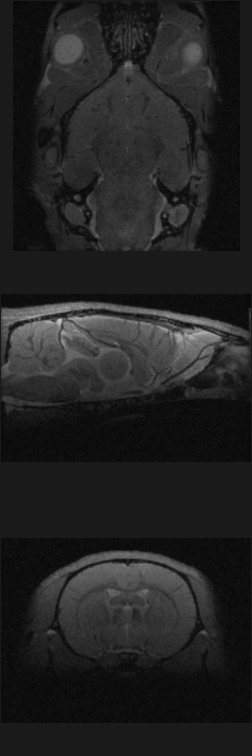 
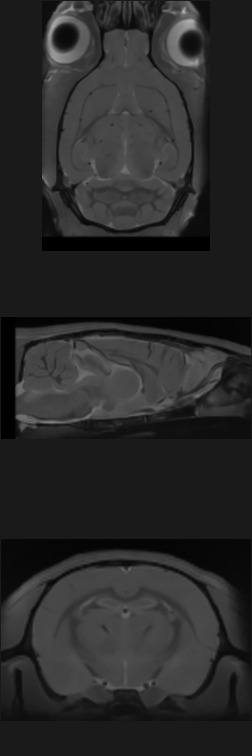
   
</div>


## **1 Trayectories**

In [12]:
Jdata_jacobians <- read_csv("Data/MRI/DBM/smooth_1mm/Trayectories/Jdata_jacobians.csv")

Rows: 698 Columns: 406
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (6): RID, Session, Subject, Group, Sex, Batch
dbl (400): Age, right_thalamus_LMod1_Alc, left_molecular_layer_of_the_cerebe...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## **2 Contrasts for local volume**

In [13]:
Jdata_jacobians <- Jdata_jacobians %>% 
    mutate_if(is.character, as.factor) %>% 
    mutate(Group = factor(Group, levels = c("Ctrl", "Alc", "Str", "Alc+Str")))

In [14]:
names_Lmod1 <- str_subset(colnames(Jdata_jacobians),pattern = "LMod1")

suppressMessages(invisible(capture.output(
Lmod1 <- names_Lmod1 %>% map(~ lmer(eval(paste0(.x," ~ Age*Group + Sex + Batch + (1 |RID)")), data = Jdata_jacobians) ) %>% set_names(names_Lmod1)
    )))
Residuals_Lmod1 <- Lmod1 %>% map_dfc(~ .x %>% residuals())

suppressMessages(invisible(capture.output(
Contrast_Lmod1 <- Lmod1 %>%
    map(~ contrast(emmeans(.x,~ Group), method = "pairwise", adjust = "fdr")) %>% set_names(names_Lmod1)
    )))

suppressMessages(invisible(capture.output(
Eff_size_Lmod1 <- names_Lmod1 %>%
    map(~ eff_size(Contrast_Lmod1[[.x]], sigma = sigma(Lmod1[[.x]]),edf = df.residual(Lmod1[[.x]]) ) ) %>% set_names(names_Lmod1) 
    )))

Contrast_Lmod1 %>% map(~ .x %>% as_tibble() %>% filter(p.value <= 0.05)) %>% compact(1)

$right_granule_cell_level_of_the_cerebellum_LMod1_Alc
# A tibble: 1 × 6
  contrast  estimate      SE    df t.ratio p.value
  <chr>        <dbl>   <dbl> <dbl>   <dbl>   <dbl>
1 Alc - Str  -0.0179 0.00655  85.6   -2.74  0.0451

$left_primary_cingular_cortex_left_LMod1_Str
# A tibble: 2 × 6
  contrast         estimate     SE    df t.ratio p.value
  <chr>               <dbl>  <dbl> <dbl>   <dbl>   <dbl>
1 Ctrl - Str        -0.0312 0.0119  87.0   -2.63  0.0305
2 Ctrl - (Alc+Str)  -0.0361 0.0120  89.2   -3.01  0.0206

$left_granule_cell_level_of_the_cerebellum_left_2_LMod1_Str
# A tibble: 1 × 6
  contrast         estimate      SE    df t.ratio p.value
  <chr>               <dbl>   <dbl> <dbl>   <dbl>   <dbl>
1 Ctrl - (Alc+Str)  -0.0242 0.00856  89.9   -2.83  0.0349

In [15]:
names_Lmod3 <- str_subset(colnames(Jdata_jacobians),pattern = "LMod3")

suppressMessages(invisible(capture.output(
Lmod3 <-  names_Lmod3 %>% map(~ lmer(eval(paste0(.x," ~ Age*Group*Sex + Batch + (1 |RID)")), data = Jdata_jacobians) ) %>% set_names(names_Lmod3)
    )))
Residuals_Lmod3 <- Lmod3 %>% map_dfc(~ .x %>% residuals())

suppressMessages(invisible(capture.output(
Contrast_Lmod3 <- Lmod3 %>%
    map(~ contrast(emmeans(.x,~ Group|Sex), method = "pairwise", adjust = "fdr")) %>% set_names(names_Lmod3)
    )))

suppressMessages(invisible(capture.output(
Eff_size_Lmod3 <- names_Lmod3 %>%
    map(~ eff_size(Contrast_Lmod3[[.x]], sigma = sigma(Lmod3[[.x]]),edf = df.residual(Lmod3[[.x]]) ) ) %>% set_names(names_Lmod3) 
    )))

significant_names_Lmod3 <- Contrast_Lmod3 %>% map(~ .x %>% as_tibble() %>% 
    filter(p.value < 0.05) %>% 
    add_significance() %>% 
    select(contrast, Sex, estimate, SE, df, p.value,p.value.signif) %>% 
    mutate(across(c(estimate, SE, df, p.value), ~ round(., 2))) ) %>% compact(1) 
significant_names_Lmod3 

$left_molecular_layer_of_the_cerebellum_left_LMod3_Alc
# A tibble: 1 × 7
  contrast   Sex   estimate    SE    df p.value p.value.signif
  <fct>      <fct>    <dbl> <dbl> <dbl>   <dbl> <chr>         
1 Ctrl - Alc male      0.03  0.01  77.4    0.02 *             

$right_molecular_layer_of_the_cerebellum_2_LMod3_Alc
# A tibble: 2 × 7
  contrast        Sex   estimate    SE    df p.value p.value.signif
  <fct>           <fct>    <dbl> <dbl> <dbl>   <dbl> <chr>         
1 Ctrl - Alc      male      0.04  0.01  78.9    0.04 *             
2 Alc - (Alc+Str) male     -0.05  0.02  81.6    0.02 *             

$right_primary_motor_cortex_LMod3_Str
# A tibble: 3 × 7
  contrast         Sex   estimate    SE    df p.value p.value.signif
  <fct>            <fct>    <dbl> <dbl> <dbl>   <dbl> <chr>         
1 Ctrl - Str       male     -0.03  0.01  82.2    0.04 *             
2 Ctrl - (Alc+Str) male     -0.03  0.01  84.2    0.02 *             
3 Alc - (Alc+Str)  male     -0.03  0.01  82.0    0.04 *

In [16]:
names_Pmod3 <- str_subset(colnames(Jdata_jacobians),pattern = "PMod3")

suppressMessages(invisible(capture.output(
Pmod3 <- names_Pmod3 %>% map(~ lmer(eval(paste0(.x," ~ poly(Age,2)*Group*Sex  + Batch + (1 |RID)")), data = Jdata_jacobians) ) %>% set_names(names_Pmod3)
        )))
Residuals_Pmod3 <- Pmod3 %>% map_dfc(~ .x %>% residuals())

suppressMessages(invisible(capture.output(
Contrast_Pmod3 <- Pmod3 %>%
    map(~ contrast(emmeans(.x,~ Group|Sex), method = "pairwise", adjust = "fdr")) %>% set_names(names_Pmod3)
    )))

Contrast_Pmod3 %>% map(~ .x %>% as_tibble() %>% filter(p.value <= 0.05)) %>% compact(1)

named list()

In [17]:
names_Lmod4 <- str_subset(colnames(Jdata_jacobians),pattern = "LMod4")

suppressMessages(invisible(capture.output(
Lmod4 <- names_Lmod4 %>% map(~ lmer(eval(paste0(.x," ~ Age*Group + Sex  + Batch + (1 |RID)")), data = Jdata_jacobians) ) %>% set_names(names_Lmod4)
    )))
Residuals_Lmod4 <- Lmod4 %>% map_dfc(~ .x %>% residuals())

suppressMessages(invisible(capture.output(
Contrast_Lmod4 <- Lmod4 %>%
    map(~ contrast(emmeans(.x,~ Group|Sex), method = "pairwise", adjust = "fdr")) %>% set_names(names_Lmod4)
    )))

suppressMessages(invisible(capture.output(
Eff_size_Lmod4 <- names_Lmod4 %>%
    map(~ eff_size(Contrast_Lmod4[[.x]], sigma = sigma(Lmod4[[.x]]),edf = df.residual(Lmod4[[.x]]) ) ) %>% set_names(names_Lmod4) 
    )))

Contrast_Lmod4 %>% map(~ .x %>% as_tibble() %>% filter(p.value <= 0.05)) %>% compact(1)

$left_granule_cell_level_of_the_cerebellum_left_2_LMod4_AlcStr
# A tibble: 8 × 7
  contrast         Sex    estimate      SE    df t.ratio p.value
  <fct>            <fct>     <dbl>   <dbl> <dbl>   <dbl>   <dbl>
1 Ctrl - Str       female  -0.0195 0.00806  87.2   -2.42  0.0356
2 Ctrl - (Alc+Str) female  -0.0215 0.00818  89.9   -2.63  0.0356
3 Alc - Str        female  -0.0180 0.00791  85.6   -2.27  0.0385
4 Alc - (Alc+Str)  female  -0.0200 0.00822  88.1   -2.43  0.0356
5 Ctrl - Str       male    -0.0195 0.00806  87.2   -2.42  0.0356
6 Ctrl - (Alc+Str) male    -0.0215 0.00818  89.9   -2.63  0.0356
7 Alc - Str        male    -0.0180 0.00791  85.6   -2.27  0.0385
8 Alc - (Alc+Str)  male    -0.0200 0.00822  88.1   -2.43  0.0356

In [18]:
names_Pmod4 <- str_subset(colnames(Jdata_jacobians),pattern = "PMod4")

suppressMessages(invisible(capture.output(
Pmod4 <- names_Pmod4 %>% map(~ lmer(eval(paste0(.x," ~ poly(Age,2)*Group + Sex  + Batch + (1 |RID)")), data = Jdata_jacobians) ) %>% set_names(names_Pmod4) 
    )))
Residuals_Pmod4 <- Pmod4 %>% map_dfc(~ .x %>% residuals())

suppressMessages(invisible(capture.output(
Contrast_Pmod4 <- Pmod4 %>%
    map(~ contrast(emmeans(.x,~ Group|Sex), method = "pairwise", adjust = "fdr")) %>% set_names(names_Pmod4)
    )))

Contrast_Pmod4 %>% map(~ .x %>% as_tibble() %>% filter(p.value <= 0.05)) %>% compact(1) 

named list()

In [19]:
names_Lmod5 <- str_subset(colnames(Jdata_jacobians),pattern = "LMod5")

suppressMessages(invisible(capture.output(
Lmod5 <- names_Lmod5 %>% map(~ lmer(eval(paste0(.x," ~ Age*Group*Sex + Batch + (1 |RID)")), data = Jdata_jacobians) ) %>% set_names(names_Lmod5)
    )))
Residuals_Lmod5 <- Lmod5 %>% map_dfc(~ .x %>% residuals())

suppressMessages(invisible(capture.output(
Contrast_Lmod5 <- Lmod5 %>%
    map(~ contrast(emmeans(.x,~ Group|Sex), method = "pairwise", adjust = "fdr")) %>% set_names(names_Lmod5)
    )))

suppressMessages(invisible(capture.output(
Eff_size_Lmod5 <- names_Lmod5 %>%
    map(~ eff_size(Contrast_Lmod5[[.x]], sigma = sigma(Lmod5[[.x]]),edf = df.residual(Lmod5[[.x]]) ) ) %>% set_names(names_Lmod5) 
    )))

significant_names_Lmod5 <- Contrast_Lmod5 %>% map(~ .x %>% as_tibble() %>% 
    filter(p.value < 0.05) %>% 
    add_significance() %>% 
    select(contrast, Sex, estimate, SE, df, p.value,p.value.signif) %>% 
    mutate(across(c(estimate, SE, df, p.value), ~ round(., 2))) ) %>% compact(1) 
significant_names_Lmod5 

$right_striatum_2_LMod5_Alc
# A tibble: 1 × 7
  contrast   Sex   estimate    SE    df p.value p.value.signif
  <fct>      <fct>    <dbl> <dbl> <dbl>   <dbl> <chr>         
1 Ctrl - Str male     -0.03  0.01  82.3    0.03 *             

$left_entorhinal_cortex_left_LMod5_Alc
# A tibble: 1 × 7
  contrast   Sex    estimate    SE    df p.value p.value.signif
  <fct>      <fct>     <dbl> <dbl> <dbl>   <dbl> <chr>         
1 Ctrl - Alc female     0.03  0.01  78.9    0.04 *             

$right_molecular_layer_of_the_cerebellum_2_LMod5_Alc
# A tibble: 3 × 7
  contrast        Sex   estimate    SE    df p.value p.value.signif
  <fct>           <fct>    <dbl> <dbl> <dbl>   <dbl> <chr>         
1 Ctrl - Alc      male     -0.03  0.01  77.4    0.01 *             
2 Alc - Str       male      0.02  0.01  79.6    0.03 *             
3 Alc - (Alc+Str) male      0.02  0.01  81.8    0.03 *             

$left_primary_motor_cortex_left_2_LMod5_Alc
# A tibble: 3 × 7
  contrast        Sex   estimate    SE    df p.value p.value.signif
  <fct>           <fct>    <dbl> <dbl> <dbl>   <dbl> <chr>         
1 Ctrl - Alc      male     -0.02  0.01  78.5    0.03 *             
2 Alc - Str       male      0.03  0.01  80.2    0.03 *             
3 Alc - (Alc+Str) male      0.03  0.01  82.0    0.03 *             

$left_primary_motor_cortex_left_LMod5_AlcStr
# A tibble: 3 × 7
  contrast        Sex   estimate    SE    df p.value p.value.signif
  <fct>           <fct>    <dbl> <dbl> <dbl>   <dbl> <chr>         
1 Ctrl - Alc      male     -0.03  0.01  78.4    0.03 *             
2 Alc - Str       male      0.03  0.01  80.1    0.05 *             
3 Alc - (Alc+Str) male      0.03  0.01  82.1    0.03 *

In [20]:
names_Pmod5 <- str_subset(colnames(Jdata_jacobians),pattern = "PMod5")

suppressMessages(invisible(capture.output(
Pmod5 <- names_Pmod5 %>% map(~ lmer(eval(paste0(.x," ~ poly(Age,2)*Group*Sex + Batch + (1 |RID)")), data = Jdata_jacobians) ) %>% set_names(names_Pmod5)
        )))
Residuals_Pmod5 <- Pmod5 %>% map_dfc(~ .x %>% residuals())

suppressMessages(invisible(capture.output(
Contrast_Pmod5 <- Pmod5 %>%
    map(~ contrast(emmeans(.x,~ Group|Sex), method = "pairwise", adjust = "fdr")) %>% set_names(names_Pmod5)
    )))

Contrast_Pmod5 %>% map(~ .x %>% as_tibble() %>% filter(p.value <= 0.05)) %>% compact(1) 

named list()

In [21]:
names_Lmod6 <- str_subset(colnames(Jdata_jacobians),pattern = "LMod6")

suppressMessages(invisible(capture.output(
Lmod6 <- names_Lmod6 %>% map(~ lmer(eval(paste0(.x," ~ Age*Group + Sex  + Batch + (1 |RID)")), data = Jdata_jacobians) ) %>% set_names(names_Lmod6)
    )))
Residuals_Lmod6 <- Lmod6 %>% map_dfc(~ .x %>% residuals())                                                                                                                                      

suppressMessages(invisible(capture.output(
Contrast_Lmod6 <- Lmod6 %>%
    map(~ contrast(emmeans(.x,~ Group), method = "pairwise", adjust = "fdr")) %>% set_names(names_Lmod6)
    )))

suppressMessages(invisible(capture.output(
Eff_size_Lmod6 <- names_Lmod6 %>%
    map(~ eff_size(Contrast_Lmod6[[.x]], sigma = sigma(Lmod6[[.x]]),edf = df.residual(Lmod6[[.x]]) ) ) %>% set_names(names_Lmod6) 
    )))

Contrast_Lmod6 %>% map(~ .x %>% as_tibble() %>% filter(p.value <= 0.05)) %>% compact(1)

named list()

In [22]:
names_Pmod6 <- str_subset(colnames(Jdata_jacobians),pattern = "PMod6")

suppressMessages(invisible(capture.output(
Pmod6 <- names_Pmod6 %>% map(~ lmer(eval(paste0(.x," ~ poly(Age,2)*Group + Sex  + Batch + (1 |RID)")), data = Jdata_jacobians) ) %>% set_names(names_Pmod6)
    )))
Residuals_Pmod6 <- Pmod6 %>% map_dfc(~ .x %>% residuals())  

suppressMessages(invisible(capture.output(
Contrast_Pmod6 <- Pmod6 %>%
    map(~ contrast(emmeans(.x,~ Group), method = "pairwise", adjust = "fdr")) %>% set_names(names_Pmod6)
    )))

Contrast_Pmod6 %>% map(~ .x %>% as_tibble() %>% filter(p.value <= 0.05)) %>% compact(1)

named list()

In [23]:
names_Lmod7 <- str_subset(colnames(Jdata_jacobians),pattern = "LMod7")

suppressMessages(invisible(capture.output(
Lmod7 <- names_Lmod7 %>% map(~ lmer(eval(paste0(.x," ~ Age*Group*Sex + Batch + (1 |RID)")), data = Jdata_jacobians) ) %>% set_names(names_Lmod7)
    )))
Residuals_Lmod7 <- Lmod7 %>% map_dfc(~ .x %>% residuals())

suppressMessages(invisible(capture.output(
Contrast_Lmod7 <- Lmod7 %>%
    map(~ contrast(emmeans(.x,~ Group|Sex), method = "pairwise", adjust = "fdr")) %>% set_names(names_Lmod7)
    )))

suppressMessages(invisible(capture.output(
Eff_size_Lmod7 <- names_Lmod7 %>%
    map(~ eff_size(Contrast_Lmod7[[.x]], sigma = sigma(Lmod7[[.x]]),edf = df.residual(Lmod7[[.x]]) ) ) %>% set_names(names_Lmod7) 
    )))

significant_names_Lmod7 <- Contrast_Lmod7 %>% map(~ .x %>% as_tibble() %>% 
    filter(p.value < 0.05) %>% 
    add_significance() %>% 
    select(contrast, Sex, estimate, SE, df, p.value,p.value.signif) %>% 
    mutate(across(c(estimate, SE, df, p.value), ~ round(., 2))) ) %>% compact(1) 
significant_names_Lmod7

$right_striatum_LMod7_Str
# A tibble: 1 × 7
  contrast   Sex   estimate    SE    df p.value p.value.signif
  <fct>      <fct>    <dbl> <dbl> <dbl>   <dbl> <chr>         
1 Ctrl - Str male     -0.03  0.01  82.3    0.03 *             

$left_entorhinal_cortex_left_LMod7_Str
# A tibble: 1 × 7
  contrast   Sex    estimate    SE    df p.value p.value.signif
  <fct>      <fct>     <dbl> <dbl> <dbl>   <dbl> <chr>         
1 Ctrl - Alc female     0.03  0.01  78.9    0.04 *             

$right_molecular_layer_of_the_cerebellum_LMod7_Str
# A tibble: 3 × 7
  contrast        Sex   estimate    SE    df p.value p.value.signif
  <fct>           <fct>    <dbl> <dbl> <dbl>   <dbl> <chr>         
1 Ctrl - Alc      male     -0.03  0.01  77.4    0.01 *             
2 Alc - Str       male      0.02  0.01  79.6    0.03 *             
3 Alc - (Alc+Str) male      0.02  0.01  81.8    0.03 *             

$left_primary_motor_cortex_left_LMod7_Str
# A tibble: 3 × 7
  contrast        Sex   estimate    SE    df p.value p.value.signif
  <fct>           <fct>    <dbl> <dbl> <dbl>   <dbl> <chr>         
1 Ctrl - Alc      male     -0.02  0.01  78.5    0.03 *             
2 Alc - Str       male      0.03  0.01  80.2    0.03 *             
3 Alc - (Alc+Str) male      0.03  0.01  82.0    0.03 *             

$left_molecular_layer_of_the_cerebellum_left_LMod7_AlcStr
# A tibble: 3 × 7
  contrast        Sex   estimate    SE    df p.value p.value.signif
  <fct>           <fct>    <dbl> <dbl> <dbl>   <dbl> <chr>         
1 Ctrl - Alc      male     -0.02  0.01  77.4    0.02 *             
2 Alc - Str       male      0.02  0.01  79.6    0.02 *             
3 Alc - (Alc+Str) male      0.02  0.01  81.8    0.02 *

In [24]:
names_Pmod7 <- str_subset(colnames(Jdata_jacobians),pattern = "PMod7")

suppressMessages(invisible(capture.output(
Pmod7 <- names_Pmod7 %>% map(~ lmer(eval(paste0(.x," ~ poly(Age,2)*Group*Sex + Batch + (1 |RID)")), data = Jdata_jacobians) ) %>% set_names(names_Pmod7)
        )))
Residuals_Pmod7 <- Pmod7 %>% map_dfc(~ .x %>% residuals())

suppressMessages(invisible(capture.output(
Contrast_Pmod7 <- Pmod7 %>%
    map(~ contrast(emmeans(.x,~ Group|Sex), method = "pairwise", adjust = "fdr")) %>% set_names(names_Pmod7)
    )))

Contrast_Pmod7 %>% map(~ .x %>% as_tibble() %>% filter(p.value <= 0.05)) %>% compact(1) 

named list()

In [25]:
Jdata_jacobians_residuals <- Jdata_jacobians %>% dplyr::select(RID,Session,Group,Age,Sex,Batch) %>% add_column(Residuals_Lmod3,Residuals_Lmod5,Residuals_Lmod7) %>% 
    mutate_if(is.character, as.factor) %>% 
    mutate(Group = factor(Group, levels = c("Ctrl", "Alc", "Str", "Alc+Str")))

### **2.1 Covariance local volumes**

In [26]:
Mod3_sc_p <- Mod3_sc_padj <- Mod3_sc_t <- Mod3_scdiff_t <- Mod3_scdiff_p <- Mod3_scdiff_padj <- list()
Mod5_sc_p <- Mod5_sc_padj <- Mod5_sc_t <- Mod5_scdiff_t <- Mod5_scdiff_p <- Mod5_scdiff_padj <- list()
Mod7_sc_p <- Mod7_sc_padj <- Mod7_sc_t <- Mod7_scdiff_t <- Mod7_scdiff_p <- Mod7_scdiff_padj <- list()

groups_strs <- c("Alc", "Str", "Alc+Str")


In [27]:
Mod3_strnames <- groups_strs %>% 
    map(~ Jdata_jacobians_residuals %>% dplyr::select(-c(RID,Session,Group,Age,Sex,Batch)) %>% 
    colnames() %>% str_subset(paste0("LMod3_", .x,"$")))  %>% set_names(groups_strs)
num_Mod3_strucs <- Mod3_strnames %>% map(~ length(.x))

Mod5_strnames <- groups_strs %>% 
    map(~ Jdata_jacobians_residuals %>% dplyr::select(-c(RID,Session,Group,Age,Sex,Batch)) %>% 
    colnames() %>% str_subset(paste0("LMod5_", .x,"$")))  %>% set_names(groups_strs)
num_Mod5_strucs <- Mod5_strnames %>% map(~ length(.x))

Mod7_strnames <- groups_strs %>% 
    map(~ Jdata_jacobians_residuals %>% dplyr::select(-c(RID,Session,Group,Age,Sex,Batch)) %>% 
    colnames() %>% str_subset(paste0("LMod7_", .x,"$")))  %>% set_names(groups_strs)
num_Mod7_strucs <- Mod7_strnames %>% map(~ length(.x))


In [28]:
Mod3_scdiff_t <- Mod3_scdiff_p <- Mod3_scdiff_padj <- Mod3_sc_t <- Mod3_sc_p <- Mod3_sc_padj <- map(groups_strs, ~ {
    matrix(NA, nrow = num_Mod3_strucs[[.x]], ncol = num_Mod3_strucs[[.x]],
        dimnames = list(Mod3_strnames[[.x]], Mod3_strnames[[.x]])
    ) }) %>% set_names(groups_strs)

Mod5_scdiff_t <- Mod5_scdiff_p <- Mod5_scdiff_padj <- Mod5_sc_t <- Mod5_sc_p <- Mod5_sc_padj <- map(groups_strs, ~ {
    matrix(NA, nrow = num_Mod5_strucs[[.x]], ncol = num_Mod5_strucs[[.x]],
        dimnames = list(Mod5_strnames[[.x]], Mod5_strnames[[.x]])
    ) }) %>% set_names(groups_strs)

Mod7_scdiff_t <- Mod7_scdiff_p <- Mod7_scdiff_padj <- Mod7_sc_t <- Mod7_sc_p <- Mod7_sc_padj <- map(groups_strs, ~ {
    matrix(NA, nrow = num_Mod7_strucs[[.x]], ncol = num_Mod7_strucs[[.x]],
        dimnames = list(Mod7_strnames[[.x]], Mod7_strnames[[.x]])
    ) }) %>% set_names(groups_strs)

In [29]:
res_Mod3 <- NULL

for (group in groups_strs) {
    for (i in 1:num_Mod3_strucs[[group]]) {
        for (j in 1:num_Mod3_strucs[[group]]) {
            
            struc_i <- Mod3_strnames[[group]][[i]]
            struc_j <- Mod3_strnames[[group]][[j]]
            model.formula <- formula(glue("{struc_j} ~ {struc_i}*Group"))
            
            if (!is.na(Mod3_sc_t[[group]][j, i])) {
                next
            }
            
            if (i == j) {
                Mod3_sc_t[[group]][i, j] <- 0
                Mod3_sc_p[[group]][i, j] <- 1
                Mod3_scdiff_t[[group]][i, j] <- 0
                Mod3_scdiff_p[[group]][i, j] <- 1
            } else {
                res_Mod3[[group]] <- summary(lm(formula = model.formula, data = Jdata_jacobians_residuals %>% filter(Group %in% c("Ctrl", group)) %>% 
                    mutate(Group = factor(Group, levels = c("Ctrl", group))) ))$coefficients
                Mod3_sc_t[[group]][i, j] <- res_Mod3[[group]][struc_i, 't value']
                Mod3_sc_p[[group]][i, j] <- res_Mod3[[group]][struc_i, 'Pr(>|t|)']
                Mod3_scdiff_t[[group]][i, j] <- res_Mod3[[group]][glue("{struc_i}:Group",group), 't value']
                Mod3_scdiff_p[[group]][i, j] <- res_Mod3[[group]][glue("{struc_i}:Group",group), 'Pr(>|t|)']
            }
        }
    }
}

In [30]:
res_Mod5 <- NULL
for (group in groups_strs) {
    if (num_Mod5_strucs[[group]] == 0) {
        next
    }
    for (i in 1:num_Mod5_strucs[[group]]) {
        for (j in 1:num_Mod5_strucs[[group]]) {
            
            struc_i <- Mod5_strnames[[group]][[i]]
            struc_j <- Mod5_strnames[[group]][[j]]
            model.formula <- formula(glue("{struc_j} ~ {struc_i}*Group"))
            
            if (!is.na(Mod5_sc_t[[group]][j, i])) {
                next
            }
            
            if (i == j) {
                Mod5_sc_t[[group]][i, j] <- 0
                Mod5_sc_p[[group]][i, j] <- 1
                Mod5_scdiff_t[[group]][i, j] <- 0
                Mod5_scdiff_p[[group]][i, j] <- 1
            } else {
                res_Mod5[[group]] <- summary(lm(formula = model.formula, data = Jdata_jacobians_residuals %>% filter(Group %in% c("Str", group)) %>% 
                    mutate(Group = factor(Group, levels = c("Str", group))) ))$coefficients
                Mod5_sc_t[[group]][i, j] <- res_Mod5[[group]][struc_i, 't value']
                Mod5_sc_p[[group]][i, j] <- res_Mod5[[group]][struc_i, 'Pr(>|t|)']
                Mod5_scdiff_t[[group]][i, j] <- res_Mod5[[group]][glue("{struc_i}:Group",group), 't value']
                Mod5_scdiff_p[[group]][i, j] <- res_Mod5[[group]][glue("{struc_i}:Group",group), 'Pr(>|t|)']
            }
        }
    }
}

In [31]:
res_Mod7 <- NULL
for (group in groups_strs) {
    if (num_Mod7_strucs[[group]] == 0) {
        next
    }
    for (i in 1:num_Mod7_strucs[[group]]) {
        for (j in 1:num_Mod7_strucs[[group]]) {
            
            struc_i <- Mod7_strnames[[group]][[i]]
            struc_j <- Mod7_strnames[[group]][[j]]
            model.formula <- formula(glue("{struc_j} ~ {struc_i}*Group*Age + Batch"))
            
            if (!is.na(Mod7_sc_t[[group]][j, i])) {
                next
            }
            
            if (i == j) {
                Mod7_sc_t[[group]][i, j] <- 0
                Mod7_sc_p[[group]][i, j] <- 1
                Mod7_scdiff_t[[group]][i, j] <- 0
                Mod7_scdiff_p[[group]][i, j] <- 1
            } else {
                res_Mod7[[group]] <- summary(lm(formula = model.formula, data = Jdata_jacobians_residuals %>% filter(Group %in% c("Alc", group)) %>% 
                    mutate(Group = factor(Group, levels = c("Alc", group))) ))$coefficients
                Mod7_sc_t[[group]][i, j] <- res_Mod7[[group]][struc_i, 't value']
                Mod7_sc_p[[group]][i, j] <- res_Mod7[[group]][struc_i, 'Pr(>|t|)']
                Mod7_scdiff_t[[group]][i, j] <- res_Mod7[[group]][glue("{struc_i}:Group",group), 't value']
                Mod7_scdiff_p[[group]][i, j] <- res_Mod7[[group]][glue("{struc_i}:Group",group), 'Pr(>|t|)']
            }
        }
    }
}

In [32]:
for (group in groups_strs) {
    diag(Mod3_sc_padj[[group]]) <- 1
    Mod3_sc_padj[[group]][upper.tri(Mod3_sc_padj[[group]], diag = FALSE)] <- p.adjust(Mod3_sc_p[[group]][upper.tri(Mod3_sc_p[[group]], diag = FALSE)], method = "fdr")
    Mod3_sc_t[[group]][lower.tri(Mod3_sc_t[[group]])] <- Mod3_sc_p[[group]][lower.tri(Mod3_sc_p[[group]])] <- Mod3_sc_padj[[group]][lower.tri(Mod3_sc_padj[[group]])] <- 1
    
    diag(Mod3_scdiff_padj[[group]]) <- 1
    Mod3_scdiff_padj[[group]][upper.tri(Mod3_scdiff_padj[[group]], diag = FALSE)] <- p.adjust(Mod3_scdiff_p[[group]][upper.tri(Mod3_scdiff_p[[group]], diag = FALSE)], method = "fdr")
    Mod3_scdiff_t[[group]][lower.tri(Mod3_scdiff_t[[group]])] <- Mod3_scdiff_p[[group]][lower.tri(Mod3_scdiff_p[[group]])] <- Mod3_scdiff_padj[[group]][lower.tri(Mod3_scdiff_padj[[group]])] <- 0
}

for (group in groups_strs) {
    diag(Mod5_sc_padj[[group]]) <- 1
    Mod5_sc_padj[[group]][upper.tri(Mod5_sc_padj[[group]], diag = FALSE)] <- p.adjust(Mod3_sc_p[[group]][upper.tri(Mod5_sc_p[[group]], diag = FALSE)], method = "fdr")
    Mod5_sc_t[[group]][lower.tri(Mod5_sc_t[[group]])] <- Mod5_sc_p[[group]][lower.tri(Mod3_sc_p[[group]])] <- Mod5_sc_padj[[group]][lower.tri(Mod5_sc_padj[[group]])] <- 1
    
    diag(Mod5_scdiff_padj[[group]]) <- 1
    Mod5_scdiff_padj[[group]][upper.tri(Mod5_scdiff_padj[[group]], diag = FALSE)] <- p.adjust(Mod5_scdiff_p[[group]][upper.tri(Mod5_scdiff_p[[group]], diag = FALSE)], method = "fdr")
    Mod5_scdiff_t[[group]][lower.tri(Mod5_scdiff_t[[group]])] <- Mod5_scdiff_p[[group]][lower.tri(Mod5_scdiff_p[[group]])] <- Mod5_scdiff_padj[[group]][lower.tri(Mod5_scdiff_padj[[group]])] <- 0
}

for (group in groups_strs) {
    diag(Mod7_sc_padj[[group]]) <- 1
    Mod7_sc_padj[[group]][upper.tri(Mod7_sc_padj[[group]], diag = FALSE)] <- p.adjust(Mod7_sc_p[[group]][upper.tri(Mod7_sc_p[[group]], diag = FALSE)], method = "fdr")
    Mod7_sc_t[[group]][lower.tri(Mod7_sc_t[[group]])] <- Mod7_sc_p[[group]][lower.tri(Mod7_sc_p[[group]])] <- Mod7_sc_padj[[group]][lower.tri(Mod7_sc_padj[[group]])] <- 1
    
    diag(Mod7_scdiff_padj[[group]]) <- 1
    Mod7_scdiff_padj[[group]][upper.tri(Mod7_scdiff_padj[[group]], diag = FALSE)] <- p.adjust(Mod7_scdiff_p[[group]][upper.tri(Mod7_scdiff_p[[group]], diag = FALSE)], method = "fdr")
    Mod7_scdiff_t[[group]][lower.tri(Mod7_scdiff_t[[group]])] <- Mod7_scdiff_p[[group]][lower.tri(Mod7_scdiff_p[[group]])] <- Mod7_scdiff_padj[[group]][lower.tri(Mod7_scdiff_padj[[group]])] <- 0

    }

In [33]:
cmap <- colorRampPalette(rev(c("#67001F", "#B2182B", "#D6604D", "#F4A582", "#FDDBC7", "#FFFFFF", "#D1E5F0", "#92C5DE", "#4393C3", "#2166AC", "#053061")))(100)

##### Rename

In [34]:
for (group in groups_strs) {
    colnames(Mod3_sc_t[[group]]) <- gsub(paste0("_LMod3_",group), "", colnames(Mod3_sc_t[[group]]))
    rownames(Mod3_sc_t[[group]]) <- gsub(paste0("_LMod3_",group), "", rownames(Mod3_sc_t[[group]]))

    colnames(Mod3_sc_t[[group]]) <- gsub("_left", "", colnames(Mod3_sc_t[[group]]))
    rownames(Mod3_sc_t[[group]]) <- gsub("_left", "", rownames(Mod3_sc_t[[group]]))

    colnames(Mod3_sc_t[[group]]) <- gsub("_", " ", colnames(Mod3_sc_t[[group]]))
    rownames(Mod3_sc_t[[group]]) <- gsub("_", " ", rownames(Mod3_sc_t[[group]]))
    
    colnames(Mod3_sc_t[[group]]) <- gsub("layer of the ", "", colnames(Mod3_sc_t[[group]]))
    rownames(Mod3_sc_t[[group]]) <- gsub("layer of the ", "", rownames(Mod3_sc_t[[group]]))
    
    colnames(Mod3_sc_t[[group]]) <- gsub("level of the ", "of ", colnames(Mod3_sc_t[[group]]))
    rownames(Mod3_sc_t[[group]]) <- gsub("level of the ", "of ", rownames(Mod3_sc_t[[group]]))
    
    colnames(Mod3_sc_t[[group]]) <- gsub(" external part", "", colnames(Mod3_sc_t[[group]]))
    rownames(Mod3_sc_t[[group]]) <- gsub(" external part", "", rownames(Mod3_sc_t[[group]]))
    
    colnames(Mod3_sc_t[[group]]) <- gsub("left ", "l-", colnames(Mod3_sc_t[[group]]))
    rownames(Mod3_sc_t[[group]]) <- gsub("left ", "l-", rownames(Mod3_sc_t[[group]]))
    
    colnames(Mod3_sc_t[[group]]) <- gsub("right ", "r-", colnames(Mod3_sc_t[[group]]))
    rownames(Mod3_sc_t[[group]]) <- gsub("right ", "r-", rownames(Mod3_sc_t[[group]]))

    colnames(Mod3_sc_t[[group]]) <- gsub("granular ", "gr ", colnames(Mod3_sc_t[[group]]))
    rownames(Mod3_sc_t[[group]]) <- gsub("granular ", "gr ", rownames(Mod3_sc_t[[group]]))

    colnames(Mod3_sc_t[[group]]) <- gsub("agranular ", "agr ", colnames(Mod3_sc_t[[group]]))
    rownames(Mod3_sc_t[[group]]) <- gsub("agranular ", "agr ", rownames(Mod3_sc_t[[group]]))

    colnames(Mod3_sc_t[[group]]) <- gsub("dysgranular ", "dgr ", colnames(Mod3_sc_t[[group]]))
    rownames(Mod3_sc_t[[group]]) <- gsub("dysgranular ", "dgr ", rownames(Mod3_sc_t[[group]]))

    colnames(Mod3_sc_t[[group]]) <- gsub("glomerular ", "glom ", colnames(Mod3_sc_t[[group]]))
    rownames(Mod3_sc_t[[group]]) <- gsub("glomerular ", "glom ", rownames(Mod3_sc_t[[group]]))
    
    colnames(Mod3_sc_t[[group]]) <- gsub("lateral ", "lat ", colnames(Mod3_sc_t[[group]]))
    rownames(Mod3_sc_t[[group]]) <- gsub("lateral ", "lat ", rownames(Mod3_sc_t[[group]]))
}

for (group in groups_strs) {
    colnames(Mod5_sc_t[[group]]) <- gsub(paste0("_LMod5_",group), "", colnames(Mod5_sc_t[[group]]))
    rownames(Mod5_sc_t[[group]]) <- gsub(paste0("_LMod5_",group), "", rownames(Mod5_sc_t[[group]]))

    colnames(Mod5_sc_t[[group]]) <- gsub("_left", "", colnames(Mod5_sc_t[[group]]))
    rownames(Mod5_sc_t[[group]]) <- gsub("_left", "", rownames(Mod5_sc_t[[group]]))

    colnames(Mod5_sc_t[[group]]) <- gsub("_", " ", colnames(Mod5_sc_t[[group]]))
    rownames(Mod5_sc_t[[group]]) <- gsub("_", " ", rownames(Mod5_sc_t[[group]]))
    
    colnames(Mod5_sc_t[[group]]) <- gsub("layer of the ", "", colnames(Mod5_sc_t[[group]]))
    rownames(Mod5_sc_t[[group]]) <- gsub("layer of the ", "", rownames(Mod5_sc_t[[group]]))
    
    colnames(Mod5_sc_t[[group]]) <- gsub("level of the ", "of ", colnames(Mod5_sc_t[[group]]))
    rownames(Mod5_sc_t[[group]]) <- gsub("level of the ", "of ", rownames(Mod5_sc_t[[group]]))
    
    colnames(Mod5_sc_t[[group]]) <- gsub(" external part", "", colnames(Mod5_sc_t[[group]]))
    rownames(Mod5_sc_t[[group]]) <- gsub(" external part", "", rownames(Mod5_sc_t[[group]]))
        
    colnames(Mod5_sc_t[[group]]) <- gsub("left ", "l-", colnames(Mod5_sc_t[[group]]))
    rownames(Mod5_sc_t[[group]]) <- gsub("left ", "l-", rownames(Mod5_sc_t[[group]]))
    
    colnames(Mod5_sc_t[[group]]) <- gsub("right ", "r-", colnames(Mod5_sc_t[[group]]))
    rownames(Mod5_sc_t[[group]]) <- gsub("right ", "r-", rownames(Mod5_sc_t[[group]]))

    colnames(Mod5_sc_t[[group]]) <- gsub("granular ", "gr ", colnames(Mod5_sc_t[[group]]))
    rownames(Mod5_sc_t[[group]]) <- gsub("granular ", "gr ", rownames(Mod5_sc_t[[group]]))

    colnames(Mod5_sc_t[[group]]) <- gsub("agranular ", "agr ", colnames(Mod5_sc_t[[group]]))
    rownames(Mod5_sc_t[[group]]) <- gsub("agranular ", "agr ", rownames(Mod5_sc_t[[group]]))

    colnames(Mod5_sc_t[[group]]) <- gsub("dysgranular ", "dgr ", colnames(Mod5_sc_t[[group]]))
    rownames(Mod5_sc_t[[group]]) <- gsub("dysgranular ", "dgr ", rownames(Mod5_sc_t[[group]]))

    colnames(Mod5_sc_t[[group]]) <- gsub("glomerular ", "glom ", colnames(Mod5_sc_t[[group]]))
    rownames(Mod5_sc_t[[group]]) <- gsub("glomerular ", "glom ", rownames(Mod5_sc_t[[group]]))
    
    colnames(Mod5_sc_t[[group]]) <- gsub("lateral ", "lat ", colnames(Mod5_sc_t[[group]]))
    rownames(Mod5_sc_t[[group]]) <- gsub("lateral ", "lat ", rownames(Mod5_sc_t[[group]]))
}

for (group in groups_strs) {
    colnames(Mod7_sc_t[[group]]) <- gsub(paste0("_LMod7_",group), "", colnames(Mod7_sc_t[[group]]))
    rownames(Mod7_sc_t[[group]]) <- gsub(paste0("_LMod7_",group), "", rownames(Mod7_sc_t[[group]]))

    colnames(Mod7_sc_t[[group]]) <- gsub("_left", "", colnames(Mod7_sc_t[[group]]))
    rownames(Mod7_sc_t[[group]]) <- gsub("_left", "", rownames(Mod7_sc_t[[group]]))

    colnames(Mod7_sc_t[[group]]) <- gsub("_", " ", colnames(Mod7_sc_t[[group]]))
    rownames(Mod7_sc_t[[group]]) <- gsub("_", " ", rownames(Mod7_sc_t[[group]]))
    
    colnames(Mod7_sc_t[[group]]) <- gsub("layer of the ", "", colnames(Mod7_sc_t[[group]]))
    rownames(Mod7_sc_t[[group]]) <- gsub("layer of the ", "", rownames(Mod7_sc_t[[group]]))
    
    colnames(Mod7_sc_t[[group]]) <- gsub("level of the ", "of ", colnames(Mod7_sc_t[[group]]))
    rownames(Mod7_sc_t[[group]]) <- gsub("level of the ", "of ", rownames(Mod7_sc_t[[group]]))
    
    colnames(Mod7_sc_t[[group]]) <- gsub(" external part", "", colnames(Mod7_sc_t[[group]]))
    rownames(Mod7_sc_t[[group]]) <- gsub(" external part", "", rownames(Mod7_sc_t[[group]]))
        
    colnames(Mod7_sc_t[[group]]) <- gsub("left ", "l-", colnames(Mod7_sc_t[[group]]))
    rownames(Mod7_sc_t[[group]]) <- gsub("left ", "l-", rownames(Mod7_sc_t[[group]]))
    
    colnames(Mod7_sc_t[[group]]) <- gsub("right ", "r-", colnames(Mod7_sc_t[[group]]))
    rownames(Mod7_sc_t[[group]]) <- gsub("right ", "r-", rownames(Mod7_sc_t[[group]]))

    colnames(Mod7_sc_t[[group]]) <- gsub("granular ", "gr ", colnames(Mod7_sc_t[[group]]))
    rownames(Mod7_sc_t[[group]]) <- gsub("granular ", "gr ", rownames(Mod7_sc_t[[group]]))

    colnames(Mod7_sc_t[[group]]) <- gsub("agranular ", "agr ", colnames(Mod7_sc_t[[group]]))
    rownames(Mod7_sc_t[[group]]) <- gsub("agranular ", "agr ", rownames(Mod7_sc_t[[group]]))

    colnames(Mod7_sc_t[[group]]) <- gsub("dysgranular ", "dgr ", colnames(Mod7_sc_t[[group]]))
    rownames(Mod7_sc_t[[group]]) <- gsub("dysgranular ", "dgr ", rownames(Mod7_sc_t[[group]]))

    colnames(Mod7_sc_t[[group]]) <- gsub("glomerular ", "glom ", colnames(Mod7_sc_t[[group]]))
    rownames(Mod7_sc_t[[group]]) <- gsub("glomerular ", "glom ", rownames(Mod7_sc_t[[group]]))
    
    colnames(Mod7_sc_t[[group]]) <- gsub("lateral ", "lat ", colnames(Mod7_sc_t[[group]]))
    rownames(Mod7_sc_t[[group]]) <- gsub("lateral ", "lat ", rownames(Mod7_sc_t[[group]]))
}

In [35]:
for (group in groups_strs) {
    colnames(Mod3_scdiff_t[[group]]) <- gsub(paste0("_LMod3_",group), "", colnames(Mod3_scdiff_t[[group]]))
    rownames(Mod3_scdiff_t[[group]]) <- gsub(paste0("_LMod3_",group), "", rownames(Mod3_scdiff_t[[group]]))

    colnames(Mod3_scdiff_t[[group]]) <- gsub("_left", "", colnames(Mod3_scdiff_t[[group]]))
    rownames(Mod3_scdiff_t[[group]]) <- gsub("_left", "", rownames(Mod3_scdiff_t[[group]]))

    colnames(Mod3_scdiff_t[[group]]) <- gsub("_", " ", colnames(Mod3_scdiff_t[[group]]))
    rownames(Mod3_scdiff_t[[group]]) <- gsub("_", " ", rownames(Mod3_scdiff_t[[group]]))
    
    colnames(Mod3_scdiff_t[[group]]) <- gsub("layer of the ", "", colnames(Mod3_scdiff_t[[group]]))
    rownames(Mod3_scdiff_t[[group]]) <- gsub("layer of the ", "", rownames(Mod3_scdiff_t[[group]]))
    
    colnames(Mod3_scdiff_t[[group]]) <- gsub("level of the ", "of ", colnames(Mod3_scdiff_t[[group]]))
    rownames(Mod3_scdiff_t[[group]]) <- gsub("level of the ", "of ", rownames(Mod3_scdiff_t[[group]]))
    
    colnames(Mod3_scdiff_t[[group]]) <- gsub(" external part", "", colnames(Mod3_scdiff_t[[group]]))
    rownames(Mod3_scdiff_t[[group]]) <- gsub(" external part", "", rownames(Mod3_scdiff_t[[group]]))
    
    colnames(Mod3_scdiff_t[[group]]) <- gsub("left ", "l-", colnames(Mod3_scdiff_t[[group]]))
    rownames(Mod3_scdiff_t[[group]]) <- gsub("left ", "l-", rownames(Mod3_scdiff_t[[group]]))
    
    colnames(Mod3_scdiff_t[[group]]) <- gsub("right ", "r-", colnames(Mod3_scdiff_t[[group]]))
    rownames(Mod3_scdiff_t[[group]]) <- gsub("right ", "r-", rownames(Mod3_scdiff_t[[group]]))

    colnames(Mod3_scdiff_t[[group]]) <- gsub("granular ", "gr ", colnames(Mod3_scdiff_t[[group]]))
    rownames(Mod3_scdiff_t[[group]]) <- gsub("granular ", "gr ", rownames(Mod3_scdiff_t[[group]]))

    colnames(Mod3_scdiff_t[[group]]) <- gsub("agranular ", "agr ", colnames(Mod3_scdiff_t[[group]]))
    rownames(Mod3_scdiff_t[[group]]) <- gsub("agranular ", "agr ", rownames(Mod3_scdiff_t[[group]]))

    colnames(Mod3_scdiff_t[[group]]) <- gsub("dysgranular ", "dgr ", colnames(Mod3_scdiff_t[[group]]))
    rownames(Mod3_scdiff_t[[group]]) <- gsub("dysgranular ", "dgr ", rownames(Mod3_scdiff_t[[group]]))

    colnames(Mod3_scdiff_t[[group]]) <- gsub("glomerular ", "glom ", colnames(Mod3_scdiff_t[[group]]))
    rownames(Mod3_scdiff_t[[group]]) <- gsub("glomerular ", "glom ", rownames(Mod3_scdiff_t[[group]]))
    
    colnames(Mod3_scdiff_t[[group]]) <- gsub("lateral ", "lat ", colnames(Mod3_scdiff_t[[group]]))
    rownames(Mod3_scdiff_t[[group]]) <- gsub("lateral ", "lat ", rownames(Mod3_scdiff_t[[group]]))
}

for (group in groups_strs) {
    colnames(Mod5_scdiff_t[[group]]) <- gsub(paste0("_LMod5_",group), "", colnames(Mod5_scdiff_t[[group]]))
    rownames(Mod5_scdiff_t[[group]]) <- gsub(paste0("_LMod5_",group), "", rownames(Mod5_scdiff_t[[group]]))

    colnames(Mod5_scdiff_t[[group]]) <- gsub("_left", "", colnames(Mod5_scdiff_t[[group]]))
    rownames(Mod5_scdiff_t[[group]]) <- gsub("_left", "", rownames(Mod5_scdiff_t[[group]]))

    colnames(Mod5_scdiff_t[[group]]) <- gsub("_", " ", colnames(Mod5_scdiff_t[[group]]))
    rownames(Mod5_scdiff_t[[group]]) <- gsub("_", " ", rownames(Mod5_scdiff_t[[group]]))
    
    colnames(Mod5_scdiff_t[[group]]) <- gsub("layer of the ", "", colnames(Mod5_scdiff_t[[group]]))
    rownames(Mod5_scdiff_t[[group]]) <- gsub("layer of the ", "", rownames(Mod5_scdiff_t[[group]]))
    
    colnames(Mod5_scdiff_t[[group]]) <- gsub("level of the ", "of ", colnames(Mod5_scdiff_t[[group]]))
    rownames(Mod5_scdiff_t[[group]]) <- gsub("level of the ", "of ", rownames(Mod5_scdiff_t[[group]]))
    
    colnames(Mod5_scdiff_t[[group]]) <- gsub(" external part", "", colnames(Mod5_scdiff_t[[group]]))
    rownames(Mod5_scdiff_t[[group]]) <- gsub(" external part", "", rownames(Mod5_scdiff_t[[group]]))
        
    colnames(Mod5_scdiff_t[[group]]) <- gsub("left ", "l-", colnames(Mod5_scdiff_t[[group]]))
    rownames(Mod5_scdiff_t[[group]]) <- gsub("left ", "l-", rownames(Mod5_scdiff_t[[group]]))
    
    colnames(Mod5_scdiff_t[[group]]) <- gsub("right ", "r-", colnames(Mod5_scdiff_t[[group]]))
    rownames(Mod5_scdiff_t[[group]]) <- gsub("right ", "r-", rownames(Mod5_scdiff_t[[group]]))

    colnames(Mod5_scdiff_t[[group]]) <- gsub("granular ", "gr ", colnames(Mod5_scdiff_t[[group]]))
    rownames(Mod5_scdiff_t[[group]]) <- gsub("granular ", "gr ", rownames(Mod5_scdiff_t[[group]]))

    colnames(Mod5_scdiff_t[[group]]) <- gsub("agranular ", "agr ", colnames(Mod5_scdiff_t[[group]]))
    rownames(Mod5_scdiff_t[[group]]) <- gsub("agranular ", "agr ", rownames(Mod5_scdiff_t[[group]]))

    colnames(Mod5_scdiff_t[[group]]) <- gsub("dysgranular ", "dgr ", colnames(Mod5_scdiff_t[[group]]))
    rownames(Mod5_scdiff_t[[group]]) <- gsub("dysgranular ", "dgr ", rownames(Mod5_scdiff_t[[group]]))

    colnames(Mod5_scdiff_t[[group]]) <- gsub("glomerular ", "glom ", colnames(Mod5_scdiff_t[[group]]))
    rownames(Mod5_scdiff_t[[group]]) <- gsub("glomerular ", "glom ", rownames(Mod5_scdiff_t[[group]]))
    
    colnames(Mod5_scdiff_t[[group]]) <- gsub("lateral ", "lat ", colnames(Mod5_scdiff_t[[group]]))
    rownames(Mod5_scdiff_t[[group]]) <- gsub("lateral ", "lat ", rownames(Mod5_scdiff_t[[group]]))
}

for (group in groups_strs) {
    colnames(Mod7_scdiff_t[[group]]) <- gsub(paste0("_LMod7_",group), "", colnames(Mod7_scdiff_t[[group]]))
    rownames(Mod7_scdiff_t[[group]]) <- gsub(paste0("_LMod7_",group), "", rownames(Mod7_scdiff_t[[group]]))

    colnames(Mod7_scdiff_t[[group]]) <- gsub("_left", "", colnames(Mod7_scdiff_t[[group]]))
    rownames(Mod7_scdiff_t[[group]]) <- gsub("_left", "", rownames(Mod7_scdiff_t[[group]]))

    colnames(Mod7_scdiff_t[[group]]) <- gsub("_", " ", colnames(Mod7_scdiff_t[[group]]))
    rownames(Mod7_scdiff_t[[group]]) <- gsub("_", " ", rownames(Mod7_scdiff_t[[group]]))
    
    colnames(Mod7_scdiff_t[[group]]) <- gsub("layer of the ", "", colnames(Mod7_scdiff_t[[group]]))
    rownames(Mod7_scdiff_t[[group]]) <- gsub("layer of the ", "", rownames(Mod7_scdiff_t[[group]]))
    
    colnames(Mod7_scdiff_t[[group]]) <- gsub("level of the ", "of ", colnames(Mod7_scdiff_t[[group]]))
    rownames(Mod7_scdiff_t[[group]]) <- gsub("level of the ", "of ", rownames(Mod7_scdiff_t[[group]]))
    
    colnames(Mod7_scdiff_t[[group]]) <- gsub(" external part", "", colnames(Mod7_scdiff_t[[group]]))
    rownames(Mod7_scdiff_t[[group]]) <- gsub(" external part", "", rownames(Mod7_scdiff_t[[group]]))
        
    colnames(Mod7_scdiff_t[[group]]) <- gsub("left ", "l-", colnames(Mod7_scdiff_t[[group]]))
    rownames(Mod7_scdiff_t[[group]]) <- gsub("left ", "l-", rownames(Mod7_scdiff_t[[group]]))
    
    colnames(Mod7_scdiff_t[[group]]) <- gsub("right ", "r-", colnames(Mod7_scdiff_t[[group]]))
    rownames(Mod7_scdiff_t[[group]]) <- gsub("right ", "r-", rownames(Mod7_scdiff_t[[group]]))

    colnames(Mod7_scdiff_t[[group]]) <- gsub("granular ", "gr ", colnames(Mod7_scdiff_t[[group]]))
    rownames(Mod7_scdiff_t[[group]]) <- gsub("granular ", "gr ", rownames(Mod7_scdiff_t[[group]]))

    colnames(Mod7_scdiff_t[[group]]) <- gsub("agranular ", "agr ", colnames(Mod7_scdiff_t[[group]]))
    rownames(Mod7_scdiff_t[[group]]) <- gsub("agranular ", "agr ", rownames(Mod7_scdiff_t[[group]]))

    colnames(Mod7_scdiff_t[[group]]) <- gsub("dysgranular ", "dgr ", colnames(Mod7_scdiff_t[[group]]))
    rownames(Mod7_scdiff_t[[group]]) <- gsub("dysgranular ", "dgr ", rownames(Mod7_scdiff_t[[group]]))

    colnames(Mod7_scdiff_t[[group]]) <- gsub("glomerular ", "glom ", colnames(Mod7_scdiff_t[[group]]))
    rownames(Mod7_scdiff_t[[group]]) <- gsub("glomerular ", "glom ", rownames(Mod7_scdiff_t[[group]]))
    
    colnames(Mod7_scdiff_t[[group]]) <- gsub("lateral ", "lat ", colnames(Mod7_scdiff_t[[group]]))
    rownames(Mod7_scdiff_t[[group]]) <- gsub("lateral ", "lat ", rownames(Mod7_scdiff_t[[group]]))
}

##### Visualizing

In [36]:
dir.create("Figures/DBM/covs", recursive = T)

In [37]:
for (group in groups_strs) {

png(paste0(getwd(),"/Figures/DBM/covs/",group,"_ctrl_LMod3.png"), width = 1000, height = 1000, bg = "transparent")
corrplot(Mod3_sc_t[[group]], is.corr = F, type = "upper", tl.pos = "lt",
        method="color", col = cmap, cl.length=10,
        tl.col="black", diag = TRUE,
        p.mat = Mod3_sc_padj[[group]], insig="label_sig",
        tl.cex = 1.5)
dev.off()

png(paste0(getwd(),"/Figures/DBM/covs/",group,"_LMod3.png"), width = 1000, height = 1000, bg = "transparent")
corrplot(Mod3_scdiff_t[[group]], is.corr = F, type = "upper",tl.pos = "lt",
        method="color", col = cmap, cl.length=10,
        tl.col="black", diag = TRUE,
        p.mat = Mod3_scdiff_padj[[group]], insig="label_sig",
        tl.cex = 1.5)
dev.off()
}

for (group in groups_strs[c(1,3)]) {
png(paste0("Figures/DBM/covs/",group,"_str_LMod5.png"), width = 1000, height = 1000, bg = "transparent")
corrplot(Mod5_sc_t[[group]], is.corr = F, type = "upper", tl.pos = "lt",
        method="color", col = cmap, cl.length=10,
        tl.col="black", diag = TRUE,
        p.mat = Mod5_sc_padj[[group]], insig="label_sig",
        tl.cex = 1.5)
dev.off()

png(paste0("Figures/DBM/covs/",group,"_LMod5.png"), width = 1000, height = 1000, bg = "transparent")
corrplot(Mod5_scdiff_t[[group]], is.corr = F, type = "upper", tl.pos = "lt",
        method="color", col = cmap, cl.length=10,
        tl.col="black", diag = TRUE,
        p.mat = Mod5_scdiff_padj[[group]], insig="label_sig",
        tl.cex = 1.5)
dev.off()
}

for (group in groups_strs[c(2,3)]) {
png(paste0("Figures/DBM/covs/",group,"_alc_LMod7.png"), width = 1000, height = 1000, bg = "transparent")
corrplot(Mod7_sc_t[[group]], is.corr = F, type = "upper", tl.pos = "lt",
        method="color", col = cmap, cl.length=10,
        tl.col="black", diag = TRUE,
        p.mat = Mod7_sc_padj[[group]], insig="label_sig",
        tl.cex = 1.5)
dev.off()

png(paste0("Figures/DBM/covs/",group,"_LMod7.png"), width = 1000, height = 1000, bg = "transparent")
corrplot(Mod7_scdiff_t[[group]], is.corr = F, type = "upper", tl.pos = "lt",
        method="color", col = cmap, cl.length=10,
        tl.col="black", diag = TRUE,
        p.mat = Mod7_scdiff_padj[[group]], insig="label_sig",
        tl.cex = 1.5)
dev.off()
}

### **2.2 Plotting only significative Models**

In [38]:
pal_group <- c("#757575","#C96505","#00A087","#09467C")
pal_sex <- c(ggplot2::alpha("#8d289f",1),ggplot2::alpha("#28799f",1))
pal_groupSex <- c("#737373","#424242","#008B8B","#8B475D")
pal_IntakeSex <- c("#737373","#424242","#7DA2E8","#00688B","#9780F4","#6C3F81")

In [39]:
ROIs <- read_csv("Data/MRI/DBM/smooth_1mm/Trayectories/ROIs_models.csv")

Rows: 191 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): label, label_clean, Model, ROI_model
dbl (7): d1, d2, d3, x, y, z, value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [40]:
nROI <- ROIs$ROI_model
names_Lmod <- c(significant_names_Lmod3,significant_names_Lmod5,significant_names_Lmod7) %>% names()


In [41]:
names_Lmod

[1] "left_molecular_layer_of_the_cerebellum_left_LMod3_Alc"   
 [2] "right_molecular_layer_of_the_cerebellum_2_LMod3_Alc"     
 [3] "right_primary_motor_cortex_LMod3_Str"                    
 [4] "right_striatum_2_LMod5_Alc"                              
 [5] "left_entorhinal_cortex_left_LMod5_Alc"                   
 [6] "right_molecular_layer_of_the_cerebellum_2_LMod5_Alc"     
 [7] "left_primary_motor_cortex_left_2_LMod5_Alc"              
 [8] "left_primary_motor_cortex_left_LMod5_AlcStr"             
 [9] "right_striatum_LMod7_Str"                                
[10] "left_entorhinal_cortex_left_LMod7_Str"                   
[11] "right_molecular_layer_of_the_cerebellum_LMod7_Str"       
[12] "left_primary_motor_cortex_left_LMod7_Str"                
[13] "left_molecular_layer_of_the_cerebellum_left_LMod7_AlcStr"

In [42]:
Jdata_jacobians_residuals_male <- Jdata_jacobians_residuals %>% filter(Sex == "male")
Jdata_jacobians_male <- Jdata_jacobians %>% filter(Sex == "male")

Lmod_males <- names_Lmod %>% map(~ lmer(eval(paste0(.x," ~ Age*Group + Batch + (1 |RID)")), 
            data = Jdata_jacobians_male) ) %>% set_names(names_Lmod)

plots_ROIs_male_res <- NULL
for (i in 1:length(names_Lmod)) {
      ROI <- names_Lmod %>% .[i]
      plots_ROIs_male_res[[ROI]] <- 
      ggpredict(Lmod_males[[i]], terms = c("Age", "Group")) %>% 
      plot(show_data = TRUE, show_ci = FALSE, dot_size = 4, dot_alpha = 0.25) +
      labs(
      title = gsub('_left','',ROI),
      x = "Age (days)",
      y = "Relative volume") +
      theme_pubr() +
      theme(
      plot.title = element_text(size = 16, face = "bold"),
      axis.title.x = element_text(size = 16, face = "bold"),
      axis.title.y = element_text(size = 16, face = "bold"),
      axis.text = element_text(size = 14, face = "bold")) + 
      scale_color_manual(values = pal_group) +                 
      theme(legend.position = "none",
            plot.title = element_text(hjust = 0.5,size = 16, face = "bold")) +
      theme(text = element_text(size=20), axis.text.x = element_text(size=15)) +
      geom_line(size = 2)
}

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

Data points may overlap. Use the `jitter` argument to add some amount of
  random variation to the location of data points and avoid overplotting.

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Data points may overlap. Use the `jitter` argument to add some amount of
  random variation to the location of data points and avoid overplotting.

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Data points may overlap. Use the `jitter` argument to add some amount of
  random variation to the location of data points and avoid overplotting.

Scale for colour is already present.
Adding another scale for colour, which will replace the 

In [43]:
Jdata_jacobians_residuals_fem <- Jdata_jacobians_residuals %>% filter(Sex == "female")
Jdata_jacobians_fem <- Jdata_jacobians %>% filter(Sex == "female")

Lmod_females <- names_Lmod %>% map(~ lmer(eval(paste0(.x," ~ Age*Group + Batch + (1 |RID)")), 
            data = Jdata_jacobians_fem) ) %>% set_names(names_Lmod)

plots_ROIs_female_res <- NULL
for (i in 1:length(names_Lmod)) {
      ROI <- names_Lmod[i]
      plots_ROIs_female_res[[ROI]] <- 
      ggpredict(Lmod_females[[i]], terms = c("Age", "Group")) %>% 
      plot(show_data = TRUE, show_ci = FALSE, dot_size = 4, dot_alpha = 0.25) +
      labs(
      title = gsub('_left','',ROI),
      x = "Age (days)",
      y = "Relative volume") +
      theme_pubr() +
      theme(
      plot.title = element_text(size = 16, face = "bold"),
      axis.title.x = element_text(size = 16, face = "bold"),
      axis.title.y = element_text(size = 16, face = "bold"),
      axis.text = element_text(size = 14, face = "bold")) + 
      scale_color_manual(values = pal_group) +                 
      theme(legend.position = "none",
            plot.title = element_text(hjust = 0.5,size = 16, face = "bold")) +
      theme(text = element_text(size=20), axis.text.x = element_text(size=15)) +
      geom_line(size = 2)
}

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

Data points may overlap. Use the `jitter` argument to add some amount of
  random variation to the location of data points and avoid overplotting.

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Data points may overlap. Use the `jitter` argument to add some amount of
  random variation to the location of data points and avoid overplotting.

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Data points may overlap. Use the `jitter` argument to add some amount of
  random variation to the location of data points and avoid overplotting.

Scale for colour is already present.
Adding another scale for colour, which will replace the 

In [44]:
Model3_lmer_tibble_male <- significant_names_Lmod3 %>% names() %>% 
        map(~ ggpredict(Lmod_males[[.x]], terms = c("Age", "Group")) ) %>% 
        set_names(significant_names_Lmod3 %>% names())

Model3_lmer_divided_male <- Model3_lmer_tibble_male %>% names() %>% 
        map(~ significant_names_Lmod3[[.x]] %>% separate(contrast, into = c("contrast1","contrast2"), sep = "-")) %>% 
        set_names(Model3_lmer_tibble_male %>% names())

Model5_lmer_tibble_male <- significant_names_Lmod5 %>% names() %>% 
        map(~ ggpredict(Lmod_males[[.x]], terms = c("Age", "Group")) ) %>% 
        set_names(significant_names_Lmod5 %>% names())

Model5_lmer_divided_male <- Model5_lmer_tibble_male %>% names() %>% 
        map(~ significant_names_Lmod5[[.x]] %>% separate(contrast, into = c("contrast1","contrast2"), sep = "-")) %>% 
        set_names(Model5_lmer_tibble_male %>% names())

Model7_lmer_tibble_male <- significant_names_Lmod7 %>% names() %>% 
        map(~ ggpredict(Lmod_males[[.x]], terms = c("Age", "Group")) ) %>% 
        set_names(significant_names_Lmod7 %>% names())

Model7_lmer_divided_male <- Model7_lmer_tibble_male %>% names() %>% 
        map(~ significant_names_Lmod7[[.x]] %>% separate(contrast, into = c("contrast1","contrast2"), sep = "-")) %>% 
        set_names(Model7_lmer_tibble_male %>% names())

In [45]:
Model3_lmer_tibble_female <- significant_names_Lmod3 %>% names() %>% 
        map(~ ggpredict(Lmod_females[[.x]], terms = c("Age", "Group")) ) %>% 
        set_names(significant_names_Lmod3 %>% names())

Model3_lmer_divided_female <- Model3_lmer_tibble_female %>% names() %>% 
        map(~ significant_names_Lmod3[[.x]] %>% separate(contrast, into = c("contrast1","contrast2"), sep = "-")) %>% 
        set_names(Model3_lmer_tibble_female %>% names())

Model5_lmer_tibble_female <- significant_names_Lmod5 %>% names() %>% 
        map(~ ggpredict(Lmod_females[[.x]], terms = c("Age", "Group")) ) %>% 
        set_names(significant_names_Lmod5 %>% names())

Model5_lmer_divided_female <- Model5_lmer_tibble_female %>% names() %>% 
        map(~ significant_names_Lmod5[[.x]] %>% separate(contrast, into = c("contrast1","contrast2"), sep = "-")) %>% 
        set_names(Model5_lmer_tibble_female %>% names())

Model7_lmer_tibble_female <- significant_names_Lmod7 %>% names() %>% 
        map(~ ggpredict(Lmod_females[[.x]], terms = c("Age", "Group")) ) %>% 
        set_names(significant_names_Lmod7 %>% names())

Model7_lmer_divided_female <- Model7_lmer_tibble_female %>% names() %>% 
        map(~ significant_names_Lmod7[[.x]] %>% separate(contrast, into = c("contrast1","contrast2"), sep = "-")) %>% 
        set_names(Model7_lmer_tibble_female %>% names())

In [46]:
Model3_plots_male <- NULL
for (roi in Model3_lmer_divided_male %>% names()){
    Model3_plots_male[[roi]] <- add_annotations(plots_ROIs_male_res[roi] %>% map(~ .x + labs(title = NULL)),
        Model3_lmer_divided_male,Model3_lmer_tibble_male,roi)
}

Model5_plots_male <- NULL
for (roi in Model5_lmer_divided_male %>% names()){
    Model5_plots_male[[roi]] <- add_annotations(plots_ROIs_male_res[roi] %>% map(~ .x + labs(title = NULL)),
        Model5_lmer_divided_male,Model5_lmer_tibble_male,roi)
}

Model7_plots_male <- NULL
for (roi in Model7_lmer_divided_male %>% names()){
    Model7_plots_male[[roi]] <- add_annotations(plots_ROIs_male_res[roi] %>% map(~ .x + labs(title = NULL)),
        Model7_lmer_divided_male,Model7_lmer_tibble_male,roi)
}

In [47]:
Model3_plots_female <- NULL
for (roi in Model3_lmer_divided_female %>% names()){
    Model3_plots_female[[roi]] <- add_annotations(plots_ROIs_female_res[roi] %>% map(~ .x + labs(title = NULL)),
        Model3_lmer_divided_female,Model3_lmer_tibble_female,roi)
}

Model5_plots_female <- NULL
for (roi in Model5_lmer_divided_female %>% names()){
    Model5_plots_female[[roi]] <- add_annotations(plots_ROIs_female_res[roi] %>% map(~ .x + labs(title = NULL)),
        Model5_lmer_divided_female,Model5_lmer_tibble_female,roi)
}

Model7_plots_female <- NULL
for (roi in Model7_lmer_divided_female %>% names()){
    Model7_plots_female[[roi]] <- add_annotations(plots_ROIs_female_res[roi] %>% map(~ .x + labs(title = NULL)),   
    Model7_lmer_divided_female,Model7_lmer_tibble_female,roi)
}

## **3. Contrast for ROI volume**

In [48]:
Volumes_jacobians <- read_csv("Data/MRI/DBM/smooth_1mm/Trayectories/Volumes_jacobians.csv") %>% 
                    mutate(RID = factor(RID), Group = factor(Group, levels = c("Ctrl", "Alc", "Str", "Alc+Str")),
                        Session = factor(Session), Sex = factor(Sex, levels = c("female", "male")),
                        Batch = factor(Batch))  %>% dplyr::select(-c(Subject))

Rows: 698 Columns: 93
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): RID, Group, Session, Sex, Batch, Subject
dbl (87): left_agranular_dysgranular_insular_cortex_left, right_agranular_dy...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [49]:
names_VLmod <- str_subset(colnames(Volumes_jacobians),pattern = "_")

suppressMessages(invisible(capture.output(
VLmod <-  names_VLmod %>% map(~ lmer(eval(paste0(.x," ~ Age*Group*Sex + Batch + (1 |RID)")), data = Volumes_jacobians) ) %>% set_names(names_VLmod)
    )))
Residuals_VLmod <- VLmod %>% map_dfc(~ .x %>% residuals())

suppressMessages(invisible(capture.output(
Contrast_VLmod <- VLmod %>%
    map(~ contrast(emmeans(.x,~ Group|Sex), method = "pairwise", adjust = "fdr")) %>% set_names(names_VLmod)
    )))

suppressMessages(invisible(capture.output(
Eff_size_VLmod <- names_VLmod %>%
    map(~ eff_size(Contrast_VLmod[[.x]], sigma = sigma(VLmod[[.x]]),edf = df.residual(VLmod[[.x]]) ) ) %>% set_names(names_VLmod) 
    )))


significant_names_VLmod <- Contrast_VLmod %>% map(~ .x %>% as_tibble() %>% 
    filter(p.value < 0.05) %>% 
    add_significance() %>% 
    select(contrast, Sex, estimate, SE, df, p.value,p.value.signif) %>% 
    mutate(across(c(estimate, SE, df, p.value), ~ round(., 2))) ) %>% compact(1) 
significant_names_VLmod

$left_cornu_ammonis_1_left
# A tibble: 1 × 7
  contrast   Sex   estimate    SE    df p.value p.value.signif
  <fct>      <fct>    <dbl> <dbl> <dbl>   <dbl> <chr>         
1 Ctrl - Alc male      0.16  0.06  78.8    0.05 *             

$right_glomerular_layer_of_the_olfactory_bulb
# A tibble: 2 × 7
  contrast         Sex   estimate    SE    df p.value p.value.signif
  <fct>            <fct>    <dbl> <dbl> <dbl>   <dbl> <chr>         
1 Ctrl - Str       male      0.19  0.07  82.2    0.03 *             
2 Ctrl - (Alc+Str) male      0.17  0.06  84.7    0.03 *             

$right_secondary_motor_cortex
# A tibble: 3 × 7
  contrast         Sex   estimate    SE    df p.value p.value.signif
  <fct>            <fct>    <dbl> <dbl> <dbl>   <dbl> <chr>         
1 Ctrl - Alc       male     -0.18  0.07  78.2    0.02 *             
2 Ctrl - Str       male     -0.24  0.08  82.4    0.01 *             
3 Ctrl - (Alc+Str) male     -0.23  0.08  84.7    0.01 *             

$right_substantia_nigra
# A tibble: 2 × 7
  contrast   Sex   estimate    SE    df p.value p.value.signif
  <fct>      <fct>    <dbl> <dbl> <dbl>   <dbl> <chr>         
1 Ctrl - Alc male     -0.02  0.01  77.4    0.03 *             
2 Ctrl - Str male     -0.02  0.01  82.2    0.05 *

In [50]:
significant_Eff_size_VLmod <- significant_names_VLmod %>% names() %>% map(~ Eff_size_VLmod[[.x]] ) %>%
    set_names(significant_names_VLmod %>% names())

In [51]:
Volumes_jacobians_residuals <- Volumes_jacobians %>% dplyr::select(RID,Group,Session,Age,Sex,Batch) %>% add_column(Residuals_VLmod)

In [52]:
names_VLmod_sig <- significant_names_VLmod %>% names()

In [53]:
Volumes_jacobians_residuals_male <- Volumes_jacobians_residuals %>% filter(Sex == "male")
Volumes_jacobians_male <- Volumes_jacobians %>% filter(Sex == "male")

VLmod_males <-  names_VLmod_sig %>% map(~ lmer(eval(paste0(.x," ~ Age*Group + Batch + (1 |RID)")), 
            data = Volumes_jacobians %>% filter(Sex == "male")) ) %>% set_names(names_VLmod_sig)

plots_VROIs_male_res <- NULL
for (i in 1:length(names_VLmod_sig)) {
      ROI <- names_VLmod_sig[i]
      plots_VROIs_male_res[[ROI]] <- 
      ggpredict(VLmod_males[[i]], terms = c("Age", "Group")) %>% 
      plot(show_data = TRUE, show_ci = FALSE, dot_size = 4, dot_alpha = 0.25) +
      labs(
      title = gsub('_left','',names_VLmod_sig[i]),
      x = "Age (days)",
      y = "Relative volume") +
      theme_pubr() +
      theme(
      plot.title = element_text(size = 16, face = "bold"),
      axis.title.x = element_text(size = 16, face = "bold"),
      axis.title.y = element_text(size = 16, face = "bold"),
      axis.text = element_text(size = 14, face = "bold")) + 
      scale_color_manual(values = pal_group) +                 
      theme(legend.position = "none",
            plot.title = element_text(hjust = 0.5,size = 16, face = "bold")) +
      theme(text = element_text(size=20), axis.text.x = element_text(size=15)) +
      geom_line(size = 1.5)
}

boundary (singular) fit: see help('isSingular')



boundary (singular) fit: see help('isSingular')

Data points may overlap. Use the `jitter` argument to add some amount of
  random variation to the location of data points and avoid overplotting.

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Data points may overlap. Use the `jitter` argument to add some amount of
  random variation to the location of data points and avoid overplotting.

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Data points may overlap. Use the `jitter` argument to add some amount of
  random variation to the location of data points and avoid overplotting.

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Data points may overlap. Use the `jitter` argument to add some amount of
  random variation to the location of data points and avoid overplotting.

Scale for colour is already pres

In [54]:
Volumes_jacobians_residuals_female <- Volumes_jacobians_residuals %>% filter(Sex == "female")
Volumes_jacobians_female <- Volumes_jacobians %>% filter(Sex == "female")

VLmod_females <-  names_VLmod_sig %>% map(~ lmer(eval(paste0(.x," ~ Age*Group + Batch + (1 |RID)")), 
            data = Volumes_jacobians %>% filter(Sex == "female")) ) %>% set_names(names_VLmod_sig)

plots_VROIs_female_res <- NULL
for (i in 1:length(names_VLmod_sig)) {
      ROI <- names_VLmod_sig[i]
      plots_VROIs_female_res[[ROI]] <- 
      ggpredict(VLmod_females[[i]], terms = c("Age", "Group")) %>% 
      plot(show_data = TRUE, show_ci = FALSE, dot_size = 4, dot_alpha = 0.25) +
      stat_compare_means(comparisons = Contrast_VLmod[[i]]) +
      labs(
      title = gsub('_left','',names_VLmod_sig[i]),
      x = "Age (days)",
      y = "Relative volume") +
      theme_pubr() +
      theme(
      plot.title = element_text(size = 16, face = "bold"),
      axis.title.x = element_text(size = 16, face = "bold"),
      axis.title.y = element_text(size = 16, face = "bold"),
      axis.text = element_text(size = 14, face = "bold")) + 
      scale_color_manual(values = pal_group) +                 
      theme(legend.position = "none",
            plot.title = element_text(hjust = 0.5,size = 16, face = "bold")) +
      theme(text = element_text(size=20), axis.text.x = element_text(size=15)) +
      geom_line(size = 1.5)
}

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

Data points may overlap. Use the `jitter` argument to add some amount of
  random variation to the location of data points and avoid overplotting.

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Data points may overlap. Use the `jitter` argument to add some amount of
  random variation to the location of data points and avoid overplotting.

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Data points may overlap. Use the `jitter` argument to add some amount of
  random variation to the location of data points and avoid overplotting.

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Data points may overlap. Use the `jitter` argument to add some amount of
  random 

In [55]:
Model_lmer_tibble_male <- significant_names_VLmod %>% names() %>% 
        map(~ ggpredict(VLmod_males[[.x]], terms = c("Age", "Group")) ) %>% 
        set_names(significant_names_VLmod %>% names())

Model_lmer_divided_male <- Model_lmer_tibble_male %>% names() %>% 
        map(~ significant_names_VLmod[[.x]] %>% separate(contrast, into = c("contrast1","contrast2"), sep = "-")) %>% 
        set_names(significant_names_VLmod %>% names())

Model_lmer_tibble_female <- significant_names_VLmod %>% names() %>% 
        map(~ ggpredict(VLmod_females[[.x]], terms = c("Age", "Group")) ) %>% 
        set_names(significant_names_VLmod %>% names())

Model_lmer_divided_female <- Model_lmer_tibble_female %>% names() %>% 
        map(~ significant_names_VLmod[[.x]] %>% separate(contrast, into = c("contrast1","contrast2"), sep = "-")) %>% 
        set_names(significant_names_VLmod %>% names())

In [56]:
Model_plots_male <- NULL
for (roi in Model_lmer_divided_male %>% names()){
    Model_plots_male[[roi]] <- add_annotations(plots_VROIs_male_res[roi] %>% map(~ .x + labs(title = NULL)),
        Model_lmer_divided_male,Model_lmer_tibble_male,roi)
}

Model_plots_female <- NULL
for (roi in Model_lmer_divided_female %>% names()){
    Model_plots_female[[roi]] <- add_annotations(plots_VROIs_female_res[roi] %>% map(~ .x + labs(title = NULL)),
        Model_lmer_divided_female,Model_lmer_tibble_female,roi)
}

### **3.1 Covariance global volumes**

In [57]:
ModVol_sc_p <- ModVol_sc_padj <- ModVol_sc_t <- ModVol_scdiff_t <- ModVol_scdiff_p <- ModVol_scdiff_padj <- list()
groups_strs <- c("Alc", "Str", "Alc+Str")

In [58]:
ModVol_strnames <- groups_strs %>% 
    map(~ Volumes_jacobians_residuals_male %>% dplyr::select(-c(RID,Session,Group,Age,Sex,Batch)) %>% 
    colnames())  %>% set_names(groups_strs)
num_ModVol_strucs <- ModVol_strnames %>% map(~ length(.x))

ModVol_scdiff_t <- ModVol_scdiff_p <- ModVol_scdiff_padj <- ModVol_sc_t <- ModVol_sc_p <- ModVol_sc_padj <- map(groups_strs, ~ {
    matrix(NA, nrow = num_ModVol_strucs[[.x]], ncol = num_ModVol_strucs[[.x]],
        dimnames = list(ModVol_strnames[[.x]], ModVol_strnames[[.x]])
    ) }) %>% set_names(groups_strs)

res_ModVol <- NULL
res_ModVol_p <- NULL

for (group in groups_strs) {
    for (i in 1:num_ModVol_strucs[[group]]) {
        for (j in 1:num_ModVol_strucs[[group]]) {
            
            struc_i <- ModVol_strnames[[group]][[i]]
            struc_j <- ModVol_strnames[[group]][[j]]
            model.formula <- formula(glue("{struc_j} ~ {struc_i}*Age*Group+(1|RID)"))
            
            if (!is.na(ModVol_sc_t[[group]][j, i])) {
                next
            }
            
            if (i == j) {
                ModVol_sc_t[[group]][i, j] <- 0
                ModVol_sc_p[[group]][i, j] <- 1
                ModVol_scdiff_t[[group]][i, j] <- 0
                ModVol_scdiff_p[[group]][i, j] <- 1
            } else {
                res_ModVol[[group]] <- summary(lmer(formula = model.formula, data = Volumes_jacobians_residuals %>% filter(Group %in% c("Ctrl", group)) %>% 
                    mutate(Group = factor(Group, levels = c("Ctrl", group))) ))$coefficients
                ModVol_sc_t[[group]][i, j] <- res_ModVol[[group]][struc_i, 't value']
                # ModVol_sc_p[[group]][i, j] <- res_ModVol[[group]][struc_i, 'Pr(>|t|)']
                ModVol_scdiff_t[[group]][i, j] <- res_ModVol[[group]][glue("{struc_i}:Age:Group",group), 't value']
                # ModVol_scdiff_p[[group]][i, j] <- res_ModVol[[group]][glue("{struc_i}:Age:Group",group), 'Pr(>|t|)']
                res_ModVol_p[[group]] <- parameters::p_value(lmer(formula = model.formula, data = Volumes_jacobians_residuals %>% filter(Group %in% c("Ctrl", group)) %>% 
                    mutate(Group = factor(Group, levels = c("Ctrl", group))) ) )
                rownames(res_ModVol_p[[group]]) <- res_ModVol_p[[group]]$Parameter
                ModVol_scdiff_p[[group]][i, j] <- res_ModVol_p[[group]][glue("{struc_i}:Age:Group",group), 'p']
            }
        }
    }
}

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) 

In [59]:
for (group in groups_strs) {
    diag(ModVol_sc_padj[[group]]) <- 1
    ModVol_sc_padj[[group]][upper.tri(ModVol_sc_padj[[group]], diag = FALSE)] <- p.adjust(ModVol_sc_p[[group]][upper.tri(ModVol_sc_p[[group]], diag = FALSE)], method = "fdr")
    ModVol_sc_t[[group]][lower.tri(ModVol_sc_t[[group]])] <- ModVol_sc_p[[group]][lower.tri(ModVol_sc_p[[group]])] <- ModVol_sc_padj[[group]][lower.tri(ModVol_sc_padj[[group]])] <- NA
    
    diag(ModVol_scdiff_padj[[group]]) <- 1
    ModVol_scdiff_padj[[group]][upper.tri(ModVol_scdiff_padj[[group]], diag = FALSE)] <- p.adjust(ModVol_scdiff_p[[group]][upper.tri(ModVol_scdiff_p[[group]], diag = FALSE)], method = "fdr")
    ModVol_scdiff_t[[group]][lower.tri(ModVol_scdiff_t[[group]])] <- ModVol_scdiff_p[[group]][lower.tri(ModVol_scdiff_p[[group]])] <- ModVol_scdiff_padj[[group]][lower.tri(ModVol_scdiff_padj[[group]])] <- NA
}

In [60]:
for (group in groups_strs) {
    ModVol_sc_padj[[group]] <- ModVol_sc_padj[[group]] %>% replace(is.na(.), 0) + (ModVol_sc_padj[[group]] %>% t() %>% replace(is.na(.), 0))
    diag(ModVol_sc_padj[[group]]) <- 1
    ModVol_sc_t[[group]] <- ModVol_sc_t[[group]] %>% replace(is.na(.), 0) + (ModVol_sc_t[[group]] %>% t() %>% replace(is.na(.), 0))
    diag(ModVol_sc_t[[group]]) <- 1
    ModVol_scdiff_padj[[group]] <- ModVol_scdiff_padj[[group]] %>% replace(is.na(.), 0) + (ModVol_scdiff_padj[[group]] %>% t() %>% replace(is.na(.), 0))
    diag(ModVol_scdiff_padj[[group]]) <- 1
    ModVol_scdiff_t[[group]] <- ModVol_scdiff_t[[group]] %>% replace(is.na(.), 0) + (ModVol_scdiff_t[[group]] %>% t() %>% replace(is.na(.), 0))
    diag(ModVol_scdiff_t[[group]]) <- 1

}

In [61]:
ModVol_sc_padj_short <- list()
ModVol_sc_t_short <- list()
ModVol_scdiff_padj_short <- list()
ModVol_scdiff_t_short <- list()

for (group in groups_strs) {
    ModVol_sc_padj_short[[group]] <- ModVol_sc_padj[[group]] %>% rownames() %>% as_tibble() %>% 
    add_column(ModVol_sc_padj[[group]] %>% as_tibble()) %>% 
    select(value,left_cornu_ammonis_2_left,right_secondary_motor_cortex,
    right_substantia_nigra,right_olfactory_bulb) %>% 
    filter(left_cornu_ammonis_2_left > 0 & left_cornu_ammonis_2_left < 0.05 | 
        right_secondary_motor_cortex > 0 & right_secondary_motor_cortex < 0.05 | 
        right_substantia_nigra > 0 & right_substantia_nigra < 0.05 | 
        right_olfactory_bulb > 0 & right_olfactory_bulb < 0.05)

    ModVol_sc_t_short[[group]] <- ModVol_sc_t[[group]] %>% rownames() %>% as_tibble() %>% 
    add_column(ModVol_sc_t[[group]] %>% as_tibble()) %>% 
    select(value,left_cornu_ammonis_2_left,right_secondary_motor_cortex,
    right_substantia_nigra,right_olfactory_bulb) 

    ModVol_sc_t_short[[group]] <- semi_join(ModVol_sc_t_short[[group]], ModVol_sc_padj_short[[group]], by = "value")


    ModVol_scdiff_padj_short[[group]] <- ModVol_scdiff_padj[[group]] %>% rownames() %>% as_tibble() %>% 
    add_column(ModVol_scdiff_padj[[group]] %>% as_tibble()) %>% 
    select(value,left_cornu_ammonis_2_left,right_secondary_motor_cortex,
    right_substantia_nigra,right_olfactory_bulb) %>% 
    filter(left_cornu_ammonis_2_left > 0 & left_cornu_ammonis_2_left < 0.05 | 
        right_secondary_motor_cortex > 0 & right_secondary_motor_cortex < 0.05 | 
        right_substantia_nigra > 0 & right_substantia_nigra < 0.05 | 
        right_olfactory_bulb > 0 & right_olfactory_bulb < 0.05)

    ModVol_scdiff_t_short[[group]] <- ModVol_scdiff_t[[group]] %>% rownames() %>% as_tibble() %>% 
    add_column(ModVol_scdiff_t[[group]] %>% as_tibble()) %>% 
    select(value,left_cornu_ammonis_2_left,right_secondary_motor_cortex,
    right_substantia_nigra,right_olfactory_bulb) 
    
    ModVol_scdiff_t_short[[group]] <- semi_join(ModVol_scdiff_t_short[[group]], ModVol_scdiff_padj_short[[group]], by = "value")
    }


In [62]:
for (group in groups_strs) {

ModVol_sc_padj_short[[group]] <- ModVol_sc_padj_short[[group]] %>% dplyr::rename(c("ROI" = "value")) %>% 
    pivot_longer(cols = 2:5,names_to = "ROIs",names_repair = "unique")

ModVol_sc_t_short[[group]] <- ModVol_sc_t_short[[group]] %>% dplyr::rename(c("ROI" = "value")) %>% 
    pivot_longer(cols = 2:5,names_to = "ROIs",names_repair = "unique")
ModVol_sc_t_short[[group]]$stars <- cut(ModVol_sc_padj_short[[group]]$value, breaks=c(-Inf, 0.001, 0.01, 0.05, Inf), label=c("***", "**", "*", ""))  

ModVol_scdiff_padj_short[[group]] <- ModVol_scdiff_padj_short[[group]] %>% dplyr::rename(c("ROI" = "value")) %>% 
    pivot_longer(cols = 2:5,names_to = "ROIs",names_repair = "unique")

ModVol_scdiff_t_short[[group]] <- ModVol_scdiff_t_short[[group]] %>% dplyr::rename(c("ROI" = "value")) %>% 
    pivot_longer(cols = 2:5,names_to = "ROIs",names_repair = "unique")
ModVol_scdiff_t_short[[group]]$stars <- cut(ModVol_scdiff_padj_short[[group]]$value, breaks=c(-Inf, 0.001, 0.01, 0.05, Inf), label=c("***", "**", "*", ""))  

}

In [63]:
ROIs2select <- c("left_cornu_ammonis_2_left", "right_secondary_motor_cortex", "right_substantia_nigra", "right_olfactory_bulb")

In [64]:
ROIS_short <- read_csv(paste0(getwd(),"/Figures/DBM/covs/Global/ModVol_scdiff_t_short_all.csv"))

Rows: 77 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): ROI, short

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [65]:
ModVol_scdiff_t_short_Alc <- ROIs2select[1:3] %>% map(~ ModVol_scdiff_t_short$Alc %>% 
    filter(ROIs == .x) %>% filter(stars != "")) %>% set_names(ROIs2select[1:3]) %>% 
    map(~ left_join(.x, ROIS_short, by = c("ROI")) %>% select(-c(ROI)) %>% rename("ROI" = "short") ) %>% 
    map(~ .x %>% mutate(ROIs = case_when(ROIs == "left_cornu_ammonis_2_left" ~ "l.CA2", 
        ROIs == "right_secondary_motor_cortex" ~ "r.M2", ROIs == "right_substantia_nigra" ~ "r.SN", 
        ROIs == "right_olfactory_bulb" ~ "r.OB"))) %>% map(~ .x %>% mutate(Group = rep("Alc",length(ROI))))

ModVol_scdiff_t_short_Str <- ROIs2select[2:4] %>% map(~ ModVol_scdiff_t_short$Str %>% 
    filter(ROIs == .x) %>% filter(stars != "")) %>% set_names(ROIs2select[2:4]) %>% 
    map(~ left_join(.x,ROIS_short,by = c("ROI")) %>% select(-c(ROI)) %>% rename("ROI" = "short") ) %>% 
    map(~ .x %>% mutate(ROIs = case_when(ROIs == "left_cornu_ammonis_2_left" ~ "l.CA2", 
        ROIs == "right_secondary_motor_cortex" ~ "r.M2", ROIs == "right_substantia_nigra" ~ "r.SN", 
        ROIs == "right_olfactory_bulb" ~ "r.OB"))) %>% map(~ .x %>% mutate(Group = rep("Str",length(ROI))))

ModVol_scdiff_t_short_AlcStr <- ROIs2select[2:3] %>% map(~ ModVol_scdiff_t_short$`Alc+Str` %>% 
    filter(ROIs == .x) %>% filter(stars != "")) %>% set_names(ROIs2select[3:4]) %>% 
    map(~ left_join(.x,ROIS_short,by = c("ROI")) %>% select(-c(ROI)) %>% rename("ROI" = "short") ) %>% 
    map(~ .x %>% mutate(ROIs = case_when(ROIs == "left_cornu_ammonis_2_left" ~ "l.CA2", 
        ROIs == "right_secondary_motor_cortex" ~ "r.M2", ROIs == "right_substantia_nigra" ~ "r.SN", 
        ROIs == "right_olfactory_bulb" ~ "r.OB"))) %>% map(~ .x %>% mutate(Group = rep("AlcStr",length(ROI))))

In [66]:
ModVol_scdiff_t_short_all <- list(ModVol_scdiff_t_short_Alc, ModVol_scdiff_t_short_Str, ModVol_scdiff_t_short_AlcStr) %>% 
    map(~ .x %>% reduce(rbind) %>% select(-c(value,stars, ROIs)) %>% unique()) %>% reduce(rbind) %>% unique()
#ModVol_scdiff_t_short_all %>% write_csv(paste0(getwd(),"/Figures/DBM/covs/Global/ModVol_scdiff_t_short_all.csv"))

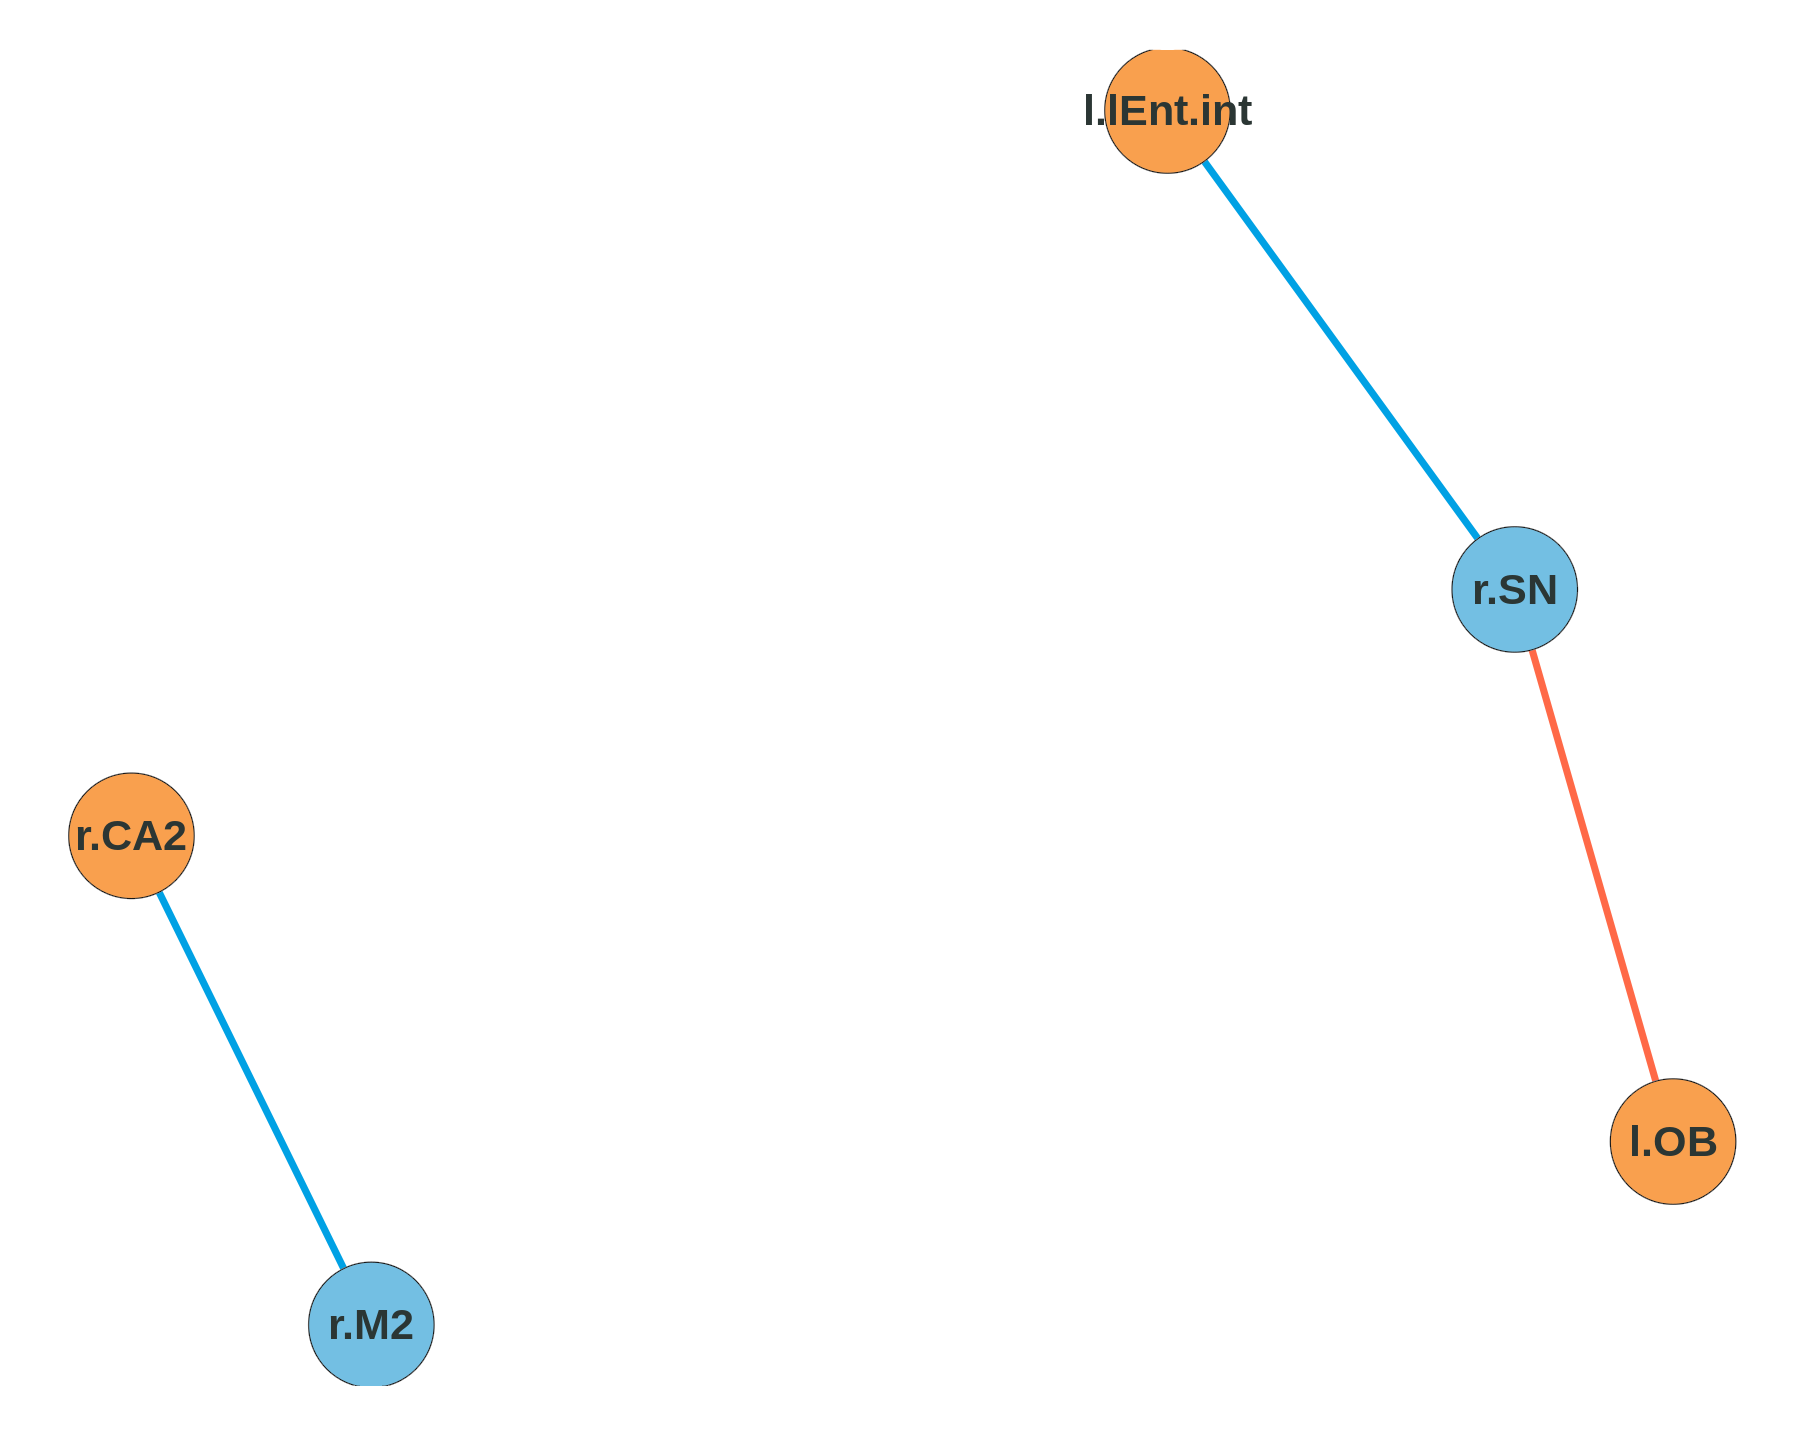

In [67]:
tam = 35

set.seed(42)

networks_cov_ROI_Alc <- as_tbl_graph(ModVol_scdiff_t_short_Alc %>% reduce(rbind) %>% 
    mutate(color = case_when(value > 0 ~ "positive", value < 0 ~ "negative")) %>% 
    unique() %>% select(-c(value,stars)))  %>% 
    activate("nodes") %>% mutate(color = case_when(name == "r.M2" ~ "ROI", 
                                name == "l.CA2" ~ "ROI", name == "r.SN" ~ "ROI",
                                name == "r.OB" ~ "ROI", TRUE ~ "Alc")) %>% 
    ggraph(layout = 'fr', niter = 4200, area = 0.1) + 
    geom_edge_link(aes(edge_colour=color),show.legend = TRUE, edge_width = 2) + 
    geom_node_point(aes(), size = tam, color = "white") +
    geom_node_point(aes(), size = tam, alpha = 0.7) +
    geom_node_point(aes(color = color), size = tam * 0.98)  +
    scale_edge_color_manual(values = c("#00A1E4","#FF6947"), name = "Significant covariance") + 
    scale_color_manual(values = c("#F9A04E","#73bfe3"), guide = "none") +  # Remove the color legend
    geom_node_text(aes(label = name), color = "#2B3634", fontface = "bold", size = tam * 0.26) +
    theme_graph() +
    theme(legend.position = "none"
            # legend.text = element_text(size = tam * 0.8),
            # legend.title = element_text(size = tam * 0.8),
            # legend.position = c(0.65, 0.05),  # Adjust the legend position
            # legend.justification = c(0, 0),  # Adjust the legend justification
            # legend.box.just = "right"
            )  # Adjust the legend box justification
networks_cov_ROI_Alc

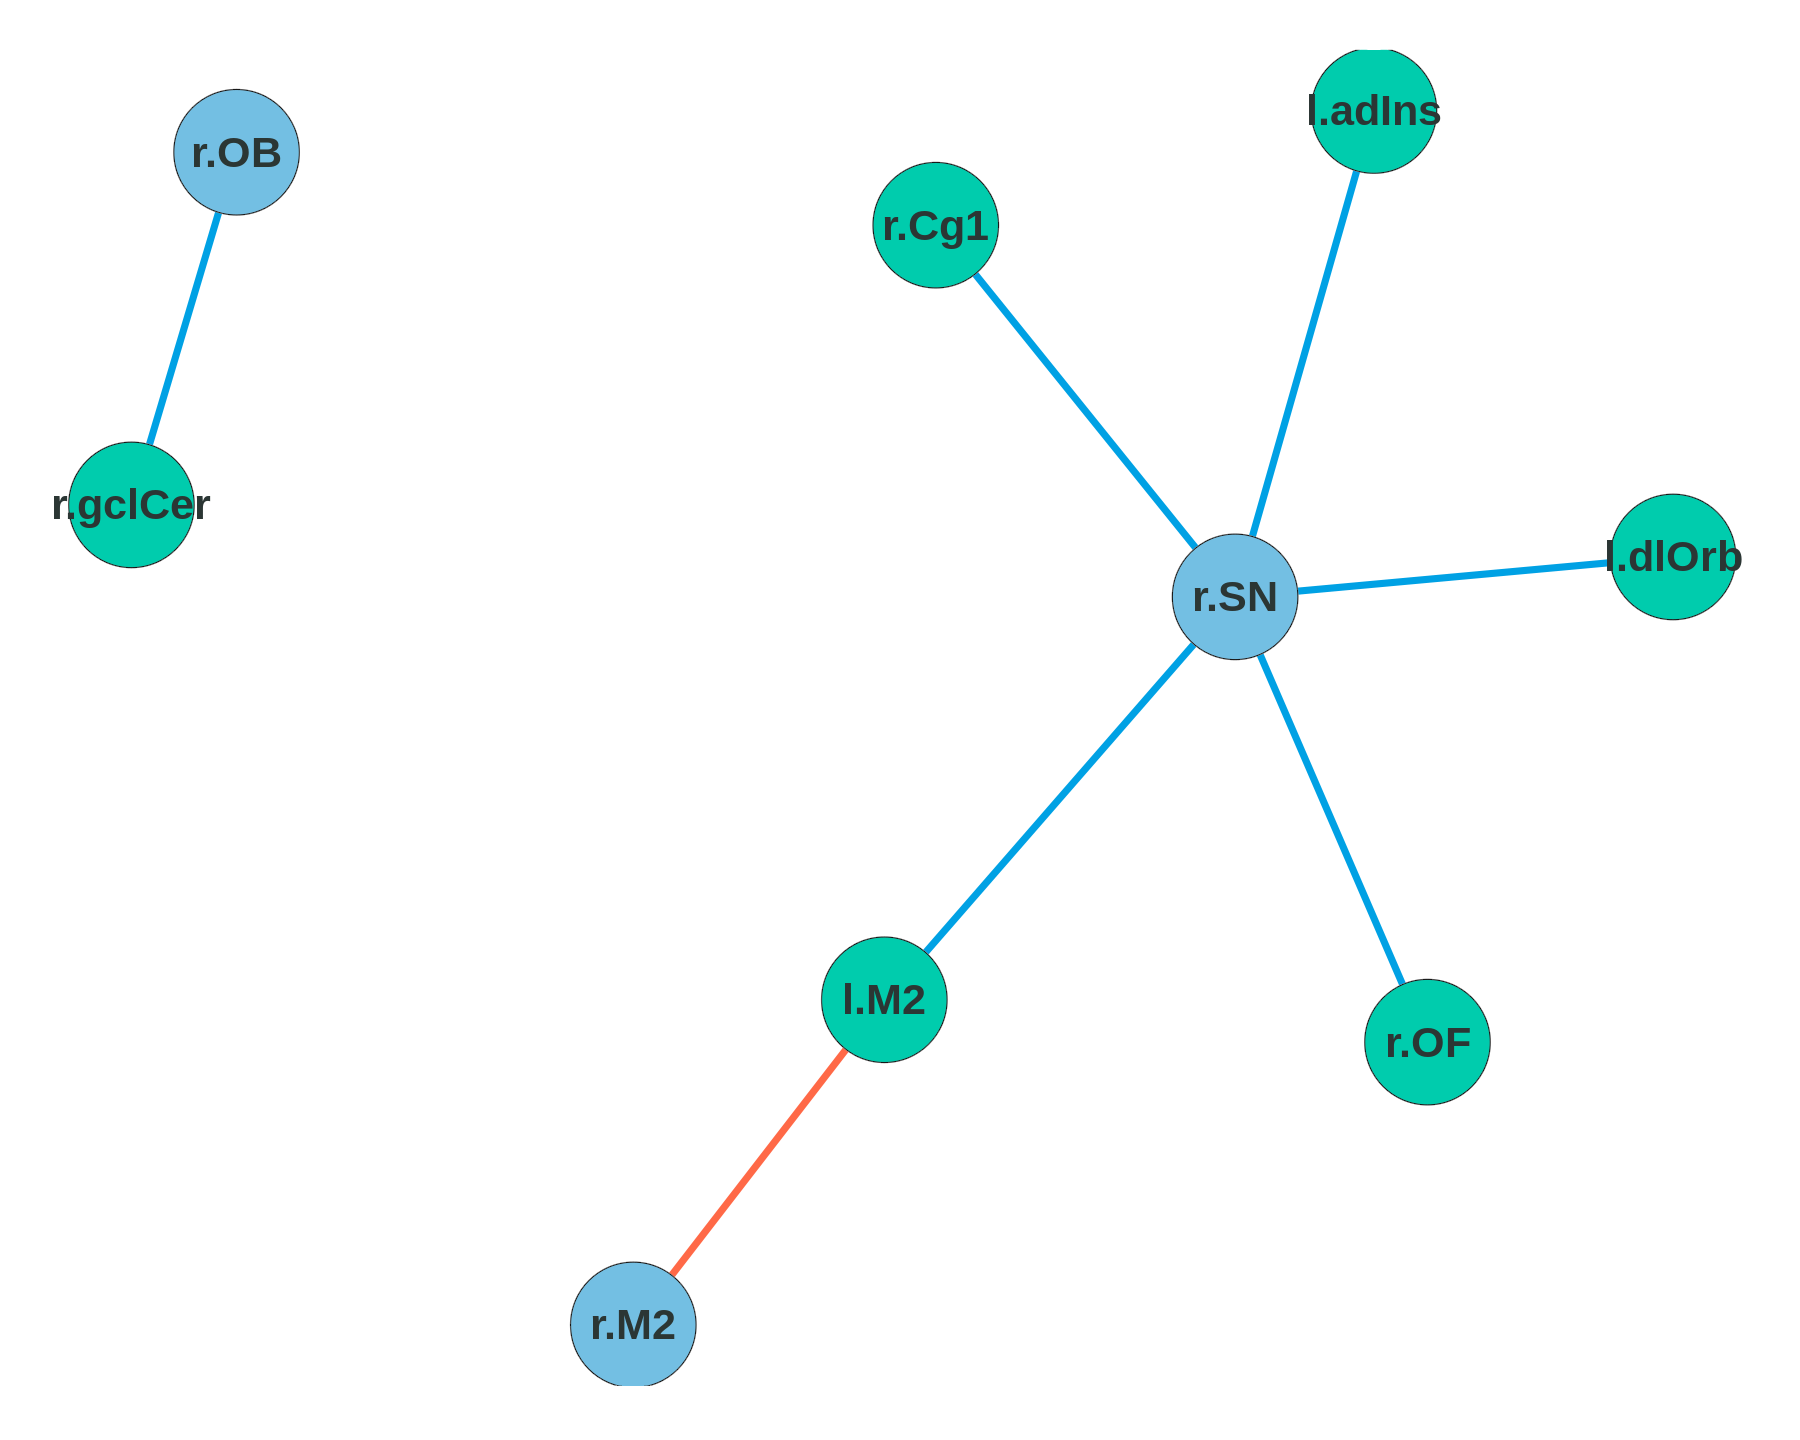

In [68]:
set.seed(42)
networks_cov_ROI_Str <- as_tbl_graph(ModVol_scdiff_t_short_Str %>% reduce(rbind) %>% 
    mutate(color = case_when(value > 0 ~ "positive", value < 0 ~ "negative")) %>% 
    unique() %>% select(-c(value,stars))) %>% 
    activate("nodes") %>% mutate(color = case_when(name == "r.M2" ~ "ROI", 
                                name == "l.CA2" ~ "ROI", name == "r.SN" ~ "ROI",
                                name == "r.OB" ~ "ROI", TRUE ~ "Alc")) %>% 
    ggraph(layout = 'fr') + 
    geom_edge_link(aes(edge_colour=color),show.legend = TRUE, edge_width = 2) + 
    geom_node_point(aes(), size = tam, color = "white") +
    geom_node_point(aes(), size = tam, alpha = 0.7) +
    geom_node_point(aes(color = color), size = tam * 0.98)  +
    scale_edge_color_manual(values = c("#00A1E4","#FF6947"), name = "Significant covariance") + 
    scale_color_manual(values = c("#00CCAD","#73bfe3"), guide = "none") +  # Remove the color legend
    geom_node_text(aes(label = name), color = "#2B3634", fontface = "bold", size = tam * 0.26) +
    theme_graph() +
    theme(legend.position = "none"
            # legend.text = element_text(size = tam * 0.8),
            # legend.title = element_text(size = tam * 0.8),
            # legend.position = c(0.65, 0.05),  # Adjust the legend position
            # legend.justification = c(0, 0),  # Adjust the legend justification
            # legend.box.just = "right"
            )  # Adjust the legend box justification  
networks_cov_ROI_Str

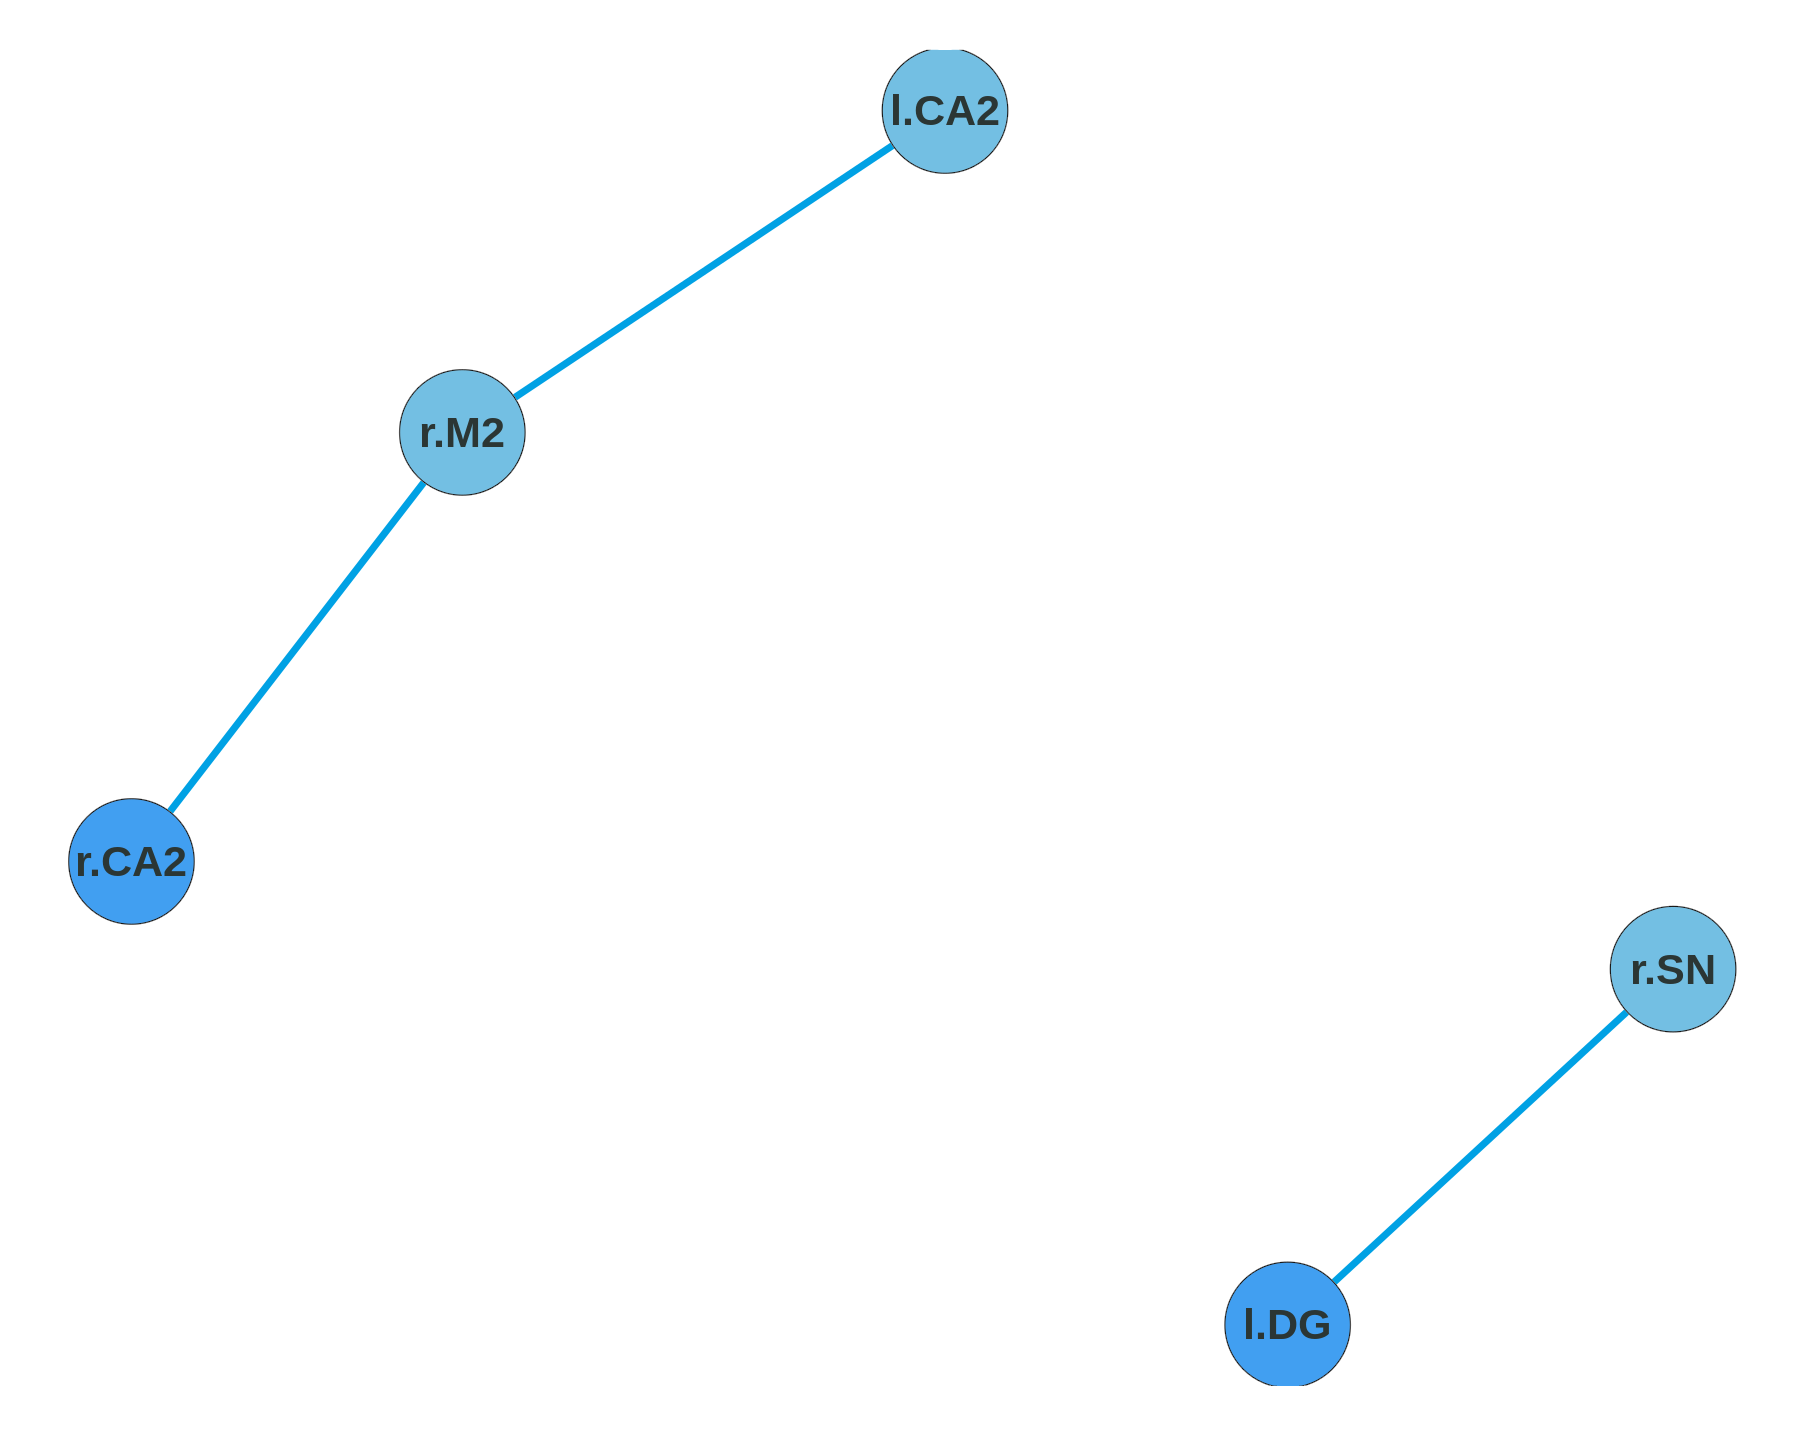

In [69]:
set.seed(42)
networks_cov_ROI_AlcStr <- as_tbl_graph(ModVol_scdiff_t_short_AlcStr %>% reduce(rbind) %>% 
    mutate(color = case_when(value > 0 ~ "positive", value < 0 ~ "negative")) %>% 
    unique() %>% select(-c(value,stars))) %>% 
    activate("nodes") %>% mutate(color = case_when(name == "r.M2" ~ "ROI", 
                                name == "l.CA2" ~ "ROI", name == "r.SN" ~ "ROI",
                                name == "r.OB" ~ "ROI", TRUE ~ "Alc")) %>% 
    ggraph(layout = 'fr', niter = 4200, area = 0.1) + 
    geom_edge_link(aes(edge_colour=color),show.legend = TRUE, edge_width = 2) + 
    geom_node_point(aes(), size = tam, color = "white") +
    geom_node_point(aes(), size = tam, alpha = 0.7) +
    geom_node_point(aes(color = color), size = tam * 0.98)  +
    scale_edge_color_manual(values = c("#00A1E4","#FF6947"), name = "Significant covariance") + 
    scale_color_manual(values = c("#419FF1","#73bfe3"), guide = "none") +  # Remove the color legend
    geom_node_text(aes(label = name), color = "#2B3634", fontface = "bold", size = tam * 0.26) +
    theme_graph() +
    theme(legend.position = "none"
            # legend.text = element_text(size = tam * 0.8),
            # legend.title = element_text(size = tam * 0.8),
            # legend.position = c(0.65, 0.05),  # Adjust the legend position
            # legend.justification = c(0, 0),  # Adjust the legend justification
            # legend.box.just = "right"
            )  # Adjust the legend box justification
networks_cov_ROI_AlcStr

In [70]:
# networks_cov_ROI_Alc <- ModVol_scdiff_t_short_Alc %>% names() %>% map(~ 
#         simplify(graph_from_data_frame(d = ModVol_scdiff_t_short_Alc[[.x]] %>% select(- c(value, stars)), 
#         vertices = ModVol_scdiff_t_short_Alc[[.x]] %>% 
#         mutate(color = case_when(value > 0 ~ "positive", value < 0 ~ "negative")) %>% 
#         select(c(ROI,color)) %>% unique() %>% add_row(ROI = .x, color = "ROI"),
#         directed = FALSE))) %>% set_names(ModVol_scdiff_t_short_Alc %>% names())

# networks_cov_ROI_Str <- ModVol_scdiff_t_short_Str %>% names() %>% map(~ 
#         simplify(graph_from_data_frame(d = ModVol_scdiff_t_short_Str[[.x]] %>% select(- c(value, stars)), 
#         vertices = ModVol_scdiff_t_short_Str[[.x]] %>% 
#         mutate(color = case_when(value > 0 ~ "positive", value < 0 ~ "negative")) %>% 
#         select(c(ROI,color)) %>% unique() %>% add_row(ROI = .x, color = "ROI"),
#         directed = FALSE))) %>% set_names(ModVol_scdiff_t_short_Str %>% names())

# networks_cov_ROI_AlcStr <- ModVol_scdiff_t_short_AlcStr %>% names() %>% map(~ 
#         simplify(graph_from_data_frame(d = ModVol_scdiff_t_short_AlcStr[[.x]] %>% select(- c(value, stars)), 
#         vertices = ModVol_scdiff_t_short_AlcStr[[.x]] %>% 
#         mutate(color = case_when(value > 0 ~ "positive", value < 0 ~ "negative")) %>% 
#         select(c(ROI,color)) %>% unique() %>% add_row(ROI = .x, color = "ROI"),
#         directed = FALSE))) %>% set_names(ModVol_scdiff_t_short_AlcStr %>% names())

# ggnet2(networks_cov_ROI_Alc$left_cornu_ammonis_2_left, color = "color", group = color, 
#       palette = "Set1", size = 0, node.group = "color", node.color = "color") +
#       geom_point(aes(color = color), size = 18, color = "white") +
#       geom_point(aes(color = color), size = 18, alpha = 0.5) +
#       geom_point(aes(color = color), size = 15) +
#       geom_text(aes(label = label), color = "white", fontface = "bold") +
#       guides(color = guide_legend(title = "Significant\nassociation", override.aes = list(size = 5))) 

# color_Alc  <- c("#F8766DFF","#619CFFFF",scales::alpha("#C96505",0.5))
# color_Str  <- c("#F8766DFF","#619CFFFF",scales::alpha("#00A087",0.5))
# color_AlcStr  <- c("#F8766DFF","#619CFFFF",scales::alpha("#09467C",0.5))


# net_colors_Alc <- networks_cov_ROI_Alc %>% names() %>% map(~ color_Alc[as.numeric(factor(V(networks_cov_ROI_Alc[[.x]])$color,
#                                                                                     levels = c("positive", "negative","ROI")))] ) %>% 
#     set_names(networks_cov_ROI_Alc %>% names())

# net_colors_Str <- networks_cov_ROI_Str %>% names() %>% map(~ color_Str[as.numeric(factor(V(networks_cov_ROI_Str[[.x]])$color,
#                                                                                     levels = c("positive", "negative","ROI")))] ) %>%
#     set_names(networks_cov_ROI_Str %>% names())

# net_colors_AlcStr <- networks_cov_ROI_AlcStr %>% names() %>% map(~ color_AlcStr[as.numeric(factor(V(networks_cov_ROI_AlcStr[[.x]])$color,
#                                                                                     levels = c("positive", "negative","ROI")))] ) %>%
#     set_names(networks_cov_ROI_AlcStr %>% names())

### **4. Trayectories of overlapped regions**

In [71]:
Volumes_4rois <- read_csv("Data/MRI/DBM/smooth_1mm/ROI_jacobians.csv") %>% 
                    mutate(RID = factor(RID), Group = factor(Group, levels = c("Ctrl", "Alc", "Str", "Alc+Str")),
                        Session = factor(Session), Sex = factor(Sex, levels = c("female", "male")),
                        Batch = factor(Batch))  %>% dplyr::select(-c(Subject,IN))

Rows: 1047 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): RID, Session, Subject, Group, Batch, Sex, IN
dbl (6): Age, EPI, VO, CPu, DG, Cer

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [72]:
names_Lmod_4rois <- colnames(Volumes_4rois[7:11])

suppressMessages(invisible(capture.output(
Lmod_4rois <-  names_Lmod_4rois %>% map(~ lmer(eval(paste0(.x," ~ Age*Group*Sex + Batch + (1 |RID)")), data = Volumes_4rois) ) %>% set_names(names_Lmod_4rois)
    )))
Residuals_Lmod_4rois <- Lmod_4rois %>% map_dfc(~ .x %>% residuals())

suppressMessages(invisible(capture.output(
Contrast_Lmod_4rois <- Lmod_4rois %>%
    map(~ contrast(emmeans(.x,~ Group|Sex), method = "pairwise", adjust = "fdr")) %>% set_names(names_Lmod_4rois)
    )))

suppressMessages(invisible(capture.output(
Eff_size_Lmod_4rois <- names_Lmod_4rois %>%
    map(~ eff_size(Contrast_Lmod_4rois[[.x]], sigma = sigma(Lmod_4rois[[.x]]),edf = df.residual(Lmod_4rois[[.x]]) ) ) %>% set_names(names_Lmod_4rois) 
    )))


significant_names_Lmod_4rois <- Contrast_Lmod_4rois %>% map(~ .x %>% as_tibble() %>% 
    #filter(p.value < 0.05) %>% 
    add_significance() %>% 
    select(contrast, Sex, estimate, SE, df, p.value,p.value.signif) %>% 
    mutate(across(c(estimate, SE, df, p.value), ~ round(., 2))) ) %>% compact(1) 
significant_names_Lmod_4rois

$EPI
# A tibble: 12 × 7
   contrast         Sex    estimate    SE    df p.value p.value.signif
   <fct>            <fct>     <dbl> <dbl> <dbl>   <dbl> <chr>         
 1 Ctrl - Alc       female    -0.02  0.01  78.9    0.2  ns            
 2 Ctrl - Str       female     0     0.01  81.3    0.95 ns            
 3 Ctrl - (Alc+Str) female    -0.02  0.01  82.7    0.2  ns            
 4 Alc - Str        female     0.02  0.01  79.5    0.2  ns            
 5 Alc - (Alc+Str)  female     0     0.01  81.0    0.95 ns            
 6 Str - (Alc+Str)  female    -0.02  0.01  74.6    0.2  ns            
 7 Ctrl - Alc       male       0.01  0.01  77.4    0.32 ns            
 8 Ctrl - Str       male      -0.01  0.01  82.3    0.59 ns            
 9 Ctrl - (Alc+Str) male      -0.02  0.01  84.7    0.27 ns            
10 Alc - Str        male      -0.02  0.01  79.6    0.27 ns            
11 Alc - (Alc+Str)  male      -0.03  0.01  81.8    0.09 ns            
12 Str - (Alc+Str)  male      -0.01  0.01  78.3    0.32 ns            

$VO
# A tibble: 12 × 7
   contrast         Sex    estimate    SE    df p.value p.value.signif
   <fct>            <fct>     <dbl> <dbl> <dbl>   <dbl> <chr>         
 1 Ctrl - Alc       female     0.01  0.01  79.2    0.42 ns            
 2 Ctrl - Str       female     0.02  0.01  81.5    0.03 *             
 3 Ctrl - (Alc+Str) female     0.02  0.01  82.9    0.03 *             
 4 Alc - Str        female     0.02  0.01  79.7    0.06 ns            
 5 Alc - (Alc+Str)  female     0.02  0.01  81.2    0.06 ns            
 6 Str - (Alc+Str)  female     0     0.01  75.0    0.99 ns            
 7 Ctrl - Alc       male       0     0.01  77.6    0.83 ns            
 8 Ctrl - Str       male       0.01  0.01  82.4    0.29 ns            
 9 Ctrl - (Alc+Str) male       0     0.01  84.8    0.83 ns            
10 Alc - Str        male       0.01  0.01  79.7    0.29 ns            
11 Alc - (Alc+Str)  male       0     0.01  81.9    0.83 ns            
12 Str - (Alc+Str)  male      -0.01  0.01  78.5    0.29 ns            

$CPu
# A tibble: 12 × 7
   contrast         Sex    estimate    SE    df p.value p.value.signif
   <fct>            <fct>     <dbl> <dbl> <dbl>   <dbl> <chr>         
 1 Ctrl - Alc       female    -0.02  0.01  80.6    0.29 ns            
 2 Ctrl - Str       female    -0.02  0.01  82.0    0.35 ns            
 3 Ctrl - (Alc+Str) female    -0.02  0.01  82.8    0.52 ns            
 4 Alc - Str        female     0     0.01  80.6    0.93 ns            
 5 Alc - (Alc+Str)  female     0.01  0.01  81.6    0.71 ns            
 6 Str - (Alc+Str)  female     0.01  0.01  77.3    0.71 ns            
 7 Ctrl - Alc       male      -0.01  0.01  78.8    0.81 ns            
 8 Ctrl - Str       male       0     0.01  82.0    0.81 ns            
 9 Ctrl - (Alc+Str) male       0.01  0.01  83.8    0.81 ns            
10 Alc - Str        male       0.01  0.01  80.2    0.81 ns            
11 Alc - (Alc+Str)  male       0.01  0.01  81.8    0.81 ns            
12 Str - (Alc+Str)  male       0     0.01  79.3    0.81 ns            

$DG
# A tibble: 12 × 7
   contrast         Sex    estimate    SE    df p.value p.value.signif
   <fct>            <fct>     <dbl> <dbl> <dbl>   <dbl> <chr>         
 1 Ctrl - Alc       female    -0.01  0.01  80.6    0.38 ns            
 2 Ctrl - Str       female    -0.03  0.01  81.9    0.22 ns            
 3 Ctrl - (Alc+Str) female    -0.02  0.01  82.7    0.38 ns            
 4 Alc - Str        female    -0.02  0.01  80.6    0.38 ns            
 5 Alc - (Alc+Str)  female    -0.01  0.01  81.5    0.69 ns            
 6 Str - (Alc+Str)  female     0.01  0.01  77.4    0.38 ns            
 7 Ctrl - Alc       male       0.02  0.01  78.9    0.04 *             
 8 Ctrl - Str       male      -0.01  0.01  81.9    0.72 ns            
 9 Ctrl - (Alc+Str) male      -0.01  0.01  83.6    0.72 ns            
10 Alc - Str        male      -0.03  0.01  80.2    0.04 *             
11 Alc - (Alc+Str)  male      -0.03  0.01  81.7    0.04 *            

In [73]:
significant_Eff_size_Lmod_4rois <- significant_names_Lmod_4rois %>% names() %>% map(~ Eff_size_Lmod_4rois[[.x]] ) %>%
    set_names(significant_names_Lmod_4rois %>% names())

In [74]:
Volumes_4rois_residuals <- Volumes_4rois %>% dplyr::select(RID,Group,Session,Age,Sex,Batch) %>% add_column(Residuals_Lmod_4rois)

In [75]:
names_Lmod_4rois_sig <- significant_names_Lmod_4rois[1:4] %>% names()

In [76]:
names_Lmod_4rois_sig

[1] "EPI" "VO"  "CPu" "DG"

In [77]:
Volumes_4rois_residuals_male <- Volumes_4rois_residuals %>% filter(Sex == "male")
Volumes_4rois_male <- Volumes_4rois %>% filter(Sex == "male")

Lmod_males_4rois <-  names_Lmod_4rois_sig %>% map(~ lmer(eval(paste0(.x," ~ Age*Group + Batch + (1 |RID)")), 
            data = Volumes_4rois_male) ) %>% set_names(names_Lmod_4rois_sig)

plots_4rois_male_res <- NULL
for (i in 1:length(names_Lmod_4rois_sig)) {
      ROI <- names_Lmod_4rois_sig[i]
      plots_4rois_male_res[[ROI]] <- 
      ggpredict(Lmod_males_4rois[[i]], terms = c("Age", "Group")) %>% 
      plot(show_data = TRUE, show_ci = FALSE, dot_size = 4, dot_alpha = 0.25) +
      labs(
      title = gsub('_left','',names_Lmod_4rois_sig[i]),
      x = "Age (days)",
      y = "Relative volume") +
      theme_pubr() +
      theme(
      plot.title = element_text(size = 12, face = "bold"),
      axis.title.x = element_text(size = 25, face = "bold"),
      axis.title.y = element_text(size = 25, face = "bold"),
      axis.text = element_text(size = 22, face = "bold")) + 
      scale_color_manual(values = pal_group) +                 
      theme(legend.position = "none",
            plot.title = element_text(hjust = 0.5,size = 16, face = "bold")) +
      #theme(axis.text.x = element_text(size=15)) +
      geom_line(size = 2) 
}

boundary (singular) fit: see help('isSingular')

Data points may overlap. Use the `jitter` argument to add some amount of
  random variation to the location of data points and avoid overplotting.

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Data points may overlap. Use the `jitter` argument to add some amount of
  random variation to the location of data points and avoid overplotting.

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Data points may overlap. Use the `jitter` argument to add some amount of
  random variation to the location of data points and avoid overplotting.

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Data points may overlap. Use the `jitter` argument to add some amount of
  random variation to the location of data points and avoid overplotting.

Scale for colour is already pres

In [78]:
Volumes_4rois_residuals_female <- Volumes_4rois_residuals %>% filter(Sex == "female")
Volumes_4rois_female <- Volumes_4rois %>% filter(Sex == "female")

Lmod_females_4rois <-  names_Lmod_4rois_sig %>% map(~ lmer(eval(paste0(.x," ~ Age*Group + Batch + (1 |RID)")), 
            data = Volumes_4rois %>% filter(Sex == "female")) ) %>% set_names(names_Lmod_4rois_sig)

plots_4rois_female_res <- NULL
for (i in 1:length(names_Lmod_4rois_sig)) {
      ROI <- names_Lmod_4rois_sig[i]
      plots_4rois_female_res[[ROI]] <- 
      ggpredict(Lmod_females_4rois[[i]], terms = c("Age", "Group")) %>% 
      plot(show_data = TRUE, show_ci = FALSE, dot_size = 4, dot_alpha = 0.25) +
      stat_compare_means(comparisons = Contrast_Lmod_4rois[[i]]) +
      labs(
      title = gsub('_left','',names_Lmod_4rois_sig[i]),
      x = "Age (days)",
      y = "Relative volume") +
      theme_pubr() +
      theme(
      plot.title = element_text(size = 12, face = "bold"),
      axis.title.x = element_text(size = 25, face = "bold"),
      axis.title.y = element_text(size = 25, face = "bold"),
      axis.text = element_text(size = 22, face = "bold")) + 
      scale_color_manual(values = pal_group) +                 
      theme(legend.position = "none",
            plot.title = element_text(hjust = 0.5,size = 16, face = "bold")) +
      #theme(text = element_text(size=20), axis.text.x = element_text(size=15)) +
      geom_line(size = 2)
}

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

Data points may overlap. Use the `jitter` argument to add some amount of
  random variation to the location of data points and avoid overplotting.

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Data points may overlap. Use the `jitter` argument to add some amount of
  random variation to the location of data points and avoid overplotting.

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Data points may overlap. Use the `jitter` argument to add some amount of
  random variation to the location of data points and avoid overplotting.

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Data points may overlap. Use the `jitter` argument to add some amount of
  random 

In [79]:
plots_4rois_res <- NULL
for (i in 1:length(names_Lmod_4rois_sig)) {
      ROI <- names_Lmod_4rois_sig[i]
      plots_4rois_res[[ROI]] <- 
      ggpredict(Lmod_4rois[[i]], terms = c("Age", "Group", "Sex")) %>% 
      plot(show_data = TRUE, show_ci = FALSE, facet = TRUE,show.title = FALSE, dot_size = 4, dot_alpha = 0.25) + 
      labs(
      #title = gsub('_left','',names_Lmod_4rois_sig[i]),
      x = "Age (days)",
      y = "Relative volume") +
      theme_pubr() +
      theme(
      plot.title = element_blank(),
      axis.title.x = element_text(size = 25, face = "bold"),
      axis.title.y = element_text(size = 25, face = "bold"),
      axis.text = element_text(size = 22, face = "bold")) + 
      scale_color_manual(values = pal_group) +                 
      theme(legend.position = "none",
            plot.title = element_text(hjust = 0.5,size = 16, face = "bold"),
            strip.background =element_rect(fill=NA)) +
      #theme(axis.text.x = element_text(size=15)) +
      geom_line(size = 2)
}

Data points may overlap. Use the `jitter` argument to add some amount of
  random variation to the location of data points and avoid overplotting.

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Data points may overlap. Use the `jitter` argument to add some amount of
  random variation to the location of data points and avoid overplotting.

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Data points may overlap. Use the `jitter` argument to add some amount of
  random variation to the location of data points and avoid overplotting.

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Data points may overlap. Use the `jitter` argument to add some amount of
  random variation to the location of data points and avoid overplotting.

Scale for colour is already present.
Adding another scale for colour, which will 

In [80]:
dir.create(paste0(getwd(),"/Figures/DBM/covs/Global"))

## **4. Export Figures**

In [81]:
# save(,file = "Data/MRI_metrics.RData")

In [82]:
dir.create("Figures/DBM/Trayectories/VolROI", recursive=T)
dir.create("Statistics/MRI", recursive=T)

In [83]:
tama=16
taman=13

ggsave(plot = networks_cov_ROI_AlcStr, filename = paste0(getwd(),"/Figures/DBM/covs/Global/networks_cov_ROI_AlcStr.png"), width = tama, height = taman, dpi = 300)
ggsave(plot = networks_cov_ROI_Str, filename = paste0(getwd(),"/Figures/DBM/covs/Global/networks_cov_ROI_Str.png"), width = tama, height = taman, dpi = 300)
ggsave(plot = networks_cov_ROI_Alc, filename = paste0(getwd(),"/Figures/DBM/covs/Global/networks_cov_ROI_Alc.png"), width = tama, height = taman, dpi = 300)

In [84]:
csv_objects <- ls(pattern = "significant_names")

invisible(
    1:length(csv_objects) %>% 
        map(~ {
            element <- get(csv_objects[[.x]])
            names(element) %>% 
                map(~ write_csv(element[[.x]], paste0("Statistics/MRI/", .x, ".csv")))
        })
)

In [85]:
Model_plots_male %>% names() %>% map(~ ggsave(plot = Model_plots_male[[.x]][[.x]], dpi=300,height = 4, width = 5.5,bg="transparent",
       filename = paste0("Figures/DBM/Trayectories/VolROI/male_",.x,".png")) )

Model_plots_female %>% names() %>% map(~ ggsave(plot = Model_plots_female[[.x]][[.x]], dpi=300,height = 4, width = 5.5,bg="transparent",
       filename = paste0("Figures/DBM/Trayectories/VolROI/female_",.x,".png")) )

[[1]]
[1] "Figures/DBM/Trayectories/VolROI/male_left_cornu_ammonis_1_left.png"

[[2]]
[1] "Figures/DBM/Trayectories/VolROI/male_right_glomerular_layer_of_the_olfactory_bulb.png"

[[3]]
[1] "Figures/DBM/Trayectories/VolROI/male_right_secondary_motor_cortex.png"

[[4]]
[1] "Figures/DBM/Trayectories/VolROI/male_right_substantia_nigra.png"

[[1]]
[1] "Figures/DBM/Trayectories/VolROI/female_left_cornu_ammonis_1_left.png"

[[2]]
[1] "Figures/DBM/Trayectories/VolROI/female_right_glomerular_layer_of_the_olfactory_bulb.png"

[[3]]
[1] "Figures/DBM/Trayectories/VolROI/female_right_secondary_motor_cortex.png"

[[4]]
[1] "Figures/DBM/Trayectories/VolROI/female_right_substantia_nigra.png"

In [86]:
plots_4rois_male_res %>% names() %>% map(~ ggsave(plot = plots_4rois_male_res[[.x]], dpi=300,height = 6, width = 7.5,bg="transparent",
       filename = paste0("Figures/DBM/Trayectories/male_",.x,".png")) )

plots_4rois_female_res %>% names() %>% map(~ ggsave(plot = plots_4rois_female_res[[.x]], dpi=300,height = 6, width = 7.5,bg="transparent",
       filename = paste0("Figures/DBM/Trayectories/female_",.x,".png")) )

[[1]]
[1] "Figures/DBM/Trayectories/male_EPI.png"

[[2]]
[1] "Figures/DBM/Trayectories/male_VO.png"

[[3]]
[1] "Figures/DBM/Trayectories/male_CPu.png"

[[4]]
[1] "Figures/DBM/Trayectories/male_DG.png"

[[1]]
[1] "Figures/DBM/Trayectories/female_EPI.png"

[[2]]
[1] "Figures/DBM/Trayectories/female_VO.png"

[[3]]
[1] "Figures/DBM/Trayectories/female_CPu.png"

[[4]]
[1] "Figures/DBM/Trayectories/female_DG.png"

In [87]:
plots_4rois_male_res %>% names() %>% map(~ ggsave(plot = plots_4rois_res[[.x]], dpi=300,height = 6, width = 9,bg="transparent",
       filename = paste0("Figures/DBM/Trayectories/both_",.x,".png")) )

[[1]]
[1] "Figures/DBM/Trayectories/both_EPI.png"

[[2]]
[1] "Figures/DBM/Trayectories/both_VO.png"

[[3]]
[1] "Figures/DBM/Trayectories/both_CPu.png"

[[4]]
[1] "Figures/DBM/Trayectories/both_DG.png"

In [88]:
dir.create("Figures/DBM/Trayectories/Peaks", recursive = T)

In [89]:
Model3_plots_male %>% names() %>% map(~ ggsave(plot = Model3_plots_male[[.x]][[1]], dpi=300,height = 4, width = 5.5,bg="transparent",
       filename = paste0("Figures/DBM/Trayectories/Peaks/male_",.x,".png")) )

Model3_plots_female %>% names() %>% map(~ ggsave(plot = Model3_plots_female[[.x]][[1]], dpi=300,height = 4, width = 5.5,bg="transparent",
       filename = paste0("Figures/DBM/Trayectories/Peaks/female_",.x,".png")) )

[[1]]
[1] "Figures/DBM/Trayectories/Peaks/male_left_molecular_layer_of_the_cerebellum_left_LMod3_Alc.png"

[[2]]
[1] "Figures/DBM/Trayectories/Peaks/male_right_molecular_layer_of_the_cerebellum_2_LMod3_Alc.png"

[[3]]
[1] "Figures/DBM/Trayectories/Peaks/male_right_primary_motor_cortex_LMod3_Str.png"

[[1]]
[1] "Figures/DBM/Trayectories/Peaks/female_left_molecular_layer_of_the_cerebellum_left_LMod3_Alc.png"

[[2]]
[1] "Figures/DBM/Trayectories/Peaks/female_right_molecular_layer_of_the_cerebellum_2_LMod3_Alc.png"

[[3]]
[1] "Figures/DBM/Trayectories/Peaks/female_right_primary_motor_cortex_LMod3_Str.png"

In [90]:
Model5_plots_male %>% names() %>% map(~ ggsave(plot = Model5_plots_male[[.x]][[1]], dpi=300,height = 4, width = 5.5,bg="transparent",
       filename = paste0("Figures/DBM/Trayectories/Peaks/male_",.x,".png")) )

Model5_plots_female %>% names() %>% map(~ ggsave(plot = Model5_plots_female[[.x]][[1]], dpi=300,height = 4, width = 5.5,bg="transparent",
       filename = paste0("Figures/DBM/Trayectories/Peaks/female_",.x,".png")) )

[[1]]
[1] "Figures/DBM/Trayectories/Peaks/male_right_striatum_2_LMod5_Alc.png"

[[2]]
[1] "Figures/DBM/Trayectories/Peaks/male_left_entorhinal_cortex_left_LMod5_Alc.png"

[[3]]
[1] "Figures/DBM/Trayectories/Peaks/male_right_molecular_layer_of_the_cerebellum_2_LMod5_Alc.png"

[[4]]
[1] "Figures/DBM/Trayectories/Peaks/male_left_primary_motor_cortex_left_2_LMod5_Alc.png"

[[5]]
[1] "Figures/DBM/Trayectories/Peaks/male_left_primary_motor_cortex_left_LMod5_AlcStr.png"

[[1]]
[1] "Figures/DBM/Trayectories/Peaks/female_right_striatum_2_LMod5_Alc.png"

[[2]]
[1] "Figures/DBM/Trayectories/Peaks/female_left_entorhinal_cortex_left_LMod5_Alc.png"

[[3]]
[1] "Figures/DBM/Trayectories/Peaks/female_right_molecular_layer_of_the_cerebellum_2_LMod5_Alc.png"

[[4]]
[1] "Figures/DBM/Trayectories/Peaks/female_left_primary_motor_cortex_left_2_LMod5_Alc.png"

[[5]]
[1] "Figures/DBM/Trayectories/Peaks/female_left_primary_motor_cortex_left_LMod5_AlcStr.png"

In [91]:
Model7_plots_male %>% names() %>% map(~ ggsave(plot = Model7_plots_male[[.x]][[1]], dpi=300,height = 4, width = 5.5,bg="transparent",
       filename = paste0("Figures/DBM/Trayectories/Peaks/male_",.x,".png")) )

Model7_plots_female %>% names() %>% map(~ ggsave(plot = Model7_plots_female[[.x]][[1]], dpi=300,height = 4, width = 5.5,bg="transparent",
       filename = paste0("Figures/DBM/Trayectories/Peaks/female_",.x,".png")) )

[[1]]
[1] "Figures/DBM/Trayectories/Peaks/male_right_striatum_LMod7_Str.png"

[[2]]
[1] "Figures/DBM/Trayectories/Peaks/male_left_entorhinal_cortex_left_LMod7_Str.png"

[[3]]
[1] "Figures/DBM/Trayectories/Peaks/male_right_molecular_layer_of_the_cerebellum_LMod7_Str.png"

[[4]]
[1] "Figures/DBM/Trayectories/Peaks/male_left_primary_motor_cortex_left_LMod7_Str.png"

[[5]]
[1] "Figures/DBM/Trayectories/Peaks/male_left_molecular_layer_of_the_cerebellum_left_LMod7_AlcStr.png"

[[1]]
[1] "Figures/DBM/Trayectories/Peaks/female_right_striatum_LMod7_Str.png"

[[2]]
[1] "Figures/DBM/Trayectories/Peaks/female_left_entorhinal_cortex_left_LMod7_Str.png"

[[3]]
[1] "Figures/DBM/Trayectories/Peaks/female_right_molecular_layer_of_the_cerebellum_LMod7_Str.png"

[[4]]
[1] "Figures/DBM/Trayectories/Peaks/female_left_primary_motor_cortex_left_LMod7_Str.png"

[[5]]
[1] "Figures/DBM/Trayectories/Peaks/female_left_molecular_layer_of_the_cerebellum_left_LMod7_AlcStr.png"

In [92]:
save(Jdata_jacobians_residuals,Jdata_jacobians,Volumes_jacobians_residuals,Volumes_jacobians, file = paste0(getwd(),"/Data/sMRI.RData"))

# **Network based statistics**

## **0 Running RABIES pipeline**

### **0.1 Creating atlas segmentation**


In [93]:
dir.create("code/Atlas/")

In [94]:
# system("scp -r jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alcohol_rat/Atlas/code/* code/Atlas/",intern = T)

In [95]:
# system("scp -r jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alcohol_rat/analysis/fmri/code/* code/RABIES/",intern = T)

In [96]:
dir.create("Data/MRI/Atlas/")

In [97]:
# system("scp -r jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alcohol_rat/analysis/fmri/Atlas/Mask_erode.nii.gz Data/MRI/Atlas/",
#        intern = T)

# system("scp -r jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alcohol_rat/analysis/fmri/Atlas/ROI_fmri_mask.nii Data/MRI/Atlas/",
#        intern = T)

After create ROI-specific atlas for DBM analysis, we're going to joining ROIs and erode each ROI

- Joining ROI by label in SIGMA   
bash [rois_mask_joining.sh](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/Atlas/rois_mask_joining.sh)

- Erode using FSL-toolbox   
bash [rois_mask_erode.sh](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/Atlas/rois_mask_erode.sh)

### **0.2 Running through HCP cluster**

To obtain the FC-matrices, we going to use RABIES pipeline to preprocessing, removing confounds noise and do the analysis.
[RABIES](https://rabies.readthedocs.io/en/latest/index.html) is an open source image processing pipeline for rodent fMRI.

RABIES is used through HCP cluster by a [singularity container](https://docs.sylabs.io/guides/3.5/user-guide/index.html). 
Scripts used:
- [Deoblique](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/RABIES/01_deoblique.sh): Prior to start with rabies, we need to correct the obliquing. 
- [Preprocessing](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/RABIES/02_preproc.sh): Atlas used to preprocessig step was [SIGMA v.1.2.1](https://www.nature.com/articles/s41467-019-13575-7). 

<div align="center">   
<img src="attachment:01486e99-a70a-4614-b93b-d2f8bd62ac70.png" />
</div>

- [Confounding](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/RABIES/03_confound.sh): Using ICA 10-dim, and WM_signal CSF_signal mot_6

<div align="center">   
<img src="attachment:b47c8159-c128-4aaa-9fb6-490ff63286ad.png" />
</div>

- [Analysis](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/RABIES/04_analysis.sh): 
    - ICA-based analyses: --group_ica based on FSL’s MELODIC ICA algorithm
    - Correlation-based analyses: --FC_matrix based on --ROI_type SIGMA labels

### **0.3 Quality control**
---

We need to verify the quality of RABIES processing or re-run the pipeline.

- Registration of structural to template

<div align="center"> 
    
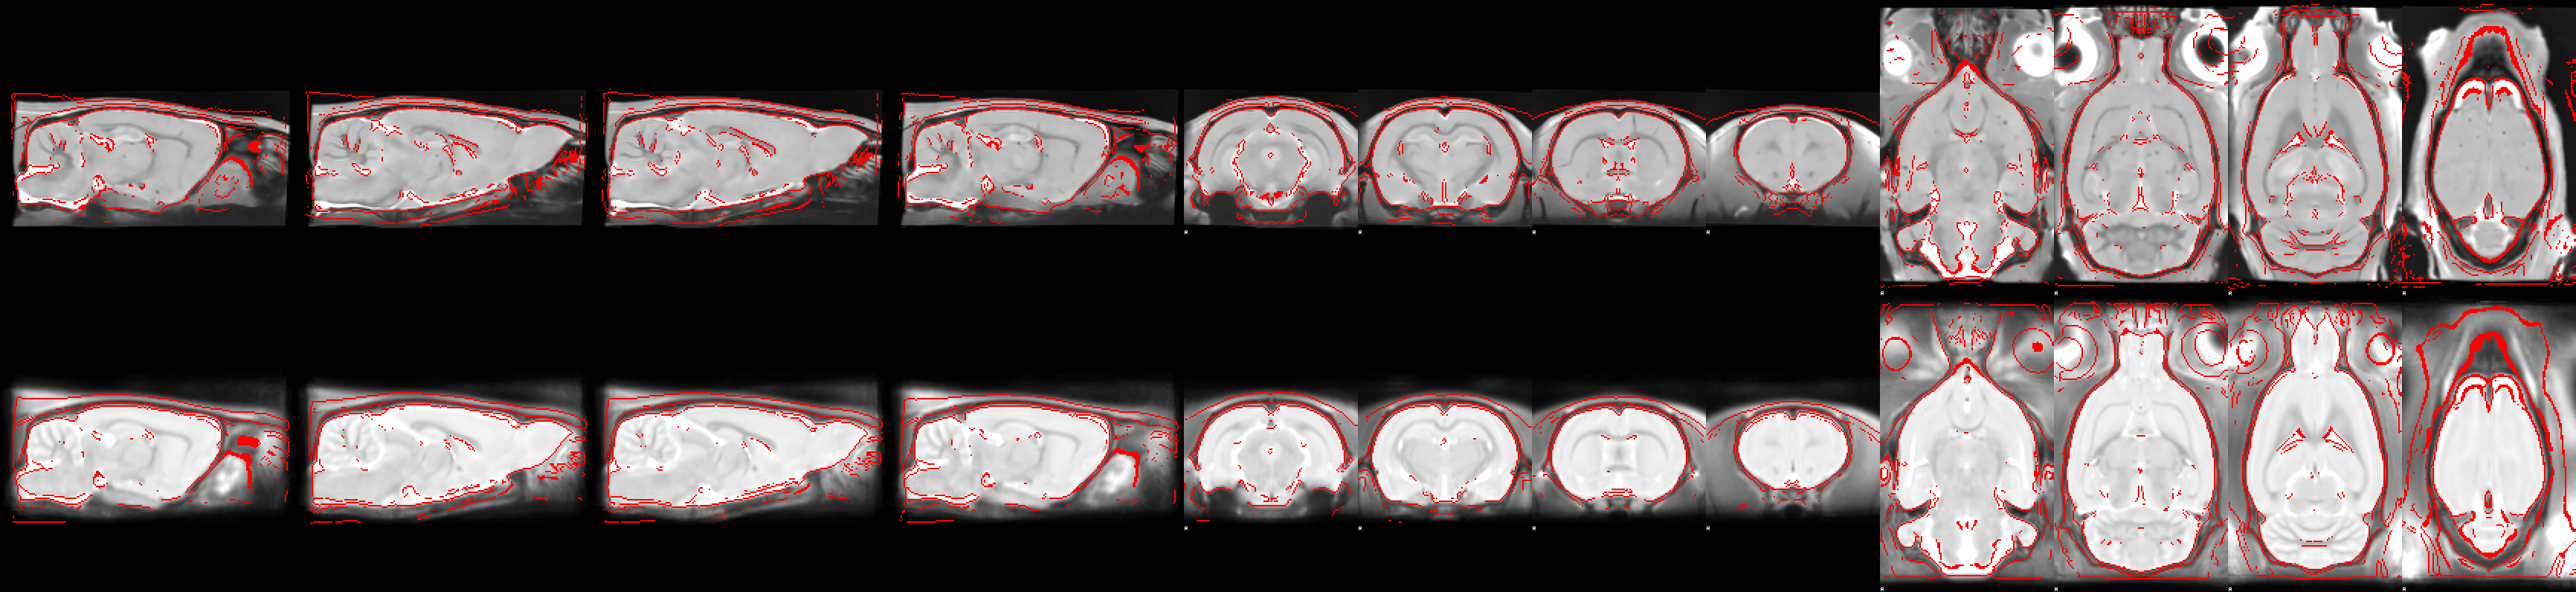

</div>

- Registration of functional to structural

<div align="center">   
    
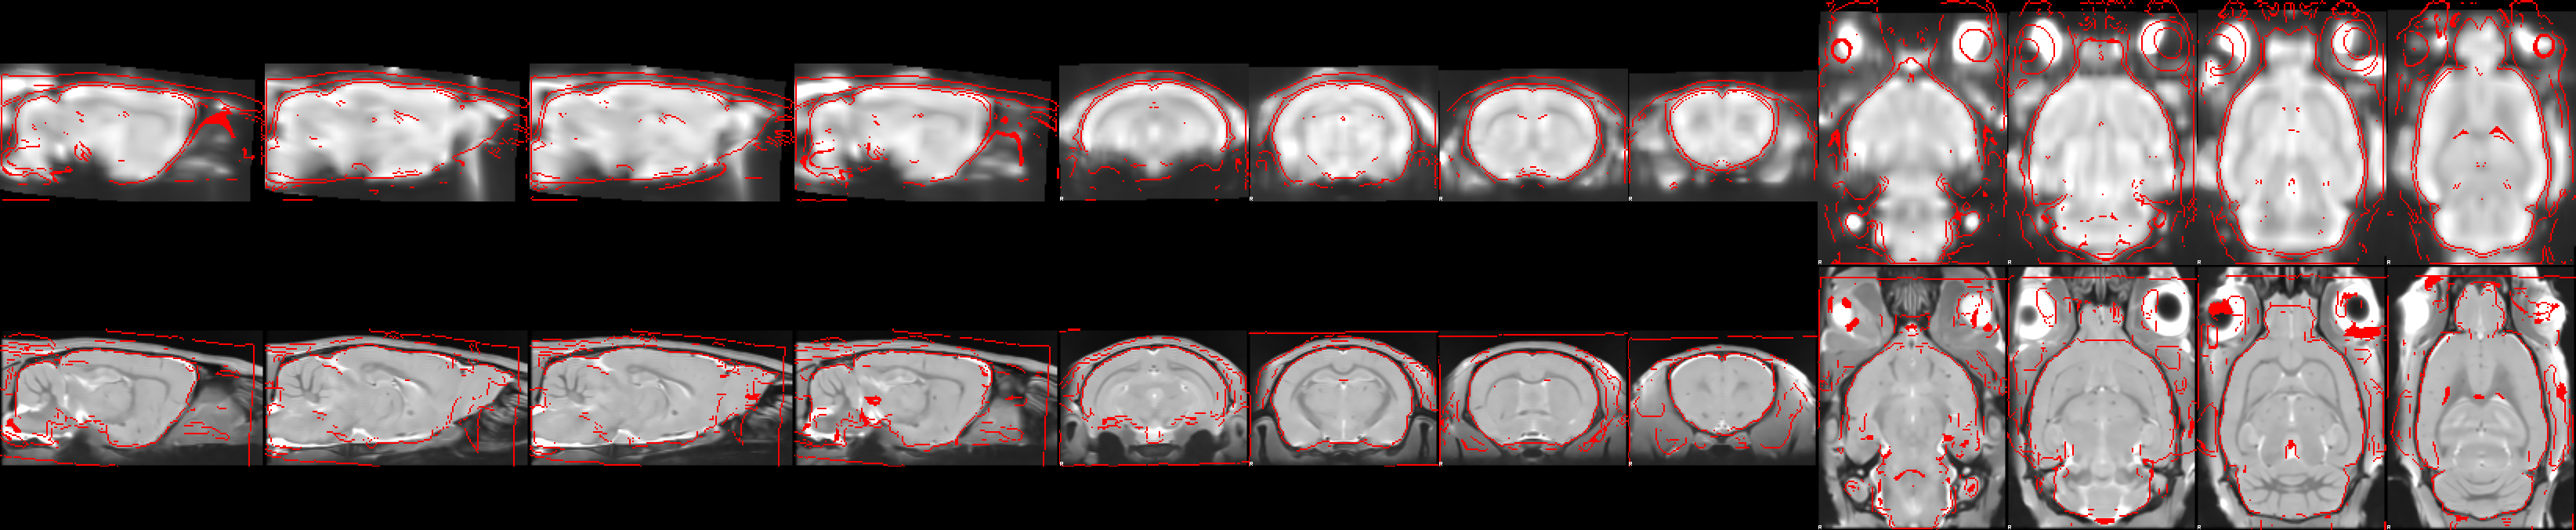
    
</div>

## **1. Data preparation**

Reading each matrix obtained by RABIES pipeline.
{RID}_ses-{session}_task-rest_run-01_bold_RAS_combined_cleaned_FC_matrix.csv

The output is labeled according to ROI-value (i.e. 11, 21, etc., for left hemisphere and 12, 22, etc., for right hemisphere). Using SIGMA atlas we're going to relabed the row/columns.


In [98]:
# system("for i in {1,2,3,5}; do scp -r jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alcohol_rat/analysis/fmri/rabies/analysisDR_out/Session-T${i}/Alc/analysis_main_wf/analysis_wf/_split_name_sub-*_ses-*_task-rest_run-01_bold/FC_matrix/*csv Data/MRI/FC-matrices/ses-T${i}/Alc/ ; done",
#                    intern = T)

In [99]:
# system("for i in {1,2,3,5}; do scp -r jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alcohol_rat/analysis/fmri/rabies/analysisDR_out/Session-T${i}/Ctrl/analysis_main_wf/analysis_wf/_split_name_sub-*_ses-*_task-rest_run-01_bold/FC_matrix/*csv Data/MRI/FC-matrices/ses-T${i}/Ctrl/ ; done",
#                    intern = T)

## Previous run (delete)

In [100]:
# select_ROIs <- read_excel("Data/MRI/SIGMA_InVivo_Anatomical_Brain_Atlas_ListOfStructures_fmri.xlsx",sheet = 2) %>% 
#                clean_names() %>% select(region_of_interest) %>% as_vector() %>% make_clean_names()

In [101]:
# Structures <- seq(1,length(select_ROIs)) %>% 
#                   map(~ c(paste0("l_",select_ROIs)[.x], paste0("r_",select_ROIs)[.x])) %>% 
#                   unlist()

In [102]:
# matrices_path <- list.files("Data/MRI/FC-matrices",pattern = "FC_matrix", recursive = T, full.names = T)

In [103]:
# suppressMessages(invisible(capture.output(
# matrices_files <- matrices_path %>% map(~ .x %>% read_csv(show_col_types = FALSE)) %>% 
#        map(~ .x %>% select(-c("544","546")) %>% filter(...1 != c("544","546"))) %>% map(~ .x[-1] %>% set_colnames(Structures) %>% 
#                                                                                            set_rownames(Structures))
#     )))

In [104]:
# new_paths <- matrices_path %>% str_replace(pattern = "FC-matrices", replacement = "fc-matrices")

In [105]:
# suppressMessages(invisible(capture.output(
# seq(1, length(new_paths)) %>% map(~ dir.create(dirname(new_paths[.x]),recursive = T, showWarnings = F))
#     )))

In [106]:
# invisible(capture.output(
# seq(1, length(new_paths)) %>% map(~ write.csv(matrices_files[[.x]], paste0(new_paths[[.x]]), row.names = TRUE))
#     ))

In [107]:
# file.copy(from = "Data/MRI/RID_dataset.csv", to = "Data/MRI/fc-matrices/")

In [108]:
# output_send=system("scp -r Data/MRI/fc-matrices jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alcohol_rat/analysis/fmri/NBR/",
#                    intern = T)

## New one 

In [109]:
# select_ROIs <- read_excel("Data/MRI/ListOfStructures_fmri.xlsx",sheet = 2) %>% 
#                clean_names() %>% select(label) %>% as_vector() %>% make_clean_names()

In [110]:
# matrices_path <- list.files("Data/MRI/FC-matrices",pattern = "FC_matrix", recursive = T, full.names = T)

In [111]:
# suppressMessages(invisible(capture.output(
# matrices_files <- matrices_path %>% map(~ .x %>% read_csv(show_col_types = FALSE)) %>% 
#        map(~ .x %>% select(-c("78")) %>% filter(...1 != c("78"))) %>% map(~ .x[-1] %>% set_colnames(select_ROIs) %>% set_rownames(select_ROIs))
#     )))

In [112]:
# new_paths <- matrices_path %>% str_replace(pattern = "FC-matrices", replacement = "fc-matrices")

In [113]:
# suppressMessages(invisible(capture.output(
# seq(1, length(new_paths)) %>% map(~ dir.create(dirname(new_paths[.x]),recursive = T, showWarnings = F))
#     )))

In [114]:
# invisible(capture.output(
# seq(1, length(new_paths)) %>% map(~ write.csv(matrices_files[[.x]], paste0(new_paths[[.x]]), row.names = TRUE))
#     ))

In [115]:
# file.copy(from = "Data/MRI/RID_dataset.csv", to = "Data/MRI/fc-matrices/")

In [116]:
# output_send=system("scp -r Data/MRI/fc-matrices jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alcohol_rat/analysis/fmri/NBR/",
#                    intern = T)

## **2. NBR arrangement**

In niagara cluster, run the following Rscript:

module load cobralab   
Rscript code/NBR/[fc_dataset.R]()   
for i in mod{1,2,3,4,5,6}; do sbatch code/[06_NBR.sh]() $i; done

In [117]:
# Download NBR results
# system("scp -r jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alc_stress/analysis/fmri/NBR/*.* Data/MRI/NBR/",
#        intern = T)

In [118]:
load("Data/MRI/NBR/fit_nbr_mod1_thrs10_05_01.Rdata")
load("Data/MRI/NBR/fit_nbr_mod3_thrs10_05_01.Rdata")
load("Data/MRI/NBR/fit_nbr_mod4_thrs10_05_01.Rdata")
load("Data/MRI/NBR/fit_nbr_mod5_thrs10_05_01.Rdata")
load("Data/MRI/NBR/fit_nbr_mod6_thrs10_05_01.Rdata")
load("Data/MRI/NBR/fit_nbr_mod7_thrs10_05_01.Rdata")

In [119]:
fit_nbr_mod1_gt_thr05$fwe$`Age:GroupAlc`
fit_nbr_mod1_gt_thr05$fwe$`Age:GroupStr`
fit_nbr_mod1_gt_thr05$fwe$`Age:GroupAlcStr`

Component ncomp ncompFWE strn       strnFWE
1 1         53    0.039    21.7121488 0.042  
5 5          1    1.000     0.1046085 1.000

Component ncomp ncompFWE strn       strnFWE
1   1        69    0.005    34.6408863 0.003  
27 27         1    1.000     0.4647708 0.998

Component ncomp ncompFWE strn        strnFWE
1   1        68    0.053    32.54705781 0.042  
24 24         1    1.000     0.41064102 0.998  
26 26         1    1.000     0.01595987 1.000  
34 34         1    1.000     0.37678300 0.998

In [120]:
fit_nbr_mod3_gt_thr05$fwe$`Age:GroupAlc:Sexmale`
fit_nbr_mod3_gt_thr05$fwe$`Age:GroupStr:Sexmale`
fit_nbr_mod3_gt_thr05$fwe$`Age:GroupAlcStr:Sexmale`

Component ncomp ncompFWE strn       strnFWE
1   1        31    0.246    13.7199323 0.167  
16 16         1    1.000     0.6781286 0.999  
26 26         2    0.999     0.4034681 1.000

Component ncomp ncompFWE strn     strnFWE
1 1         46    0.089    23.23713 0.032  
2 2          2    0.999     0.75136 0.997

Component ncomp ncompFWE strn       strnFWE
1   1        28    0.455    9.65713238 0.501  
2   2         1    1.000    0.09996883 1.000  
3   3         3    0.994    0.36217594 0.999  
21 21         1    1.000    0.19609825 1.000

In [121]:
fit_nbr_mod5_gt_thr05$fwe$`Age:GroupStr:Sexmale`
fit_nbr_mod5_gt_thr05$fwe$`Age:GroupAlcStr:Sexmale`

Component ncomp ncompFWE strn      strnFWE
4   4         5    0.937    2.5803818 0.858  
5   5        19    0.500    7.4198785 0.480  
7   7         3    0.988    0.9025283 0.995  
50 50         1    1.000    0.2762734 1.000

Component ncomp ncompFWE strn       strnFWE
1   1        3     0.989    1.09074434 0.981  
3   3        2     0.998    0.84235229 0.991  
4   4        1     1.000    1.02526152 0.986  
5   5        1     1.000    0.04067608 1.000  
9   9        1     1.000    0.54357911 0.999  
12 12        1     1.000    0.04205708 1.000  
16 16        4     0.969    1.24455370 0.967  
21 21        2     0.998    1.07260621 0.983

In [122]:
fit_nbr_mod7_lt_thr05$fwe$`Age:GroupAlc:Sexmale`
fit_nbr_mod7_lt_thr05$fwe$`Age:GroupAlcStr:Sexmale`

Component ncomp ncompFWE strn      strnFWE
4   4         5    0.928    2.5803818 0.828  
5   5        19    0.498    7.4198784 0.463  
7   7         3    0.991    0.9025283 0.990  
50 50         1    1.000    0.2762734 1.000

Component ncomp ncompFWE strn     strnFWE
1 1         78    0.019    37.48157 0.015

In [123]:
# Read FC data
cmx <- readRDS(file = "Data/MRI/NBR/fc_matrices.rds")
# Read phenotypic data
phen <- read.csv(file = "Data/MRI/NBR/fc_dataset.csv") %>% 
    mutate_if(is.character, as.factor) %>% 
    mutate(Group = factor(Group, levels = c("Ctrl", "Alc", "Str", "AlcStr")))

labels_rois <- read_csv("Data/MRI/NBR/rois.csv") %>% dplyr::select(c(ROI)) %>% add_column(number = 1:nrow(.)) 

Rows: 58 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): ROI, ROI_name

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [124]:
rois_dbm <- read_csv("Data/MRI/DBM/smooth_1mm/Trayectories/ROIs_models.csv")

Rows: 191 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): label, label_clean, Model, ROI_model
dbl (7): d1, d2, d3, x, y, z, value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [125]:
rois_dbm_filtered <- rois_dbm %>% 
    dplyr::select(label_clean) %>% 
    mutate(label_clean = str_remove(label_clean, "_left")) %>% 
    unique() %>% 
    mutate(label_clean = str_replace_all(label_clean, "(?<=.)_", " ")) %>%
    mutate(label_clean = str_replace(label_clean, ".36", "")) %>%
    mutate(label_clean = str_replace(label_clean, ".35", "")) %>%
    filter(!grepl(".2", label_clean)) %>%
    mutate(label_clean = str_to_title(label_clean)) %>% 
    mutate(label_clean = str_replace_all(label_clean, " ", ".")) %>%
    mutate(label_clean = str_replace(label_clean, "Left.", "l_")) %>%
    mutate(label_clean = str_replace(label_clean, "Right.", "r_")) %>%
    mutate(label_clean = str_replace(label_clean, "Agranular.", ""))  %>% 
    mutate(label_clean = str_replace(label_clean, "Granular.", "")) %>% 
    mutate(label_clean = str_replace(label_clean, "Dysgranular.", "")) %>% 
    mutate(label_clean = str_replace(label_clean, ".External.Part", "")) %>%
    mutate(label_clean = str_replace(label_clean, "Lateral.", "")) %>%
    mutate(label_clean = str_replace(label_clean, ".Part.A", "")) %>%
    mutate(label_clean = str_replace(label_clean, ".Part.B", "")) %>%
    mutate(label_clean = str_replace(label_clean, "Pre.Limbic", "PreLimbic")) %>%
    mutate(label_clean = str_replace(label_clean, "Presubiculum", "Subiculum")) %>%
    mutate(label_clean = str_replace(label_clean, "Cornu.Ammonis", "Hippocampus")) %>%
    mutate(label_clean = str_replace(label_clean, "Dentate.Gyrus", "Hippocampus")) %>%
    mutate(label_clean = str_replace(label_clean, "Retosplenial", "Retrosplenial")) %>%
    mutate(label_clean = str_replace(label_clean, "Orbitofrontal.Region", "Orbitofrontal.cortex")) %>%
    mutate(label_clean = str_replace(label_clean, ".1", "")) %>%
    mutate(label_clean = str_replace(label_clean, ".3", "")) %>%
    mutate(label_clean = str_replace(label_clean, ".4", "")) %>%
    mutate(label_clean = str_replace(label_clean, ".5", "")) %>%
    arrange(substr(label_clean, 1, 1)) %>% unique()

In [126]:
difference <- anti_join(read_csv("Data/MRI/NBR/rois.csv") %>% 
    dplyr::select(ROI_name) %>% set_colnames("label_clean"), rois_dbm_filtered,
    by = c("label_clean"))

Rows: 58 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): ROI, ROI_name

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [127]:
names_with_colon <- names(fit_nbr_mod1_gt_thr05$components) %>%
    str_subset(":")

names_with_colon_m3 <- names(fit_nbr_mod3_gt_thr05$components) %>%
    str_subset(":GroupStr:Sexmale")

regions_mod1 <- names_with_colon %>% 
    map(~ fit_nbr_mod1_gt_thr05$components[[.x]][,2:3] %>% as_tibble() ) %>% set_names(names_with_colon) %>% 
    map(~ .x  %>% left_join(labels_rois, by = c(`3Drow` = "number")) %>% left_join(labels_rois, by = c(`3Dcol` = "number")) ) %>% 
    map(~ .x %>% rename("ROI_row" = "ROI.x", "ROI_col" = ROI.y) %>% select(-c(`3Drow`,`3Dcol`)) ) 

regions_mod1_tofilter <- regions_mod1 %>% 
    map(~ .x %>% mutate(ROI = paste(ROI_row,ROI_col, sep = "_")))

regions_mod3 <- names_with_colon_m3 %>% 
    map(~ fit_nbr_mod3_gt_thr05$components[[.x]][,2:3] %>% as_tibble() ) %>% set_names(names_with_colon_m3) %>% 
    map(~ .x  %>% left_join(labels_rois, by = c(`3Drow` = "number")) %>% left_join(labels_rois, by = c(`3Dcol` = "number")) ) %>% 
    map(~ .x %>% rename("ROI_row" = "ROI.x", "ROI_col" = ROI.y) %>% select(-c(`3Drow`,`3Dcol`)) )

regions_mod3_to_filter <- regions_mod3 %>% 
    map(~ .x %>% mutate(ROI = paste(ROI_row,ROI_col, sep = "_")))

In [128]:
unique_regions <- names_with_colon %>% map(~ c(unique(regions_mod1[[.x]]$ROI_row),unique(regions_mod1[[.x]]$ROI_col)) %>% unique() )

In [129]:
networks_mod1 <-  names_with_colon %>% map(~ graph_from_data_frame(regions_mod1[[.x]], directed = FALSE) ) %>% set_names(names_with_colon)
networks_mod3 <-  names_with_colon_m3 %>% map(~ graph_from_data_frame(regions_mod3[[.x]], directed = FALSE) ) %>% set_names(names_with_colon_m3)

In [130]:
dir.create("Figures/Networks", recursive = T)

In [131]:
fg <- cluster_edge_betweenness(networks_mod1$`Age:GroupAlc`)
cols <- c(ggplot2::alpha("#F6F4D6",1),ggplot2::alpha("#9BC53D",0.5),ggplot2::alpha("#01200F",0.25),
          ggplot2::alpha("#F3CDCC",0.8),ggplot2::alpha("#465775",0.3),ggplot2::alpha("#E0C1B3",0.6),
          ggplot2::alpha("#17BEBB",0.3),ggplot2::alpha("#C46BAE",0.6))
set.seed(42)
png(res = 300, file = "Figures/Networks/Mod1_Alc.png", bg = "transparent",height = 10, width = 10, units = "in")
plot(fg, networks_mod1$`Age:GroupAlc`, vertex.size = 18, 
     #palette = c("#09467C","#09467C","#09467C","#09467C","#09467C","#09467C","#09467C","#09467C","#09467C"),
     mark.groups = lapply(1:7, function(i) which(fg$membership == i)), edge.color = "black",
     vertex.label.family = "Times New Roman",vertex.label.color = "black", #vertex.color = "#C96505", 
     layout = layout_nicely, mark.border = cols, mark.border.width = 2, mark.col = cols)
dev.off()

png 
  2

In [132]:
fg <- cluster_edge_betweenness(networks_mod1$`Age:GroupStr`)
cols <- c(ggplot2::alpha("#F6F4D6",1),ggplot2::alpha("#9BC53D",0.5),ggplot2::alpha("#01200F",0.25),
          ggplot2::alpha("#F3CDCC",0.8),ggplot2::alpha("#465775",0.3),ggplot2::alpha("#E0C1B3",0.6),
          ggplot2::alpha("#17BEBB",0.3),ggplot2::alpha("#C46BAE",0.6))
set.seed(42)
png(res = 300, file = "Figures/Networks/Mod1_Str.png", bg = "transparent",height = 10, width = 10, units = "in")
plot(fg, networks_mod1$`Age:GroupStr`, vertex.size = 18, 
     #palette = c("#09467C","#09467C","#09467C","#09467C","#09467C","#09467C","#09467C","#09467C","#09467C"),
     mark.groups = lapply(1:9, function(i) which(fg$membership == i)), edge.color = "black",
     vertex.label.family = "Times New Roman",vertex.label.color = "black", 
     layout = layout_nicely, mark.border = cols, mark.border.width = 2, mark.col = cols)
dev.off()

png 
  2

In [133]:
fg <- cluster_edge_betweenness(networks_mod1$`Age:GroupAlcStr`)
cols <- c(ggplot2::alpha("#F6F4D6",1),ggplot2::alpha("#9BC53D",0.5),ggplot2::alpha("#01200F",0.25),
          ggplot2::alpha("#F3CDCC",0.8),ggplot2::alpha("#465775",0.3),ggplot2::alpha("#E0C1B3",0.6),
          ggplot2::alpha("#17BEBB",0.3),ggplot2::alpha("#C46BAE",0.6))
set.seed(42)
png(res = 300, file = "Figures/Networks/Mod1_AlcStr.png", bg = "transparent",height = 10, width = 10, units = "in")
plot(fg, networks_mod1$`Age:GroupAlcStr`, vertex.size = 18, 
     #palette = c("#09467C","#09467C","#09467C","#09467C","#09467C","#09467C","#09467C","#09467C","#09467C"),
     mark.groups = lapply(1:9, function(i) which(fg$membership == i)), edge.color = "black",
     vertex.label.family = "Times New Roman",vertex.label.color = "black", 
     layout = layout_nicely, mark.border = cols, mark.border.width = 2, mark.col = cols)
dev.off()

png 
  2

In [134]:
fg <- cluster_edge_betweenness(networks_mod3$`Age:GroupStr:Sexmale`)
cols <- c(ggplot2::alpha("#9BC53D",0.42),ggplot2::alpha("#01200F",0.25),ggplot2::alpha("#F3CDCC",0.8),
          ggplot2::alpha("#465775",0.3),ggplot2::alpha("#17BEBB",0.3),ggplot2::alpha("#C46BAE",0.6))
set.seed(42)
png(res = 300, file = "Figures/Networks/Mod3_Str.png", bg = "transparent",height = 10, width = 10, units = "in")
plot(fg, networks_mod3$`Age:GroupStr:Sexmale`, vertex.size = 18, 
     #palette = c("#09467C","#09467C","#09467C","#09467C","#09467C","#09467C","#09467C","#09467C","#09467C"),
     mark.groups = lapply(1:5, function(i) which(fg$membership == i)), edge.color = "black",
     vertex.label.family = "Times New Roman",vertex.label.color = "black", 
     layout = layout_nicely, mark.border = cols, mark.border.width = 2, mark.col = cols)
dev.off()

png 
  2

In [135]:
networks_FC_Str <- networks_mod3$`Age:GroupStr:Sexmale` %>% 
    ggraph(layout = 'fr') + 
    geom_edge_link(aes(),show.legend = TRUE, edge_width = 1.3) + 
    geom_node_point(aes(), size = tam, color = "white") +
    geom_node_point(aes(), size = tam, alpha = 0.5) +
    geom_node_point(aes(color = "#00CCAD"), size = tam * 0.98, alpha = 0.5) +
    scale_edge_color_manual(values = c("#00CCAD"), name = "Significant covariance") + 
    scale_color_manual(values = c("#00CCAD"), guide = "none") +  # Remove the color legend
    geom_node_text(aes(label = name), color = "#000000", fontface = "bold", size = tam * 0.26) +
    theme_graph() +
    theme(legend.position = "none") 

In [136]:
ggsave(plot = networks_FC_Str, filename = paste0(getwd(),"/Figures/Networks/networks_FC_Str.png"), width = 14, height = 16, dpi = 300)


### Functional connectivity analysis

In [137]:
fc_ls <- list.files(path = file.path("Data/MRI/NBR/fc-matrices"),
                    pattern = "FC_matrix.csv",
                    recursive = T,
                    full.names = T)

In [138]:
fc_names <- fc_ls %>% basename() %>% str_remove(pattern = "_task-rest_run-01_bold_RAS_combined_cleaned_FC_matrix.csv") 
filtering_regions <- unique_regions %>% unlist() %>% unique()

In [139]:
fc_renamed <- fc_ls %>% map(~ read_csv(.x) %>% select(-1) %>% set_colnames(labels_rois$ROI) %>% 
    add_column(ROI=labels_rois$ROI,.before = 1,.name_repair = "minimal") ) %>% 
    map(~ .x %>% subset(ROI %in% filtering_regions) %>% select(c(ROI,filtering_regions)) ) %>% 
    set_names(fc_names)

New names:
• `` -> `...1`
• `l_Entorhinal.Cortex` -> `l_Entorhinal.Cortex...12`
• `r_Entorhinal.Cortex` -> `r_Entorhinal.Cortex...13`
• `l_Entorhinal.Cortex` -> `l_Entorhinal.Cortex...26`
• `r_Entorhinal.Cortex` -> `r_Entorhinal.Cortex...27`
Rows: 58 Columns: 59
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (59): ...1, l_Insular.Cortex, r_Insular.Cortex, l_Amygdal.Area, r_Amygda...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
• `l_Entorhinal.Cortex` -> `l_Entorhinal.Cortex...12`
• `r_Entorhinal.Cortex` -> `r_Entorhinal.Cortex...13`
• `l_Entorhinal.Cortex` -> `l_Entorhinal.Cortex...26`
• `r_Entorhinal.Cortex` -> `r_Entorhinal.Cortex...27`
Rows: 58 Columns: 59
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (59): ...1, l_Insular.Cortex, r_Insular.Cor

In [140]:
fc_ordered <- fc_renamed %>%   
    map(~ .x %>%  select(ROI, .x$ROI))

In [141]:
fc_ordered_wROI <- list()

for (i in 1:length(fc_ordered)) {

temp2 <- list()

for (c in 2:ncol(fc_ordered[[i]])) {
    temp <- c()
    col_temp <- c()
    for (r in 1:nrow(fc_ordered[[i]])) {
        temp <- c(temp, fc_ordered[[i]][r, colnames(fc_ordered[[i]]) %>% .[c]])
        col_temp <- c(col_temp, paste0(fc_ordered[[i]]$ROI[r], "_", colnames(fc_ordered[[i]]) %>% .[c]) )
        temp2[[c]] <- temp %>% set_names(col_temp) 
    }
}

df_interaction <- temp2[-1] %>% map(~ .x %>% as_tibble(.name_repair = "minimal")) 

nm2 <- Reduce(intersect, lapply(df_interaction, names))
df_combined <- cbind(df_interaction[[1]], do.call(cbind,
    lapply(df_interaction[-1], function(dat) dat[setdiff(names(dat), nm2)] )))

fc_ordered_wROI[[i]] <- df_combined
}


In [142]:
fc_ordered_wROI <- fc_ordered_wROI %>% set_names(fc_ordered %>% names())

fc_list_dataframe <- 1:length(fc_ordered_wROI) %>% map(~ fc_ordered_wROI[[.x]] %>% add_column(RID_ses = fc_ordered_wROI[.x] %>% 
    names(),.name_repair = "minimal") %>% 
    mutate(RID = RID_ses %>% str_split("_") %>% map_chr(1), Ses = RID_ses %>% str_split("_") %>% map_chr(2), .before = 1) %>% 
    select(-RID_ses) )

In [143]:
fc_dataframe <- fc_list_dataframe %>% reduce(rbind)

In [144]:
fc_mod1_alc <- phen %>% left_join(fc_dataframe %>% 
    select(RID,Ses,regions_mod1_tofilter$`Age:GroupAlc`$ROI), by=c("RID","Ses")) %>%
    select(-where(~ all(. == 1))) %>%
    mutate_at(vars(contains("_")), psych::fisherz) %>% 
    mutate(RID = factor(RID), Group = factor(Group, levels = c("Ctrl", "Alc", "Str", "AlcStr")),
                        Ses = factor(Ses), Batch = factor(Batch))
fc_mod1_str <- phen %>% left_join(fc_dataframe %>% 
    select(RID,Ses,regions_mod1_tofilter$`Age:GroupStr`$ROI), by=c("RID","Ses")) %>%
    select(-where(~ all(. == 1))) %>%
    mutate_at(vars(contains("_")), psych::fisherz) %>% 
    mutate(RID = factor(RID), Group = factor(Group, levels = c("Ctrl", "Alc", "Str", "AlcStr")),
                        Ses = factor(Ses), Batch = factor(Batch))
fc_mod1_alcstr <- phen %>% left_join(fc_dataframe %>% 
    select(RID,Ses,regions_mod1_tofilter$`Age:GroupAlcStr`$ROI), by=c("RID","Ses")) %>%
    select(-where(~ all(. == 1))) %>%
    mutate_at(vars(contains("_")), psych::fisherz) %>% 
    mutate(RID = factor(RID), Group = factor(Group, levels = c("Ctrl", "Alc", "Str", "AlcStr")),
                        Ses = factor(Ses), Batch = factor(Batch))

fc_mod3_str <- phen %>% left_join(fc_dataframe %>% 
    select(RID,Ses,regions_mod3_to_filter$`Age:GroupStr`$ROI), by=c("RID","Ses")) %>%
    select(-where(~ all(. == 1))) %>%
    mutate_at(vars(contains("_")), psych::fisherz) %>% 
    mutate(RID = factor(RID), Group = factor(Group, levels = c("Ctrl", "Alc", "Str", "AlcStr")),
                        Ses = factor(Ses), Batch = factor(Batch))


In [145]:
fc_names_Lmod1 <- str_subset(colnames(fc_mod1_str),pattern = "_")

suppressMessages(invisible(capture.output(
fc_Lmod1 <-  fc_names_Lmod1 %>% map(~ lmer(eval(paste0(.x," ~ Age*Group*Sex + Batch + (1 |RID)")), data = fc_mod1_str) ) %>% 
    set_names(fc_names_Lmod1)
    )))
fc_Residuals_Lmod1 <- fc_Lmod1 %>% map_dfc(~ .x %>% residuals())

suppressMessages(invisible(capture.output(
fc_Contrast_Lmod1 <- fc_Lmod1 %>%
    map(~ contrast(emmeans(.x,~ Group|Sex), method = "pairwise", adjust = "fdr")) %>% set_names(fc_names_Lmod1)
    )))

suppressMessages(invisible(capture.output(
fc_Eff_size_VLmod <- fc_names_Lmod1 %>%
    map(~ eff_size(fc_Contrast_Lmod1[[.x]], sigma = sigma(fc_Lmod1[[.x]]),edf = df.residual(fc_Lmod1[[.x]]) ) ) %>% set_names(fc_names_Lmod1) 
    )))

fc_significant_names_Lmod1 <- fc_Contrast_Lmod1 %>% map(~ .x %>% as_tibble() %>% 
    filter(p.value < 0.05) %>% 
    add_significance() %>% 
    #select(contrast, Sex, estimate, SE, t.ratio, p.value) %>% 
    mutate(across(c(estimate, SE, df, t.ratio, p.value), ~ round(., 2))) ) %>% compact(1) 
fc_significant_names_Lmod1 

$r.vCer_l.lCer
# A tibble: 6 × 8
  contrast      Sex    estimate    SE    df t.ratio p.value p.value.signif
  <fct>         <fct>     <dbl> <dbl> <dbl>   <dbl>   <dbl> <chr>         
1 Ctrl - Str    female    -0.1   0.04  80.1   -2.52    0.03 *             
2 Ctrl - AlcStr female    -0.16  0.04  81.6   -3.89    0    **            
3 Alc - Str     female    -0.08  0.04  78.4   -2.17    0.05 *             
4 Alc - AlcStr  female    -0.14  0.04  80.1   -3.65    0    **            
5 Ctrl - Str    male      -0.11  0.04  82.7   -2.99    0.02 *             
6 Alc - Str     male      -0.09  0.04  80.0   -2.67    0.03 *             

$l.gCer_r.Per
# A tibble: 1 × 8
  contrast  Sex    estimate    SE    df t.ratio p.value p.value.signif
  <fct>     <fct>     <dbl> <dbl> <dbl>   <dbl>   <dbl> <chr>         
1 Alc - Str female    -0.09  0.03  77.8   -3.23    0.01 *             

$r.Cg1_r.Cg2
# A tibble: 1 × 8
  contrast      Sex    estimate    SE    df t.ratio p.value p.value.signif
  <fct>         <fct>     <dbl> <dbl> <dbl>   <dbl>   <dbl> <chr>         
1 Ctrl - AlcStr female    -0.14  0.04  81.3    -3.3    0.01 **            

$r.Cg2_l.M2
# A tibble: 1 × 8
  contrast      Sex    estimate    SE    df t.ratio p.value p.value.signif
  <fct>         <fct>     <dbl> <dbl> <dbl>   <dbl>   <dbl> <chr>         
1 Ctrl - AlcStr female    -0.11  0.04  81.6   -2.73    0.05 *             

$l.Ins_r.SN
# A tibble: 3 × 8
  contrast      Sex    estimate    SE    df t.ratio p.value p.value.signif
  <fct>         <fct>     <dbl> <dbl> <dbl>   <dbl>   <dbl> <chr>         
1 Ctrl - Alc    female    -0.07  0.03  77.1   -2.67    0.03 *             
2 Ctrl - Str    female    -0.08  0.03  79.5   -2.72    0.03 *             
3 Ctrl - AlcStr female    -0.08  0.03  81.1   -2.48    0.03 *             

$r.Ins_r.SN
# A tibble: 1 × 8
  contrast      Sex   estimate    SE    df t.ratio p.value p.value.signif
  <fct>         <fct>    <dbl> <dbl> <dbl>   <dbl>   <dbl> <chr>         
1 Ctrl - AlcStr male     -0.07  0.03  83.8   -2.83    0.04 *

In [146]:
fc_names_Lmod3 <- str_subset(colnames(fc_mod3_str),pattern = "_")

suppressMessages(invisible(capture.output(
fc_Lmod3 <-  fc_names_Lmod3 %>% map(~ lmer(eval(paste0(.x," ~ Age*Group*Sex + Batch + (1 |RID)")), data = fc_mod3_str) ) %>% 
    set_names(fc_names_Lmod3)
    )))
fc_Residuals_Lmod3 <- fc_Lmod3 %>% map_dfc(~ .x %>% residuals())

suppressMessages(invisible(capture.output(
fc_Contrast_Lmod3 <- fc_Lmod3 %>%
    map(~ contrast(emmeans(.x,~ Group|Sex), method = "pairwise", adjust = "fdr")) %>% set_names(fc_names_Lmod3)
    )))

suppressMessages(invisible(capture.output(
fc_Eff_size_VLmod <- fc_names_Lmod3 %>%
    map(~ eff_size(fc_Contrast_Lmod3[[.x]], sigma = sigma(fc_Lmod3[[.x]]),edf = df.residual(fc_Lmod3[[.x]]) ) ) %>% set_names(fc_names_Lmod3) 
    )))

fc_significant_names_Lmod3 <- fc_Contrast_Lmod3 %>% map(~ .x %>% as_tibble() %>% 
    filter(p.value < 0.05) %>% 
    add_significance() %>% 
    #select(contrast, Sex, estimate, SE, t.ratio, p.value) %>% 
    mutate(across(c(estimate, SE, df, t.ratio, p.value), ~ round(., 2))) ) %>% compact(1) 
fc_significant_names_Lmod3 

$r.Amy_l.vCer
# A tibble: 1 × 8
  contrast   Sex    estimate    SE    df t.ratio p.value p.value.signif
  <fct>      <fct>     <dbl> <dbl> <dbl>   <dbl>   <dbl> <chr>         
1 Ctrl - Alc female     0.08  0.02  77.2    3.39    0.01 **            

$r.Hipp_r.vCer
# A tibble: 2 × 8
  contrast     Sex    estimate    SE    df t.ratio p.value p.value.signif
  <fct>        <fct>     <dbl> <dbl> <dbl>   <dbl>   <dbl> <chr>         
1 Alc - Str    female     0.08  0.03  78.0    2.51    0.04 *             
2 Str - AlcStr female    -0.09  0.03  73.9   -2.98    0.02 *             

$l.Hipp_l.sHipp
# A tibble: 1 × 8
  contrast  Sex   estimate    SE    df t.ratio p.value p.value.signif
  <fct>     <fct>    <dbl> <dbl> <dbl>   <dbl>   <dbl> <chr>         
1 Alc - Str male     -0.14  0.05  80.2   -3.12    0.02 *             

$l.Cg1_r.Cg1
# A tibble: 1 × 8
  contrast     Sex    estimate    SE    df t.ratio p.value p.value.signif
  <fct>        <fct>     <dbl> <dbl> <dbl>   <dbl>   <dbl> <chr>         
1 Str - AlcStr female    -0.16  0.05  74.0   -3.34    0.01 **            

$r.Cg2_l.M2
# A tibble: 1 × 8
  contrast      Sex    estimate    SE    df t.ratio p.value p.value.signif
  <fct>         <fct>     <dbl> <dbl> <dbl>   <dbl>   <dbl> <chr>         
1 Ctrl - AlcStr female    -0.11  0.04  81.6   -2.73    0.05 *             

$l.Cg1_l.Cpu
# A tibble: 1 × 8
  contrast     Sex   estimate    SE    df t.ratio p.value p.value.signif
  <fct>        <fct>    <dbl> <dbl> <dbl>   <dbl>   <dbl> <chr>         
1 Alc - AlcStr male       0.1  0.03  81.2    2.88    0.03 *             

$r.Ent_l.SN
# A tibble: 1 × 8
  contrast     Sex   estimate    SE    df t.ratio p.value p.value.signif
  <fct>        <fct>    <dbl> <dbl> <dbl>   <dbl>   <dbl> <chr>         
1 Str - AlcStr male     -0.08  0.03  76.1   -2.94    0.03 *             

$r.Amy_l.Thal
# A tibble: 1 × 8
  contrast   Sex    estimate    SE    df t.ratio p.value p.value.signif
  <fct>      <fct>     <dbl> <dbl> <dbl>   <dbl>   <dbl> <chr>         
1 Ctrl - Str female      0.1  0.04  79.9    2.79    0.04 *             

$r.Cg2_r.Thal
# A tibble: 3 × 8
  contrast      Sex    estimate    SE    df t.ratio p.value p.value.signif
  <fct>         <fct>     <dbl> <dbl> <dbl>   <dbl>   <dbl> <chr>         
1 Ctrl - Alc    female    -0.09  0.03  77.4   -3.36       0 **            
2 Ctrl - Str    female    -0.12  0.03  79.8   -3.46       0 **            
3 Ctrl - AlcStr female    -0.15  0.03  81.3   -4.32       0 ***

In [147]:
fc_significant_Eff_size_Lmod3 <- fc_significant_names_Lmod3 %>% names() %>% 
    map(~ fc_Eff_size_VLmod[[.x]] ) %>% set_names(fc_significant_names_Lmod3 %>% names())

In [148]:
fc_mod3_str_residuals <- fc_mod3_str %>% select(RID,Group,Ses,Age,Sex,Batch) %>% add_column(fc_Residuals_Lmod3)

In [187]:
fc_nROI <- fc_Residuals_Lmod3 %>% names()
fc_mod3_str_residuals_male <- fc_mod3_str_residuals %>% filter(Sex == "male")
fc_mod3_str_male <- fc_mod3_str %>% filter(Sex == "male")

fc_Lmod3_male <-  fc_names_Lmod3 %>% map(~ lmer(eval(paste0(.x," ~ Age*Group + Batch + (1 |RID)")), 
            data = fc_mod3_str %>% filter(Sex == "male")) ) %>% set_names(fc_names_Lmod3)

fc_plots_ROIs_male_res <- NULL
for (i in 1:length(fc_nROI)) {
      ROI <- fc_nROI[i]
      fc_plots_ROIs_male_res[[ROI]] <- 
      ggpredict(fc_Lmod3_male[[i]], terms = c("Age", "Group")) %>% 
      plot(show_data = TRUE, show_ci = FALSE, dot_size = 5, dot_alpha = 0.3) +
      labs(
      title = gsub('_left','',fc_nROI[i]),
      x = "Age (days)",
      y = "FC (Fisher's Z)") +
      theme_pubr() +
      theme(
      plot.title = element_text(size = 12, face = "bold"),
      axis.title.x = element_text(size = 25, face = "bold"),
      axis.title.y = element_text(size = 25, face = "bold"),
      axis.text = element_text(size = 22, face = "bold")) + 
      scale_color_manual(values = pal_group) +                 
      theme(legend.position = "none",
            plot.title = element_text(hjust = 0.5,size = 16, face = "bold")) +
      #theme(axis.text.x = element_text(size=25)) +
      geom_line(size = 2)
}

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) 

In [176]:
fc_nROI <- fc_Residuals_Lmod3 %>% names()
fc_mod3_str_residuals_female <- fc_mod3_str_residuals %>% filter(Sex == "female")
fc_mod3_str_female <- fc_mod3_str %>% filter(Sex == "female")

fc_Lmod3_female <-  fc_names_Lmod3 %>% map(~ lmer(eval(paste0(.x," ~ Age*Group + Batch + (1 |RID)")), 
            data = fc_mod3_str %>% filter(Sex == "female")) ) %>% set_names(fc_names_Lmod3)

fc_plots_ROIs_female_res <- NULL
for (i in 1:length(fc_nROI)) {
  ROI <- fc_nROI[i]
  fc_plots_ROIs_female_res[[ROI]] <- 
      ggpredict(fc_Lmod3_female[[i]], terms = c("Age", "Group")) %>% 
      plot(show_data = TRUE, show_ci = FALSE, dot_size = 5, dot_alpha = 0.3) +
      labs(
      title = gsub('_left','',fc_nROI[i]),
      x = "Age (days)",
      y = "FC (Fisher's Z)") +
      theme_pubr() +
      theme(
      plot.title = element_text(size = 12, face = "bold"),
      axis.title.x = element_text(size = 25, face = "bold"),
      axis.title.y = element_text(size = 25, face = "bold"),
      axis.text = element_text(size = 22, face = "bold")) + 
      scale_color_manual(values = pal_group) +                 
      theme(legend.position = "none",
            plot.title = element_text(hjust = 0.5,size = 16, face = "bold")) +
      #theme(axis.text.x = element_text(size=25)) +
      geom_line(size = 2)
}

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) 

In [188]:
fc_Lmod3_positions_male <- fc_significant_names_Lmod3 %>% names() %>% map(~ which(.x == names(fc_Residuals_Lmod3))) %>% unlist()
fc_Lmod3_positions_female <- fc_significant_names_Lmod3 %>% names() %>% map(~ which(.x == names(fc_Residuals_Lmod3))) %>% unlist()

#Plot only the significant ones
fc_Model3_plots_male <- fc_Lmod3_positions_male %>% 
                map(~ fc_plots_ROIs_male_res[[str_subset(fc_nROI,pattern = "_")[.x]]] ) %>% 
                set_names(str_subset(fc_nROI,pattern = "_") %>% .[fc_Lmod3_positions_male]) %>% map(~ .x + labs(title = NULL))

fc_Model3_plots_female <- fc_Lmod3_positions_female %>% 
                map(~ fc_plots_ROIs_female_res[[str_subset(fc_nROI,pattern = "_")[.x]]] ) %>% 
                set_names(str_subset(fc_nROI,pattern = "_") %>% .[fc_Lmod3_positions_female]) %>% map(~ .x + labs(title = NULL))

In [179]:
fc_lmer_tibble_female <- fc_significant_names_Lmod3 %>% names() %>% 
        map(~ ggpredict(fc_Lmod3_female[[.x]], terms = c("Age", "Group")) ) %>% 
        set_names(fc_significant_names_Lmod3 %>% names())

fc_lmer_divided_female <- fc_lmer_tibble_female %>% names() %>% 
        map(~ fc_significant_names_Lmod3[[.x]] %>% separate(contrast, into = c("contrast1","contrast2"), sep = "-")) %>% 
        set_names(fc_lmer_tibble_female %>% names())

In [189]:
fc_lmer_tibble_male <- fc_significant_names_Lmod3 %>% names() %>% 
        map(~ ggpredict(fc_Lmod3_male[[.x]], terms = c("Age", "Group")) ) %>% 
        set_names(fc_significant_names_Lmod3 %>% names())

fc_lmer_divided_male <- fc_lmer_tibble_male %>% names() %>% 
    map(~ fc_significant_names_Lmod3[[.x]] %>% separate(contrast, into = c("contrast1","contrast2"), sep = "-")) %>% 
    set_names(fc_lmer_tibble_male %>% names())

In [181]:
fc_Model3_plots_sig_female <- NULL
for (roi in fc_lmer_divided_male %>% names()){
    fc_Model3_plots_sig_female[[roi]] <- add_annotations(fc_Model3_plots_male[roi],fc_lmer_divided_male,fc_lmer_tibble_male,roi)
}

fc_Model3_plots_sig_male <- NULL
for (roi in fc_lmer_divided_female %>% names()){
    fc_Model3_plots_sig_male[[roi]] <- add_annotations(fc_Model3_plots_female[roi],fc_lmer_divided_female,fc_lmer_tibble_female,roi)
}

In [182]:
fc_Model3_plots_sig_female <- NULL
for (roi in fc_lmer_divided_female %>% names()){
    if (nrow(fc_lmer_divided_female[[roi]]) == 1) {
        fc_Model3_plots_sig_female[[roi]] <- fc_Model3_plots_female[[roi]] + 
            annotate("segment", x = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 2, 
                xend = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 2, 
                y = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_female[[roi]]$contrast1[1] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_female[[roi]]$contrast2[1] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[2], 
                yend = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_female[[roi]]$contrast1[1] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_female[[roi]]$contrast2[1] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[1],
                colour = "black", size = 1.2) + 
            annotate(geom = "text", x = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 3, 
            y =  (fc_lmer_tibble_female[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_female[[roi]]$contrast1[1] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_female[[roi]]$contrast2[1] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[2] + 
                fc_lmer_tibble_female[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_female[[roi]]$contrast1[1] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_female[[roi]]$contrast2[1] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[1]) /2,
                    label = fc_lmer_divided_female[[roi]]$p.value.signif[1], 
            size = 5, fontface = 2, angle = 270, family = "Times New Roman")
        } else if (nrow(fc_lmer_divided_female[[roi]]) == 2) {
        fc_Model3_plots_sig_female[[roi]] <- fc_Model3_plots_female[[roi]] + 
            annotate("segment", x = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 2, 
                xend = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 2, 
                y = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_female[[roi]]$contrast1[1] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_female[[roi]]$contrast2[1] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[2], 
                yend = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_female[[roi]]$contrast1[1] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_female[[roi]]$contrast2[1] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[1],
                colour = "black", size = 1.2) + 
            annotate(geom = "text", x = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 2.5, 
                y =  (fc_lmer_tibble_female[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_female[[roi]]$contrast1[1] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_female[[roi]]$contrast2[1] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[2] + 
                fc_lmer_tibble_female[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_female[[roi]]$contrast1[1] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_female[[roi]]$contrast2[1] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[1]) /2,
                    label = fc_lmer_divided_female[[roi]]$p.value.signif[1], 
                size = 5, fontface = 2, angle = 270, family = "Times New Roman") + 
            annotate("segment", x = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 4, 
                xend = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 4, 
                y = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_female[[roi]]$contrast1[2] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_female[[roi]]$contrast2[2] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[2], 
                yend = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_female[[roi]]$contrast1[2] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_female[[roi]]$contrast2[2] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[1],
                colour = "black", size = 1.2) + 
            annotate(geom = "text", x = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 4.7, 
                y =  (fc_lmer_tibble_female[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_female[[roi]]$contrast1[2] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_female[[roi]]$contrast2[2] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[2] + 
                fc_lmer_tibble_female[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_female[[roi]]$contrast1[2] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_female[[roi]]$contrast2[2] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[1]) /2,
                    label = fc_lmer_divided_female[[roi]]$p.value.signif[2], 
                size = 5, fontface = 2, angle = 270, family = "Times New Roman")
        } else if (nrow(fc_lmer_divided_female[[roi]]) == 3) {
            fc_Model3_plots_sig_female[[roi]] <- fc_Model3_plots_female[[roi]] + 
            annotate("segment", x = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 2, 
                xend = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 2, 
                y = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_female[[roi]]$contrast1[1] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_female[[roi]]$contrast2[1] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[2], 
                yend = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_female[[roi]]$contrast1[1] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_female[[roi]]$contrast2[1] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[1],
                colour = "black", size = 1.2) + 
            annotate(geom = "text", x = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 2.5, 
                y =  (fc_lmer_tibble_female[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_female[[roi]]$contrast1[1] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_female[[roi]]$contrast2[1] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[2] + 
                fc_lmer_tibble_female[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_female[[roi]]$contrast1[1] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_female[[roi]]$contrast2[1] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[1]) /2,
                    label = fc_lmer_divided_female[[roi]]$p.value.signif[1], 
                size = 5, fontface = 2, angle = 270, family = "Times New Roman") + 
            annotate("segment", x = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 4, 
                xend = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 4, 
                y = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_female[[roi]]$contrast1[2] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_female[[roi]]$contrast2[2] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[2], 
                yend = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_female[[roi]]$contrast1[2] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_female[[roi]]$contrast2[2] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[1],
                colour = "black", size = 1.2) + 
            annotate(geom = "text", x = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 4.5, 
                y =  (fc_lmer_tibble_female[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_female[[roi]]$contrast1[2] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_female[[roi]]$contrast2[2] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[2] + 
                fc_lmer_tibble_female[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_female[[roi]]$contrast1[2] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_female[[roi]]$contrast2[2] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[1]) /2,
                    label = fc_lmer_divided_female[[roi]]$p.value.signif[2], 
                size = 5, fontface = 2, angle = 270, family = "Times New Roman") + 
            annotate("segment", x = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 6, 
                xend = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 6, 
                y = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_female[[roi]]$contrast1[3] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_female[[roi]]$contrast2[3] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[2], 
                yend = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_female[[roi]]$contrast1[3] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_female[[roi]]$contrast2[3] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[1],
                colour = "black", size = 1.2) + 
            annotate(geom = "text", x = fc_lmer_tibble_female[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 6.5, 
                y =  (fc_lmer_tibble_female[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_female[[roi]]$contrast1[3] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_female[[roi]]$contrast2[3] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[2] + 
                fc_lmer_tibble_female[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_female[[roi]]$contrast1[3] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_female[[roi]]$contrast2[3] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[1]) /2,
                    label = fc_lmer_divided_female[[roi]]$p.value.signif[2], 
                size = 5, fontface = 2, angle = 270, family = "Times New Roman")
    }
}

In [190]:
fc_Model3_plots_sig_male <- NULL
for (roi in fc_lmer_divided_male %>% names()){
    if (nrow(fc_lmer_divided_male[[roi]]) == 1) {
        fc_Model3_plots_sig_male[[roi]] <- fc_Model3_plots_male[[roi]] + 
            annotate("segment", x = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 2, 
                xend = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 2, 
                y = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_male[[roi]]$contrast1[1] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_male[[roi]]$contrast2[1] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[2], 
                yend = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_male[[roi]]$contrast1[1] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_male[[roi]]$contrast2[1] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[1],
                colour = "black", size = 1.2) + 
            annotate(geom = "text", x = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 3, 
            y =  (fc_lmer_tibble_male[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_male[[roi]]$contrast1[1] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_male[[roi]]$contrast2[1] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[2] + 
                fc_lmer_tibble_male[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_male[[roi]]$contrast1[1] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_male[[roi]]$contrast2[1] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[1]) /2,
                    label = fc_lmer_divided_male[[roi]]$p.value.signif[1], 
            size = 5, fontface = 2, angle = 270, family = "Times New Roman")
        } else if (nrow(fc_lmer_divided_male[[roi]]) == 2) {
        fc_Model3_plots_sig_male[[roi]] <- fc_Model3_plots_male[[roi]] + 
            annotate("segment", x = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 2, 
                xend = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 2, 
                y = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_male[[roi]]$contrast1[1] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_male[[roi]]$contrast2[1] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[2], 
                yend = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_male[[roi]]$contrast1[1] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_male[[roi]]$contrast2[1] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[1],
                colour = "black", size = 1.2) + 
            annotate(geom = "text", x = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 2.5, 
                y =  (fc_lmer_tibble_male[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_male[[roi]]$contrast1[1] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_male[[roi]]$contrast2[1] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[2] + 
                fc_lmer_tibble_male[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_male[[roi]]$contrast1[1] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_male[[roi]]$contrast2[1] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[1]) /2,
                    label = fc_lmer_divided_male[[roi]]$p.value.signif[1], 
                size = 5, fontface = 2, angle = 270, family = "Times New Roman") + 
            annotate("segment", x = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 4, 
                xend = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 4, 
                y = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_male[[roi]]$contrast1[2] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_male[[roi]]$contrast2[2] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[2], 
                yend = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_male[[roi]]$contrast1[2] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_male[[roi]]$contrast2[2] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[1],
                colour = "black", size = 1.2) + 
            annotate(geom = "text", x = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 4.7, 
                y =  (fc_lmer_tibble_male[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_male[[roi]]$contrast1[2] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_male[[roi]]$contrast2[2] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[2] + 
                fc_lmer_tibble_male[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_male[[roi]]$contrast1[2] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_male[[roi]]$contrast2[2] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[1]) /2,
                    label = fc_lmer_divided_male[[roi]]$p.value.signif[2], 
                size = 5, fontface = 2, angle = 270, family = "Times New Roman")
        } else if (nrow(fc_lmer_divided_male[[roi]]) == 3) {
            fc_Model3_plots_sig_male[[roi]] <- fc_Model3_plots_male[[roi]] + 
            annotate("segment", x = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 2, 
                xend = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 2, 
                y = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_male[[roi]]$contrast1[1] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_male[[roi]]$contrast2[1] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[2], 
                yend = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_male[[roi]]$contrast1[1] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_male[[roi]]$contrast2[1] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[1],
                colour = "black", size = 1.2) + 
            annotate(geom = "text", x = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 2.5, 
                y =  (fc_lmer_tibble_male[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_male[[roi]]$contrast1[1] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_male[[roi]]$contrast2[1] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[2] + 
                fc_lmer_tibble_male[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_male[[roi]]$contrast1[1] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_male[[roi]]$contrast2[1] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[1]) /2,
                    label = fc_lmer_divided_male[[roi]]$p.value.signif[1], 
                size = 5, fontface = 2, angle = 270, family = "Times New Roman") + 
            annotate("segment", x = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 4, 
                xend = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 4, 
                y = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_male[[roi]]$contrast1[2] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_male[[roi]]$contrast2[2] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[2], 
                yend = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_male[[roi]]$contrast1[2] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_male[[roi]]$contrast2[2] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[1],
                colour = "black", size = 1.2) + 
            annotate(geom = "text", x = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 4.5, 
                y =  (fc_lmer_tibble_male[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_male[[roi]]$contrast1[2] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_male[[roi]]$contrast2[2] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[2] + 
                fc_lmer_tibble_male[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_male[[roi]]$contrast1[2] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_male[[roi]]$contrast2[2] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[1]) /2,
                    label = fc_lmer_divided_male[[roi]]$p.value.signif[2], 
                size = 5, fontface = 2, angle = 270, family = "Times New Roman") + 
            annotate("segment", x = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 6, 
                xend = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 6, 
                y = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_male[[roi]]$contrast1[3] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_male[[roi]]$contrast2[3] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[2], 
                yend = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_male[[roi]]$contrast1[3] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_male[[roi]]$contrast2[3] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[1],
                colour = "black", size = 1.2) + 
            annotate(geom = "text", x = fc_lmer_tibble_male[[roi]] %>% filter(x == max(x)) %>% .[1,] %>% pull(x) + 6.5, 
                y =  (fc_lmer_tibble_male[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_male[[roi]]$contrast1[3] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_male[[roi]]$contrast2[3] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[2] + 
                fc_lmer_tibble_male[[roi]] %>% filter(x == max(x), 
                    group == fc_lmer_divided_male[[roi]]$contrast1[3] %>% str_remove_all(" ") |
                    group == fc_lmer_divided_male[[roi]]$contrast2[3] %>% str_remove_all(" ")) %>% pull(predicted) %>% .[1]) /2,
                    label = fc_lmer_divided_male[[roi]]$p.value.signif[2], 
                size = 5, fontface = 2, angle = 270, family = "Times New Roman")
    }
}

### Export

In [185]:
dir.create("Statistics/FC/", recursive=T)

In [159]:
csv_objects <- ls(pattern = "fc_significant_names")

invisible(
1:length(csv_objects) %>% 
    map(~ {
        element <- get(csv_objects[[.x]]) %>% clean_names()
        names(element) %>% 
            map(~ write_csv(element[[.x]], paste0("Statistics/FC/", .x, ".csv")))
    })
)

In [160]:
dir.create("Figures/Networks/Trayectories/", recursive = T)

In [191]:
fc_Model3_plots_sig_male %>% names() %>% map(~ ggsave(plot = fc_Model3_plots_sig_male[[.x]], dpi=300,height = 6, width = 7.5,bg="white",
       filename = paste0("Figures/Networks/Trayectories/male_",.x,".png")) )

fc_Model3_plots_sig_female %>% names() %>% map(~ ggsave(plot = fc_Model3_plots_sig_female[[.x]], dpi=300,height = 6, width = 7.5,bg="white",
       filename = paste0("Figures/Networks/Trayectories/female_",.x,".png")) )

[[1]]
[1] "Figures/Networks/Trayectories/male_r.Amy_l.vCer.png"

[[2]]
[1] "Figures/Networks/Trayectories/male_r.Hipp_r.vCer.png"

[[3]]
[1] "Figures/Networks/Trayectories/male_l.Hipp_l.sHipp.png"

[[4]]
[1] "Figures/Networks/Trayectories/male_l.Cg1_r.Cg1.png"

[[5]]
[1] "Figures/Networks/Trayectories/male_r.Cg2_l.M2.png"

[[6]]
[1] "Figures/Networks/Trayectories/male_l.Cg1_l.Cpu.png"

[[7]]
[1] "Figures/Networks/Trayectories/male_r.Ent_l.SN.png"

[[8]]
[1] "Figures/Networks/Trayectories/male_r.Amy_l.Thal.png"

[[9]]
[1] "Figures/Networks/Trayectories/male_r.Cg2_r.Thal.png"

[[1]]
[1] "Figures/Networks/Trayectories/female_r.Amy_l.vCer.png"

[[2]]
[1] "Figures/Networks/Trayectories/female_r.Hipp_r.vCer.png"

[[3]]
[1] "Figures/Networks/Trayectories/female_l.Hipp_l.sHipp.png"

[[4]]
[1] "Figures/Networks/Trayectories/female_l.Cg1_r.Cg1.png"

[[5]]
[1] "Figures/Networks/Trayectories/female_r.Cg2_l.M2.png"

[[6]]
[1] "Figures/Networks/Trayectories/female_l.Cg1_l.Cpu.png"

[[7]]
[1] "Figures/Networks/Trayectories/female_r.Ent_l.SN.png"

[[8]]
[1] "Figures/Networks/Trayectories/female_r.Amy_l.Thal.png"

[[9]]
[1] "Figures/Networks/Trayectories/female_r.Cg2_r.Thal.png"

In [162]:
save(fc_mod3_str_residuals,fc_mod3_str,fc_names_Lmod1,fc_names_Lmod3, file = paste0(getwd(),"/Data/fMRI.RData"))

# Structural covariance based on functional connectivity

In [163]:
dir.create("Data/MRI/DBM/Cov_FC", recursive=T)

In [164]:
new_cov_names <- ModVol_sc_t[[group]] %>% rownames() %>% as_tibble() %>%  
    dplyr::select(value) %>% 
    mutate(value = str_remove(value, "_left")) %>% 
    mutate(value = str_replace_all(value, "(?<=.)_", " ")) %>%
    mutate(value = str_replace(value, ".36", "")) %>%
    mutate(value = str_replace(value, ".35", "")) %>%
    mutate(value = str_replace(value, ".2", "")) %>%
    mutate(value = str_to_title(value)) %>% 
    mutate(value = str_replace_all(value, " ", ".")) %>%
    mutate(value = str_replace(value, "Left.", "l_")) %>%
    mutate(value = str_replace(value, "Right.", "r_")) %>%
    mutate(value = str_replace(value, "Agranular.", ""))  %>% 
    mutate(value = str_replace(value, "Granular.", "")) %>% 
    mutate(value = str_replace(value, "Dysgranular.", "")) %>% 
    mutate(value = str_replace(value, ".External.Part", "")) %>%
    mutate(value = str_replace(value, "Lateral.", "")) %>%
    mutate(value = str_replace(value, ".Part.A", "")) %>%
    mutate(value = str_replace(value, ".Part.B", "")) %>%
    mutate(value = str_replace(value, "Pre.Limbic", "PreLimbic")) %>%
    mutate(value = str_replace(value, "Presubiculum", "Subiculum")) %>%
    mutate(value = str_replace(value, "Cornu.Ammonis", "Hippocampus")) %>%
    mutate(value = str_replace(value, "Dentate.Gyrus", "Hippocampus")) %>%
    mutate(value = str_replace(value, "Retosplenial", "Retrosplenial")) %>%
    mutate(value = str_replace(value, "Orbitofrontal.Region", "Orbitofrontal.cortex")) %>%
    mutate(value = str_replace(value, ".1", "")) %>%
    mutate(value = str_replace(value, ".3", "")) %>%
    mutate(value = str_replace(value, ".4", "")) %>%
    mutate(value = str_replace(value, ".5", "")) %>% set_colnames("ROI_name") %>% 
    add_column(ModVol_sc_t[[group]] %>% rownames() %>% as_tibble() %>%  
    dplyr::select(value))
new_cov_names_joined <- new_cov_names%>% 
    left_join(read_csv("Data/MRI/NBR/rois.csv"),by = "ROI_name")

Rows: 58 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): ROI, ROI_name

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [165]:
library(dplyr)

repeated_regions <- new_cov_names_joined %>%
    group_by(ROI_name) %>%
    filter(n() > 1) %>%
    ungroup() %>%
    arrange(ROI_name)

repeated_regions %>% write_csv("Data/MRI/DBM/Cov_FC/Cov_FC.csv")

In [166]:
Volumes_jacobians_cov <- Volumes_jacobians %>% 
    mutate(left_entorhinal_cortex_left = rowMeans(select(., left_entorhinal_cortex_left, 
                                    left_lateral_entorhinal_cortex_left,
                                    left_lateral_entorhinal_cortex_external_part_left), na.rm = TRUE), 
            left_cornu_ammonis_1_left = rowMeans(select(., left_cornu_ammonis_1_left, 
                                    left_cornu_ammonis_2_left,
                                    left_cornu_ammonis_3_left,
                                    left_dentate_gyrus_left), na.rm = TRUE), 
            left_agranular_dysgranular_insular_cortex_left = rowMeans(select(., left_agranular_dysgranular_insular_cortex_left, 
                                    left_agranular_insular_cortex_left,
                                    left_dysgranular_insular_cortex_left), na.rm = TRUE),
            left_perirhinal_area_35_left = rowMeans(select(., left_perirhinal_area_35_left, 
                                    left_perirhinal_area_36_left), na.rm = TRUE),
            left_retosplenial_dysgranular_cortex_left = rowMeans(select(., left_retosplenial_dysgranular_cortex_left, 
                                    left_retrosplenial_granular_cortex_part_a_left,
                                    left_retrosplenial_granular_cortex_part_b_left), na.rm = TRUE),
            left_presubiculum_left = rowMeans(select(., left_presubiculum_left, 
                                    left_subiculum_left), na.rm = TRUE),
            right_entorhinal_cortex = rowMeans(select(., right_entorhinal_cortex, 
                                    right_lateral_entorhinal_cortex,
                                    right_lateral_entorhinal_cortex_external_part), na.rm = TRUE),
            right_cornu_ammonis_1 = rowMeans(select(., right_cornu_ammonis_1, 
                                    right_cornu_ammonis_2,
                                    right_cornu_ammonis_3,
                                    right_dentate_gyrus), na.rm = TRUE),
            right_agranular_dysgranular_insular_cortex = rowMeans(select(., right_agranular_dysgranular_insular_cortex, 
                                    right_agranular_insular_cortex,
                                    right_dysgranular_insular_cortex), na.rm = TRUE),
            right_perirhinal_area_35 = rowMeans(select(., right_perirhinal_area_35, 
                                    right_perirhinal_area_36), na.rm = TRUE),
            right_retosplenial_dysgranular_cortex = rowMeans(select(., right_retosplenial_dysgranular_cortex, 
                                    right_retrosplenial_granular_cortex_part_a,
                                    right_retrosplenial_granular_cortex_part_b), na.rm = TRUE),
            right_presubiculum = rowMeans(select(., right_presubiculum, 
                                    right_subiculum), na.rm = TRUE)) %>% 
                                    select(-c(left_lateral_entorhinal_cortex_left,
                                        left_lateral_entorhinal_cortex_external_part_left,
                                        left_lateral_entorhinal_cortex_external_part_left,
                                        left_cornu_ammonis_2_left,
                                        left_cornu_ammonis_3_left,
                                        left_dentate_gyrus_left, 
                                    left_agranular_insular_cortex_left,
                                    left_dysgranular_insular_cortex_left, 
                                    left_perirhinal_area_36_left, 
                                    left_retrosplenial_granular_cortex_part_a_left,
                                    left_retrosplenial_granular_cortex_part_b_left, 
                                    left_subiculum_left, 
                                    right_lateral_entorhinal_cortex,
                                    right_lateral_entorhinal_cortex_external_part, 
                                    right_cornu_ammonis_2,
                                    right_cornu_ammonis_3,
                                    right_dentate_gyrus, 
                                    right_agranular_insular_cortex,
                                    right_dysgranular_insular_cortex, 
                                    right_perirhinal_area_36, 
                                    right_retrosplenial_granular_cortex_part_a,
                                    right_retrosplenial_granular_cortex_part_b, 
                                    right_subiculum
                                        ))  

In [167]:
names_CovLmod <- str_subset(colnames(Volumes_jacobians_cov),pattern = "_")

suppressMessages(invisible(capture.output(
Cov_Lmod <-  names_CovLmod %>% map(~ lmer(eval(paste0(.x," ~ Age*Group*Sex + Batch + (1 |RID)")), data = Volumes_jacobians_cov) ) %>% set_names(names_CovLmod)
    )))
Residuals_CovLmod <- Cov_Lmod %>% map_dfc(~ .x %>% residuals())

In [168]:
Volumes_jacobians_Cov_residuals <- Volumes_jacobians_cov %>% dplyr::select(RID,Group,Session,Age,Sex,Batch) %>% add_column(Residuals_CovLmod)

In [169]:
ModCovVol_sc_p <- ModCovVol_sc_padj <- ModCovVol_sc_t <- ModCovVol_scdiff_t <- ModCovVol_scdiff_p <- ModCovVol_scdiff_padj <- list()
groups_strs <- c("Alc", "Str", "Alc+Str")

In [170]:
ModCovVol_strnames <- groups_strs %>% 
    map(~ Volumes_jacobians_Cov_residuals %>% dplyr::select(-c(RID,Session,Group,Age,Sex,Batch)) %>% 
    colnames())  %>% set_names(groups_strs)
num_ModCovVol_strucs <- ModCovVol_strnames %>% map(~ length(.x))

ModCovVol_scdiff_t <- ModCovVol_scdiff_p <- ModCovVol_scdiff_padj <- ModCovVol_sc_t <- ModCovVol_sc_p <- ModCovVol_sc_padj <- map(groups_strs, ~ {
    matrix(NA, nrow = num_ModCovVol_strucs[[.x]], ncol = num_ModCovVol_strucs[[.x]],
        dimnames = list(ModCovVol_strnames[[.x]], ModCovVol_strnames[[.x]])
    ) }) %>% set_names(groups_strs)

res_ModCovVol <- NULL
res_ModCovVol_p <- NULL

for (group in groups_strs) {
    for (i in 1:num_ModCovVol_strucs[[group]]) {
        for (j in 1:num_ModCovVol_strucs[[group]]) {
            
            struc_i <- ModCovVol_strnames[[group]][[i]]
            struc_j <- ModCovVol_strnames[[group]][[j]]
            model.formula <- formula(glue("{struc_j} ~ {struc_i}*Age*Group+(1|RID)"))
            
            if (!is.na(ModCovVol_sc_t[[group]][j, i])) {
                next
            }
            
            if (i == j) {
                ModCovVol_sc_t[[group]][i, j] <- 0
                ModCovVol_sc_p[[group]][i, j] <- 1
                ModCovVol_scdiff_t[[group]][i, j] <- 0
                ModCovVol_scdiff_p[[group]][i, j] <- 1
            } else {
                res_ModCovVol[[group]] <- summary(lmer(formula = model.formula, data = Volumes_jacobians_residuals %>% filter(Group %in% c("Ctrl", group)) %>% 
                    mutate(Group = factor(Group, levels = c("Ctrl", group))) ))$coefficients
                ModCovVol_sc_t[[group]][i, j] <- res_ModCovVol[[group]][struc_i, 't value']
                # ModCovVol_sc_p[[group]][i, j] <- res_ModCovVol[[group]][struc_i, 'Pr(>|t|)']
                ModCovVol_scdiff_t[[group]][i, j] <- res_ModCovVol[[group]][glue("{struc_i}:Age:Group",group), 't value']
                # ModCovVol_scdiff_p[[group]][i, j] <- res_ModCovVol[[group]][glue("{struc_i}:Age:Group",group), 'Pr(>|t|)']
                res_ModCovVol_p[[group]] <- parameters::p_value(lmer(formula = model.formula, data = Volumes_jacobians_residuals %>% filter(Group %in% c("Ctrl", group)) %>% 
                    mutate(Group = factor(Group, levels = c("Ctrl", group))) ) )
                rownames(res_ModCovVol_p[[group]]) <- res_ModCovVol_p[[group]]$Parameter
                ModCovVol_scdiff_p[[group]][i, j] <- res_ModCovVol_p[[group]][glue("{struc_i}:Age:Group",group), 'p']
            }
        }
    }
}

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) 

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) 

In [171]:
for (group in groups_strs) {
    diag(ModCovVol_sc_padj[[group]]) <- 1
    ModCovVol_sc_padj[[group]][upper.tri(ModCovVol_sc_padj[[group]], diag = FALSE)] <- p.adjust(ModCovVol_sc_p[[group]][upper.tri(ModCovVol_sc_p[[group]], diag = FALSE)], method = "fdr")
    ModCovVol_sc_t[[group]][lower.tri(ModCovVol_sc_t[[group]])] <- ModCovVol_sc_p[[group]][lower.tri(ModCovVol_sc_p[[group]])] <- ModCovVol_sc_padj[[group]][lower.tri(ModCovVol_sc_padj[[group]])] <- NA
    
    diag(ModCovVol_scdiff_padj[[group]]) <- 1
    ModCovVol_scdiff_padj[[group]][upper.tri(ModCovVol_scdiff_padj[[group]], diag = FALSE)] <- p.adjust(ModCovVol_scdiff_p[[group]][upper.tri(ModCovVol_scdiff_p[[group]], diag = FALSE)], method = "fdr")
    ModCovVol_scdiff_t[[group]][lower.tri(ModCovVol_scdiff_t[[group]])] <- ModCovVol_scdiff_p[[group]][lower.tri(ModCovVol_scdiff_p[[group]])] <- ModCovVol_scdiff_padj[[group]][lower.tri(ModCovVol_scdiff_padj[[group]])] <- NA
}

In [172]:
for (group in groups_strs) {
    ModCovVol_sc_padj[[group]] <- ModCovVol_sc_padj[[group]] %>% replace(is.na(.), 0) + (ModCovVol_sc_padj[[group]] %>% t() %>% replace(is.na(.), 0))
    diag(ModCovVol_sc_padj[[group]]) <- 1
    ModCovVol_sc_t[[group]] <- ModCovVol_sc_t[[group]] %>% replace(is.na(.), 0) + (ModCovVol_sc_t[[group]] %>% t() %>% replace(is.na(.), 0))
    diag(ModCovVol_sc_t[[group]]) <- 1
    ModCovVol_scdiff_padj[[group]] <- ModCovVol_scdiff_padj[[group]] %>% replace(is.na(.), 0) + (ModCovVol_scdiff_padj[[group]] %>% t() %>% replace(is.na(.), 0))
    diag(ModCovVol_scdiff_padj[[group]]) <- 1
    ModCovVol_scdiff_t[[group]] <- ModCovVol_scdiff_t[[group]] %>% replace(is.na(.), 0) + (ModCovVol_scdiff_t[[group]] %>% t() %>% replace(is.na(.), 0))
    diag(ModCovVol_scdiff_t[[group]]) <- 1

}

In [173]:
c(regions_mod3_to_filter$`Age:GroupStr:Sexmale`$ROI_row,regions_mod3_to_filter$`Age:GroupStr:Sexmale`$ROI_col) %>% unique() 

[1] "l.Ins"   "l.Amy"   "r.Amy"   "l.Hipp"  "r.Orb"   "l.Ent"   "l.Hyp"  
 [8] "r.Hyp"   "r.Hipp"  "l.Orb"   "l.pOB"   "l.Per"   "r.Ins"   "l.PL"   
[15] "l.Cg1"   "l.Cg2"   "r.Cg2"   "l.BNST"  "r.vCer"  "r.GP"    "r.Ent"  
[22] "r.pOB"   "l.SN"    "r.gCer"  "l.vCer"  "l.sHipp" "r.Per"   "r.PL"   
[29] "r.Cg1"   "l.M2"    "l.Cpu"   "r.Cpu"   "l.VTA"   "r.VTA"   "r.SN"   
[36] "l.Thal"  "r.Thal"

In [174]:
new_covs_names <- ModCovVol_scdiff_t[[group]] %>% rownames() %>% as_tibble() %>%  
    dplyr::select(value) %>% 
    mutate(value = str_remove(value, "_left")) %>% 
    mutate(value = str_replace_all(value, "(?<=.)_", " ")) %>%
    mutate(value = str_replace(value, ".36", "")) %>%
    mutate(value = str_replace(value, ".35", "")) %>%
    mutate(value = str_replace(value, ".2", "")) %>%
    mutate(value = str_to_title(value)) %>% 
    mutate(value = str_replace_all(value, " ", ".")) %>%
    mutate(value = str_replace(value, "Left.", "l_")) %>%
    mutate(value = str_replace(value, "Right.", "r_")) %>%
    mutate(value = str_replace(value, "Agranular.", ""))  %>% 
    mutate(value = str_replace(value, "Granular.", "")) %>% 
    mutate(value = str_replace(value, "Dysgranular.", "")) %>% 
    mutate(value = str_replace(value, ".External.Part", "")) %>%
    mutate(value = str_replace(value, "Lateral.", "")) %>%
    mutate(value = str_replace(value, ".Part.A", "")) %>%
    mutate(value = str_replace(value, ".Part.B", "")) %>%
    mutate(value = str_replace(value, "Pre.Limbic", "PreLimbic")) %>%
    mutate(value = str_replace(value, "Presubiculum", "Subiculum")) %>%
    mutate(value = str_replace(value, "Cornu.Ammonis", "Hippocampus")) %>%
    mutate(value = str_replace(value, "Dentate.Gyrus", "Hippocampus")) %>%
    mutate(value = str_replace(value, "Retosplenial", "Retrosplenial")) %>%
    mutate(value = str_replace(value, "Orbitofrontal.Region", "Orbitofrontal.cortex")) %>%
    mutate(value = str_replace(value, ".1", "")) %>%
    mutate(value = str_replace(value, ".3", "")) %>%
    mutate(value = str_replace(value, ".4", "")) %>%
    mutate(value = str_replace(value, ".5", "")) %>% set_colnames("ROI_name") %>% 
    add_column(ModCovVol_scdiff_t[[group]] %>% rownames() %>% as_tibble() %>%  
    dplyr::select(value))
new_covs_names_joined <- new_covs_names%>% 
    left_join(read_csv("Data/MRI/NBR/rois.csv"),by = "ROI_name") %>% unique()

Rows: 58 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): ROI, ROI_name

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [175]:
new_covs_names_joined  %>% drop_na()

ROI_name                     value                                         
1  l_Insular.Cortex             left_agranular_dysgranular_insular_cortex_left
2  r_Insular.Cortex             right_agranular_dysgranular_insular_cortex    
3  l_Hippocampus                left_cornu_ammonis_1_left                     
4  r_Hippocampus                right_cornu_ammonis_1                         
5  l_Entorhinal.Cortex          left_entorhinal_cortex_left                   
6  r_Entorhinal.Cortex          right_entorhinal_cortex                       
7  l_Frontal.Association.Cortex left_frontal_association_cortex_left          
8  r_Frontal.Association.Cortex right_frontal_association_cortex              
9  l_Globus.Pallidus            left_globus_pallidus_left                     
10 r_Globus.Pallidus            right_globus_pallidus                         
11 l_Hypothalamic.Region        left_hypothalamic_region_left                 
12 r_Hypothalamic.Region        right_hypothalamic_region                     
13 l_Orbitofrontal.cortex       left_orbitofrontal_region_left                
14 r_Orbitofrontal.cortex       right_orbitofrontal_region                    
15 l_Perirhinal.Area            left_perirhinal_area_35_left                  
16 r_Perirhinal.Area            right_perirhinal_area_35                      
17 l_PreLimbic.System           left_pre_limbic_system_left                   
18 r_PreLimbic.System           right_pre_limbic_system                       
19 l_Subiculum                  left_presubiculum_left                        
20 r_Subiculum                  right_presubiculum                            
21 l_Primary.Cingular.Cortex    left_primary_cingular_cortex_left             
22 r_Primary.Cingular.Cortex    right_primary_cingular_cortex                 
23 l_Primary.Motor.Cortex       left_primary_motor_cortex_left                
24 r_Primary.Motor.Cortex       right_primary_motor_cortex                    
25 l_Retrosplenial.Cortex       left_retosplenial_dysgranular_cortex_left     
26 r_Retrosplenial.Cortex       right_retosplenial_dysgranular_cortex         
27 l_Secondary.Cingular.Cortex  left_secondary_cingular_cortex_left           
28 r_Secondary.Cingular.Cortex  right_secondary_cingular_cortex               
29 l_Secondary.Motor.Cortex     left_secondary_motor_cortex_left              
30 r_Secondary.Motor.Cortex     right_secondary_motor_cortex                  
31 l_Striatum                   left_striatum_left                            
32 r_Striatum                   right_striatum                                
33 l_Substantia.Nigra           left_substantia_nigra_left                    
34 r_Substantia.Nigra           right_substantia_nigra                        
35 l_Thalamus                   left_thalamus_left                            
36 r_Thalamus                   right_thalamus                                
   ROI    
1  l.Ins  
2  r.Ins  
3  l.Hipp 
4  r.Hipp 
5  l.Ent  
6  r.Ent  
7  l.FrA  
8  r.FrA  
9  l.GP   
10 r.GP   
11 l.Hyp  
12 r.Hyp  
13 l.Orb  
14 r.Orb  
15 l.Per  
16 r.Per  
17 l.PL   
18 r.PL   
19 l.sHipp
20 r.sHipp
21 l.Cg1  
22 r.Cg1  
23 l.M1   
24 r.M1   
25 l.Ret  
26 r.Ret  
27 l.Cg2  
28 r.Cg2  
29 l.M2   
30 r.M2   
31 l.Cpu  
32 r.Cpu  
33 l.SN   
34 r.SN   
35 l.Thal 
36 r.Thal